# Stack Overflow Annual Developer Survey 2020

## An Insight into the Hub of Developers. 

* Who are the developers?
* Developer Experience
* Education - Level, Major
* Career - Employment, Job Satisfaction, Job Seeker
* Opinion on open-source software

# 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#I downloaded the dataset so I can read it directly from the folder
survey_data = pd.read_csv('survey_results_public.csv')

In [3]:
survey_data.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [4]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
#view the schema data
schema = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText
schema.head(60)

Column
Respondent                      Randomized respondent ID number (not in order ...
MainBranch                      Which of the following options best describes ...
Hobbyist                                                  Do you code as a hobby?
Age                             What is your age (in years)? If you prefer not...
Age1stCode                      At what age did you write your first line of c...
CompFreq                         Is that compensation weekly, monthly, or yearly?
CompTotal                       What is your current total compensation (salar...
ConvertedComp                   Salary converted to annual USD salaries using ...
Country                                                        Where do you live?
CurrencyDesc                    Which currency do you use day-to-day? If your ...
CurrencySymbol                  Which currency do you use day-to-day? If your ...
DatabaseDesireNextYear          Which database environments have you done exte...
DatabaseW

In [6]:
#select the  necessary columns 
update_schema = schema.iloc[[0,1,2,3,4,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,43,44,54,55,56,58,59,60]]
update_schema

Column
Respondent                      Randomized respondent ID number (not in order ...
MainBranch                      Which of the following options best describes ...
Hobbyist                                                  Do you code as a hobby?
Age                             What is your age (in years)? If you prefer not...
Age1stCode                      At what age did you write your first line of c...
Country                                                        Where do you live?
DatabaseDesireNextYear          Which database environments have you done exte...
DatabaseWorkedWith              Which database environments have you done exte...
DevType                         Which of the following describe you? Please se...
EdLevel                         Which of the following best describes the high...
Employment                      Which of the following best describes your cur...
Ethnicity                       Which of the following describe you, if any? P...
Gender   

In [7]:
#select the same columns for the main dataset
update_survey_data = survey_data[['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'Country','DatabaseDesireNextYear',
                                 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat','JobSeek',
                                 'LanguageDesireNextYear','LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith','NEWCollabToolsDesireNextYear','NEWCollabToolsWorkedWith',
                                  'PlatformDesireNextYear','PlatformWorkedWith', 'UndergradMajor', 'WebframeWorkedWith','WebframeDesireNextYear', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
update_survey_data

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode             Country  \
0       NaN         13             Germany   
1       NaN         19      United Kingdom   
2       NaN         15  Russian Federation   
3      25.0         18             Albania   
4      31.0         16       United States   
...     ...        ...                 ...   
64456   NaN         16       United States   
64457   NaN        NaN             Morocco   
64458   NaN        NaN            Viet Nam   
64459   NaN        NaN              Poland   
64460   NaN        NaN               Spain   

                                  DatabaseDesireNextYear  \
0                                   Microsoft SQL Server   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                       MySQL;PostgreSQL   
...                                                  ...   
64456                                                NaN   
64457  Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...   
64458                                                NaN   
64459    DynamoDB;Elasticsearch;MongoDB;MySQL;PostgreSQL   
64460                       MariaDB;Microsoft SQL Server   

                                      DatabaseWorkedWith  \
0              Elasticsearch;Microsoft SQL Server;Oracle   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                          MySQL;PostgreSQL;Redis;SQLite   
...                                                  ...   
64456                                                NaN   
64457  Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...   
64458                                                NaN   
64459                                             Oracle   
64460          MariaDB;Microsoft SQL Server;MySQL;Oracle   

                                                 DevType  \
0      Developer, desktop or enterprise applications;...   
1                Developer, full-stack;Developer, mobile   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
64456                                Senior executive/VP   
64457                                                NaN   
64458                                                NaN   
64459                                                NaN   
64460                                                NaN   

                                               EdLevel  ...  \
0      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  ...   
1         Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
2                                                  NaN  ...   
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  ...   
4  

In [8]:
#find duplicates
print(update_survey_data.duplicated().sum())

0


In [9]:
#find null values
update_survey_data.isnull().sum()

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
Country                           389
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToolsWorkedWith        11578
PlatformDesireNextYear          13856
PlatformWorkedWith              10618
UndergradMajor                  13466
WebframeWorkedWith              22182
WebframeDesi

In [10]:
#replace null values with 0
#update_survey_data.fillna(value = 0,
          #inplace = True)

In [11]:
#convert some non_numeric values to null
update_survey_data['Age1stCode'] = pd.to_numeric(update_survey_data.Age1stCode, errors='coerce')
update_survey_data['YearsCode'] = pd.to_numeric(update_survey_data.YearsCode, errors='coerce')
update_survey_data['YearsCodePro'] = pd.to_numeric(update_survey_data.YearsCodePro, errors='coerce')

<ipython-input-11-ae2eb10c1cf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_survey_data['Age1stCode'] = pd.to_numeric(update_survey_data.Age1stCode, errors='coerce')
<ipython-input-11-ae2eb10c1cf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_survey_data['YearsCode'] = pd.to_numeric(update_survey_data.YearsCode, errors='coerce')
<ipython-input-11-ae2eb10c1cf3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [12]:
#view the dataframe
update_survey_data.describe()

Respondent           Age    Age1stCode   WorkWeekHrs     YearsCode  \
count  64461.000000  45446.000000  57473.000000  41151.000000  56784.000000   
mean   32554.079738     30.834111     15.476572     40.782174     12.782051   
std    18967.442360      9.585392      5.114081     17.816383      9.490657   
min        1.000000      1.000000      5.000000      1.000000      1.000000   
25%    16116.000000     24.000000     12.000000     40.000000      6.000000   
50%    32231.000000     29.000000     15.000000     40.000000     10.000000   
75%    49142.000000     35.000000     18.000000     44.000000     17.000000   
max    65639.000000    279.000000     85.000000    475.000000     50.000000   

       YearsCodePro  
count  44133.000000  
mean       8.869667  
std        7.759961  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%       12.000000  
max       50.000000

In [13]:
update_survey_data['Age'].unique()

array([  nan,  25. ,  31. ,  36. ,  30. ,  22. ,  23. ,  49. ,  53. ,
        27. ,  45. ,  32. ,  24. ,  40. ,  18. ,  39. ,  29. ,  16. ,
        34. ,  19. ,  35. ,  20. ,  38. ,  57. ,  28. ,  17. ,  44. ,
        21. ,  48. ,  26. ,  42. ,  55. ,  37. ,  50. ,  41. ,  64. ,
        63. ,  33. ,  43. ,  51. ,  60. ,  59. ,  62. ,  69. ,  52. ,
        46. ,  49.5,  56. ,  47. ,  15. ,  72. ,  13. ,  71. ,  54. ,
        70. ,  11. ,  14. ,  61. ,  26.8,  86. ,  58. ,  67. ,  94. ,
        65. ,  66. ,  84. ,  73. ,  78. ,  68. ,  99. ,  74. ,  12. ,
        77. ,  15.5,  85. ,  76. ,  35.7,  32.5,  81. ,  23.8,  97. ,
        96. ,  26.5,   3. ,  24.5,  14.7,  34.5,   5. ,   1. ,  20.5,
        79. , 279. ,  22.5,  27.5,  32.8,  10. ,  89. ,  80. ,  98. ,
        19.8,   7. ,  21.5,  31.5,  88. ,  39.5,  16.5,  75. ,  83. ,
        23.4,  95. ,  14.5])

In [14]:
update_survey_data.drop(update_survey_data[update_survey_data.Age < 5].index, inplace=True)
update_survey_data.drop(update_survey_data[update_survey_data.Age > 100].index, inplace=True)

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
#check the gender dataset
update_survey_data['Gender'].value_counts()

Man                                                            46008
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         75
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [16]:
update_survey_data.where(~(update_survey_data.Gender.str.contains(';', na=False)), np.nan, inplace=True)

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\pandas\core\generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


# 2. Data Visualization

## Who are the developers? 

### Country

In [17]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [18]:
country_counts = update_survey_data.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

Country  Count
0       United States  12371
1               India   8371
2      United Kingdom   3883
3             Germany   3875
4              Canada   2177
..                ...    ...
178              Chad      1
179  Marshall Islands      1
180           Grenada      1
181       North Korea      1
182             Nauru      1

[183 rows x 2 columns]

In [19]:
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Russia'

In [20]:
import folium
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 1_000, 3_000, 6_000, 9_000, 13_000],
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

In [21]:
len(update_survey_data)

64453

In [22]:
#top countries
countries=update_survey_data['Country'].value_counts(normalize=True)*100
countries = countries.to_frame(name='percentage').reset_index()
top_countries = countries.head(20)

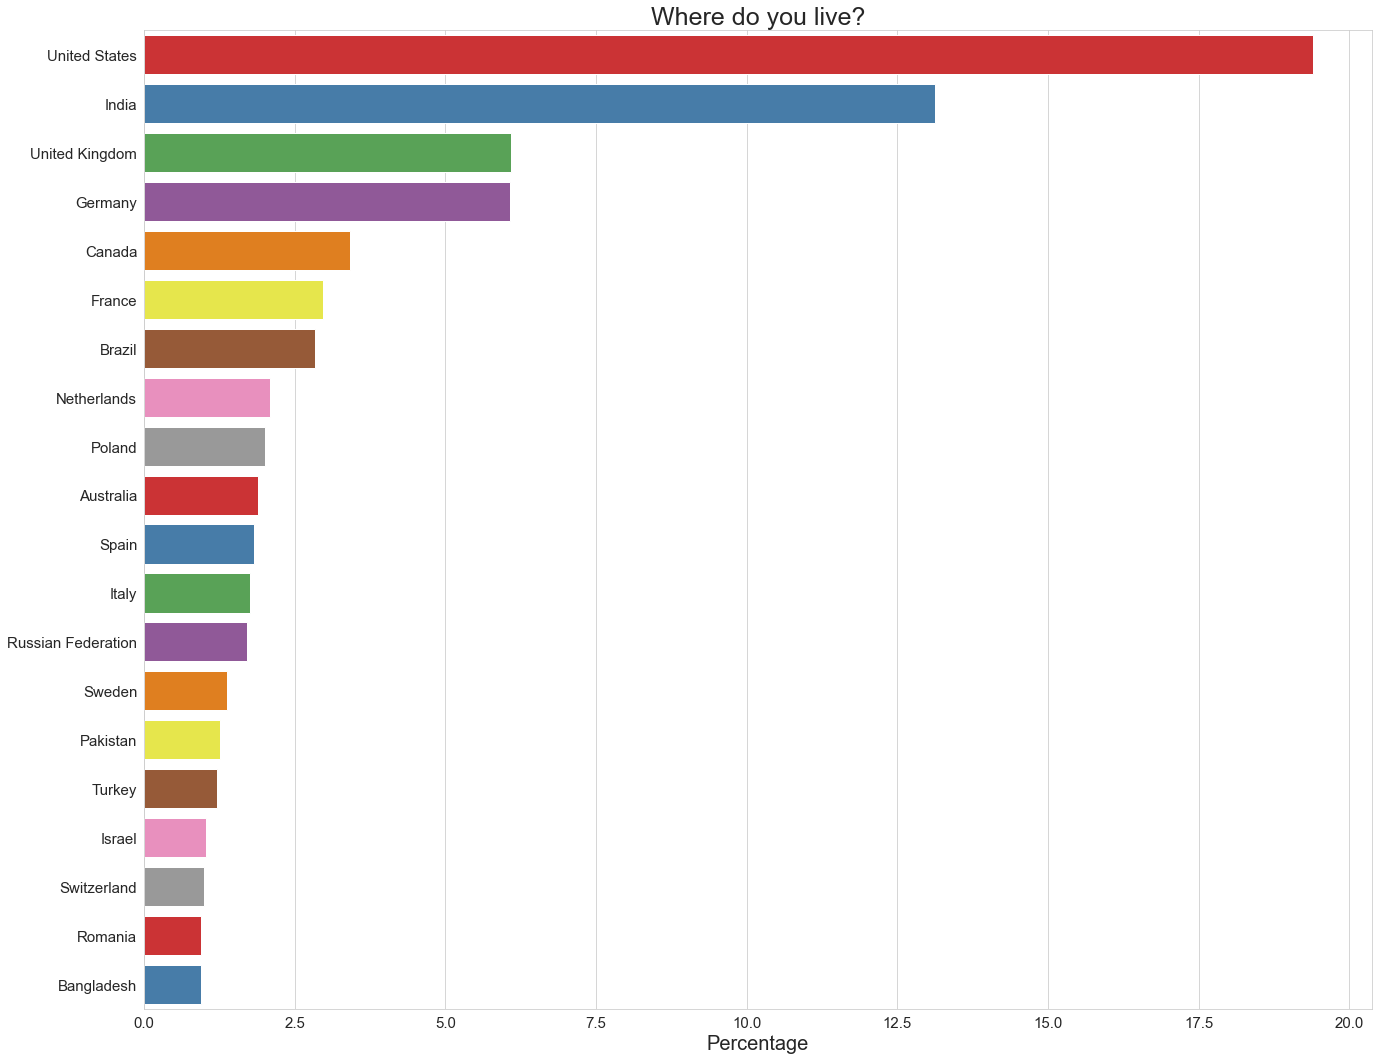

In [23]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=top_countries, ci=None, palette='Set1',orient='h')
ax.set_title(schema['Country'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Age

Text(0.5, 1.0, 'What is your age (in years)? If you prefer not to answer, you may leave this question blank.')

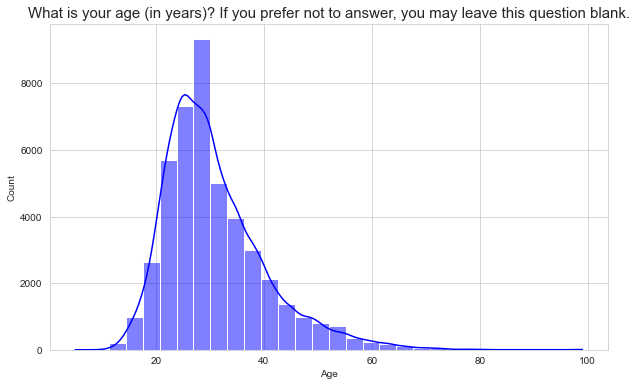

In [24]:
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=update_survey_data, x="Age", kde=True, bins=30, color='blue')
ax.set_title(schema.Age, fontsize=15)

In [25]:
#drop nas to assign age range
survey_updated = update_survey_data.dropna()
survey_updated

Respondent                      MainBranch Hobbyist   Age  Age1stCode  \
9            10.0  I am a developer by profession      Yes  22.0        14.0   
10           11.0  I am a developer by profession      Yes  23.0        13.0   
13           14.0  I am a developer by profession      Yes  27.0        13.0   
18           19.0  I am a developer by profession       No  24.0        15.0   
32           33.0  I am a developer by profession      Yes  39.0        14.0   
...           ...                             ...      ...   ...         ...   
61993     63288.0  I am a developer by profession       No  31.0        16.0   
62016     63311.0  I am a developer by profession      Yes  27.0        16.0   
62212     63516.0  I am a developer by profession      Yes  30.0        21.0   
63402     64810.0  I am a developer by profession      Yes  32.0        12.0   
63517     64938.0  I am a developer by profession       No  33.0        13.0   

              Country                       DatabaseDesireNextYear  \
9      United Kingdom                         Microsoft SQL Server   
10     United Kingdom                  Firebase;MongoDB;PostgreSQL   
13      United States                Firebase;Microsoft SQL Server   
18      United States                              MariaDB;MongoDB   
32            Belgium                                      MongoDB   
...               ...                                          ...   
61993  United Kingdom                                      MongoDB   
62016          Brazil  DynamoDB;Microsoft SQL Server;MongoDB;Redis   
62212       Singapore           Microsoft SQL Server;MongoDB;MySQL   
63402   United States                           MariaDB;PostgreSQL   
63517          France       Elasticsearch;MongoDB;PostgreSQL;Redis   

                                      DatabaseWorkedWith  \
9                                   Microsoft SQL Server   
10                    Firebase;MongoDB;PostgreSQL;SQLite   
13                         Firebase;Microsoft SQL Server   
18                          MariaDB;Microsoft SQL Server   
32                       MongoDB;MySQL;PostgreSQL;SQLite   
...                                                  ...   
61993                                            MongoDB   
62016                               Microsoft SQL Server   
62212                               Microsoft SQL Server   
63402                 MariaDB;Microsoft SQL Server;MySQL   
63517  DynamoDB;Elasticsearch;MongoDB;MySQL;Oracle;Po...   

                                                 DevType  \
9      Database administrator;Developer, full-stack;D...   
10     Developer, back-end;Developer, desktop or ente...   
13     Developer, desktop or enterprise applications;...   
18                                 Developer, full-stack   
32     Developer, front-end;Developer, full-stack;Dev...   
...                                                  ...   
61993  Designer;Developer, back-end;Developer, front-...   
62016            Developer, full-stack;DevOps specialist   
62212                              Developer, full-stack   
63402  Database administrator;Developer, back-end;Dev...   
63517              Developer, back-end;DevOps specialist   

                                                 EdLevel  ...  \
9        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  ...   
10          Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
13                   Associate degree (A.A., A.S., etc.)  ...   
18          Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
32          Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
...                                                  ...  ...   
61993       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
62016                Associate degree (A.A., A.S., etc.)  ...   
62212       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
63402  Some college/university study without earning ...  ...   
63517                 Professional degree (JD, M

In [26]:
#total age, you can use this to remove the ages that don't make sense, ages less than 14 and greater than 60 should be removed
age_data = survey_updated['Age'].value_counts()
age_data.to_frame()

Age
25.0  740
30.0  738
28.0  732
26.0  724
29.0  695
27.0  670
24.0  621
32.0  544
31.0  525
23.0  491
33.0  479
35.0  472
34.0  447
36.0  345
22.0  331
38.0  326
37.0  320
39.0  266
40.0  241
41.0  187
42.0  180
21.0  176
43.0  159
45.0  131
44.0  103
48.0   84
46.0   80
47.0   73
49.0   66
50.0   60
20.0   58
52.0   50
51.0   46
53.0   38
54.0   32
55.0   31
19.0   27
56.0   23
59.0   22
58.0   19
57.0   19
60.0   13
63.0   10
18.0   10
62.0    8
70.0    6
66.0    5
17.0    4
65.0    3
61.0    3
64.0    2
68.0    2
78.0    1
69.0    1
96.0    1
22.5    1

In [27]:
def age_label(row):
    age = row.Age
    if age <= 14:
        return "5 - 14"
    elif age <= 19:
        return "15 - 19"
    elif age <= 30:
        return "20 - 30"
    elif age <= 45:
        return "31 - 45"
    elif age <= 60:
        return "46 - 60"
    else:
        return "Above 60"

In [28]:
survey_updated["Age_label"] = survey_updated.apply(age_label, axis=1)
survey_updated

<ipython-input-28-66337d793242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_updated["Age_label"] = survey_updated.apply(age_label, axis=1)


Respondent                      MainBranch Hobbyist   Age  Age1stCode  \
9            10.0  I am a developer by profession      Yes  22.0        14.0   
10           11.0  I am a developer by profession      Yes  23.0        13.0   
13           14.0  I am a developer by profession      Yes  27.0        13.0   
18           19.0  I am a developer by profession       No  24.0        15.0   
32           33.0  I am a developer by profession      Yes  39.0        14.0   
...           ...                             ...      ...   ...         ...   
61993     63288.0  I am a developer by profession       No  31.0        16.0   
62016     63311.0  I am a developer by profession      Yes  27.0        16.0   
62212     63516.0  I am a developer by profession      Yes  30.0        21.0   
63402     64810.0  I am a developer by profession      Yes  32.0        12.0   
63517     64938.0  I am a developer by profession       No  33.0        13.0   

              Country                       DatabaseDesireNextYear  \
9      United Kingdom                         Microsoft SQL Server   
10     United Kingdom                  Firebase;MongoDB;PostgreSQL   
13      United States                Firebase;Microsoft SQL Server   
18      United States                              MariaDB;MongoDB   
32            Belgium                                      MongoDB   
...               ...                                          ...   
61993  United Kingdom                                      MongoDB   
62016          Brazil  DynamoDB;Microsoft SQL Server;MongoDB;Redis   
62212       Singapore           Microsoft SQL Server;MongoDB;MySQL   
63402   United States                           MariaDB;PostgreSQL   
63517          France       Elasticsearch;MongoDB;PostgreSQL;Redis   

                                      DatabaseWorkedWith  \
9                                   Microsoft SQL Server   
10                    Firebase;MongoDB;PostgreSQL;SQLite   
13                         Firebase;Microsoft SQL Server   
18                          MariaDB;Microsoft SQL Server   
32                       MongoDB;MySQL;PostgreSQL;SQLite   
...                                                  ...   
61993                                            MongoDB   
62016                               Microsoft SQL Server   
62212                               Microsoft SQL Server   
63402                 MariaDB;Microsoft SQL Server;MySQL   
63517  DynamoDB;Elasticsearch;MongoDB;MySQL;Oracle;Po...   

                                                 DevType  \
9      Database administrator;Developer, full-stack;D...   
10     Developer, back-end;Developer, desktop or ente...   
13     Developer, desktop or enterprise applications;...   
18                                 Developer, full-stack   
32     Developer, front-end;Developer, full-stack;Dev...   
...                                                  ...   
61993  Designer;Developer, back-end;Developer, front-...   
62016            Developer, full-stack;DevOps specialist   
62212                              Developer, full-stack   
63402  Database administrator;Developer, back-end;Dev...   
63517              Developer, back-end;DevOps specialist   

                                                 EdLevel  ...  \
9        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  ...   
10          Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
13                   Associate degree (A.A., A.S., etc.)  ...   
18          Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
32          Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
...                                                  ...  ...   
61993       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
62016                Associate degree (A.A., A.S., etc.)  ...   
62212       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  ...   
63402  Some college/university study without earning ...  ...   
63517                 Professional degree (JD, M

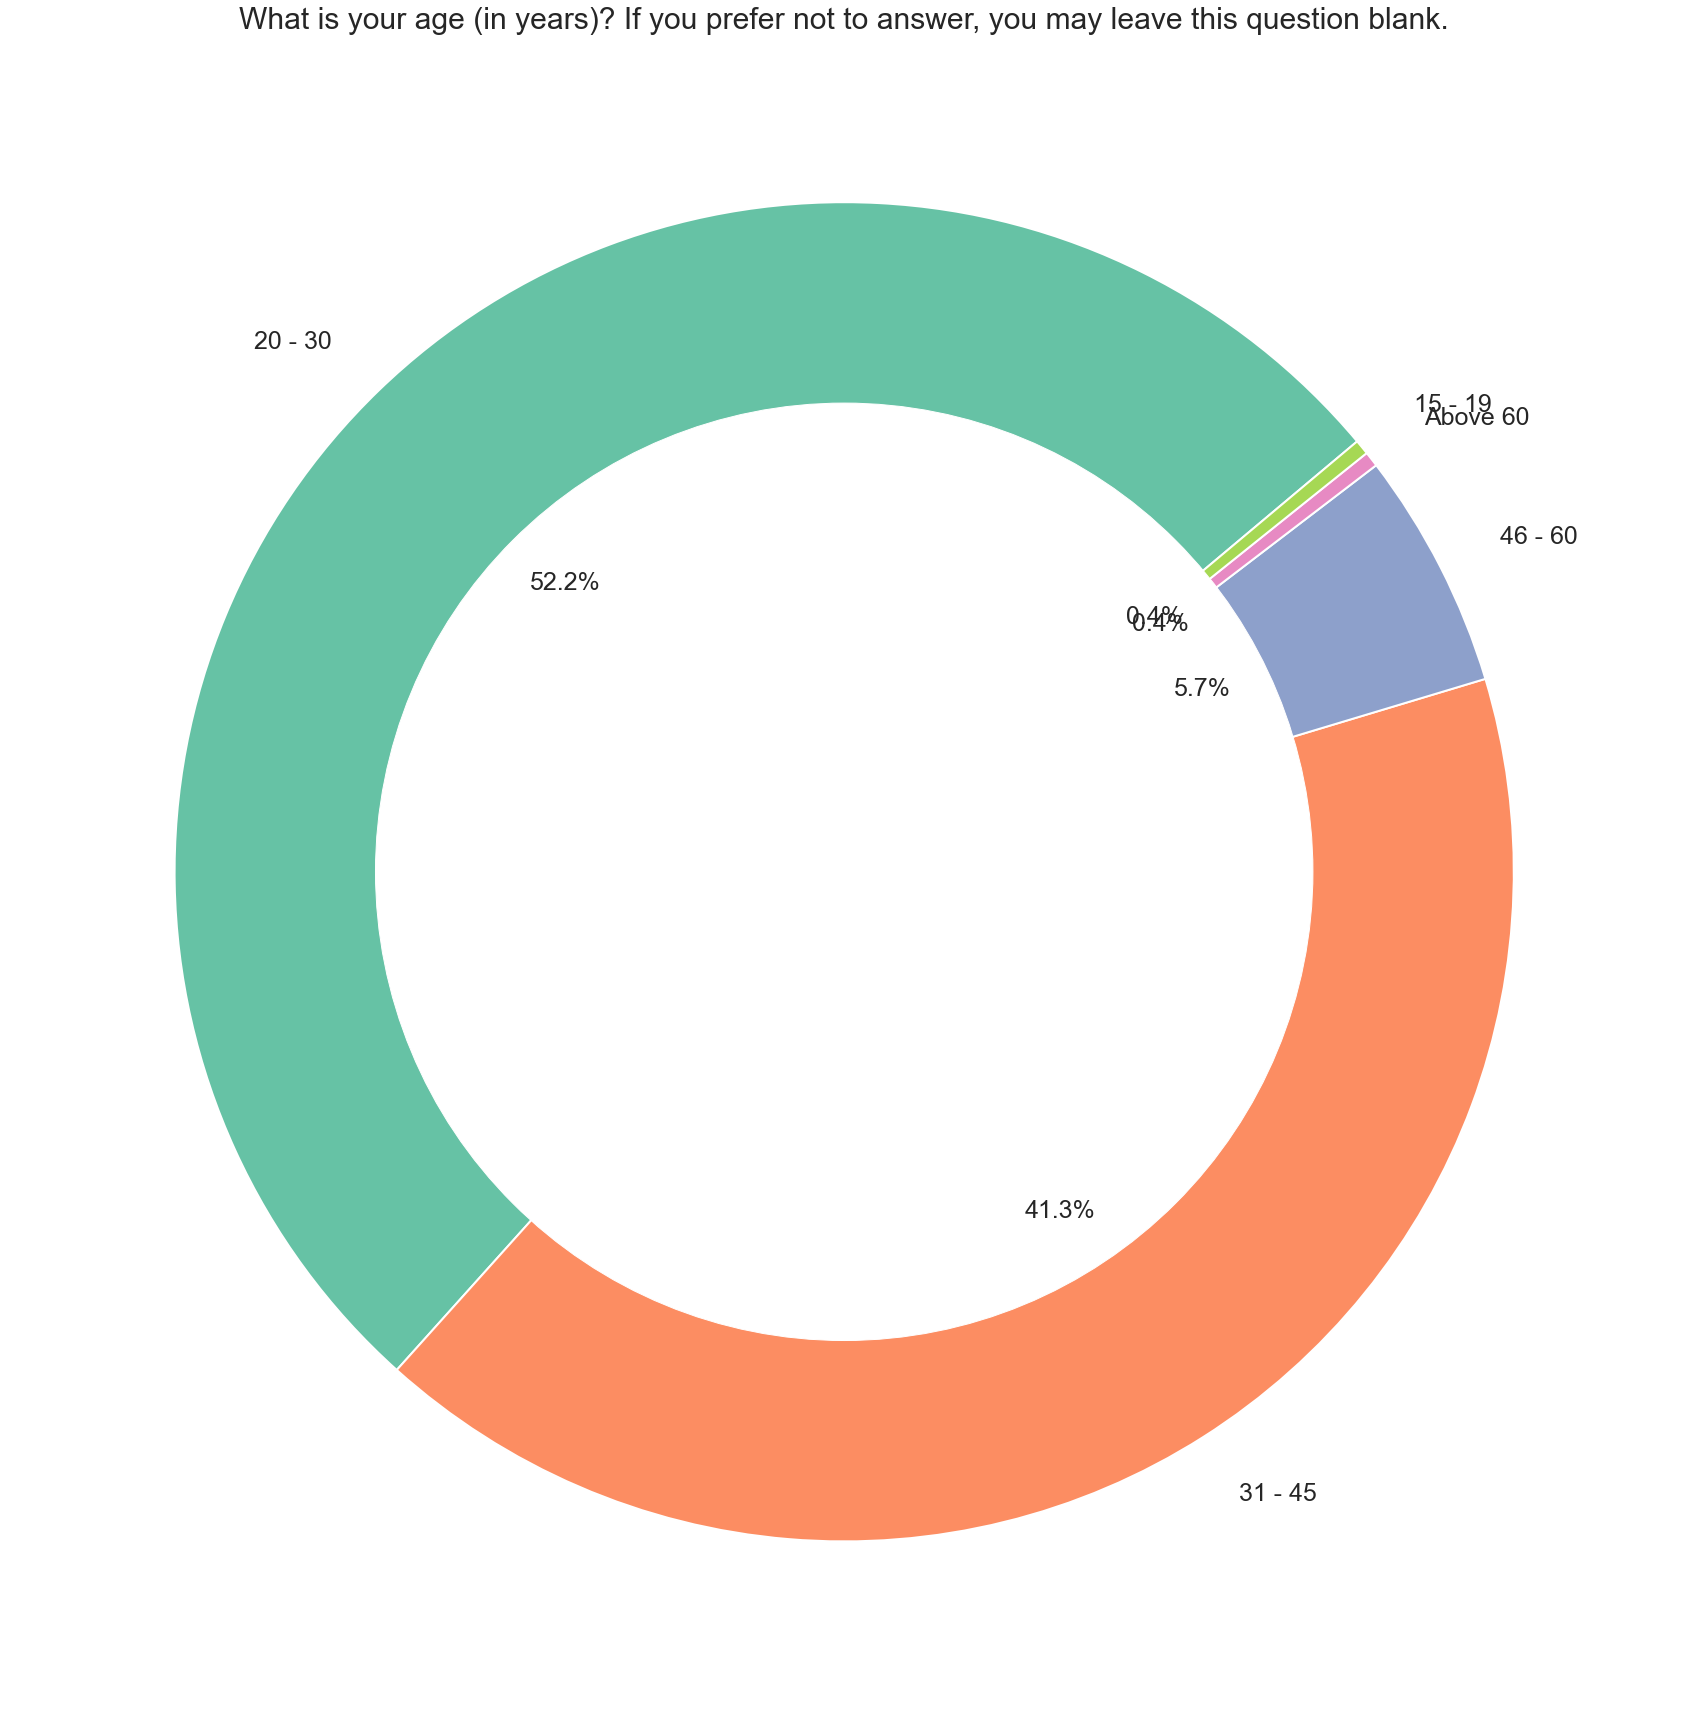

In [29]:
plt.subplots(figsize=(30,60))
data=survey_updated["Age_label"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=25,colors=sns.color_palette('Set2',10),startangle=40,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title(schema['Age'], fontsize=30)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

### Ethnicity

In [30]:
#define function to split multi columns
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [31]:
#check ethnicity
ethnicity_df = split_multicolumn(update_survey_data.Ethnicity)
ethnicity_df

White or of European descent  Hispanic or Latino/a/x  East Asian  \
0                              True                   False       False   
1                             False                   False       False   
2                             False                   False       False   
3                              True                   False       False   
4                              True                   False       False   
...                             ...                     ...         ...   
64456                         False                   False       False   
64457                         False                   False       False   
64458                         False                   False       False   
64459                         False                   False       False   
64460                         False                   False       False   

       Black or of African descent  Middle Eastern  \
0                            False           False   
1                            False           False   
2                            False           False   
3                            False           False   
4                            False           False   
...                            ...             ...   
64456                        False           False   
64457                        False           False   
64458                        False           False   
64459                        False           False   
64460                        False           False   

       Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)  \
0                                                  False                                  
1                                                  False                                  
2                                                  False                                  
3                                                  False                                  
4                                                  False                                  
...                                                  ...                                  
64456                                              False                                  
64457                                              False                                  
64458                                              False                                  
64459                                              False                                  
64460                                              False                                  

       South Asian  Multiracial  Biracial  Southeast Asian  
0            False        False     False            False  
1            False        False     False            False  
2            False        False     False            False  
3            False        False     False            False  
4            False        False     False            False  
...            ...          ...       ...              ...  
64456        False        False     False            False  
64457        False        False     False            False  
64458        False        False     False            False  
64459        False        False     False            False  
64460        False        False     False            False  

[64453 rows x 10 columns]

In [32]:
ethnicity_type_percentages = ethnicity_df.mean().sort_values(ascending=False) * 100
ethnicity_type_percentages= ethnicity_type_percentages.to_frame(name='percentage').reset_index()
ethnicity_type_percentages

index  percentage
0                       White or of European descent   48.388748
1                                        South Asian    7.349542
2                             Hispanic or Latino/a/x    5.344980
3                                     Middle Eastern    3.483158
4                                         East Asian    3.230261
5                        Black or of African descent    3.149582
6                                    Southeast Asian    3.137170
7                                        Multiracial    1.199324
8                                           Biracial    0.854887
9  Indigenous (such as Native American, Pacific I...    0.564753

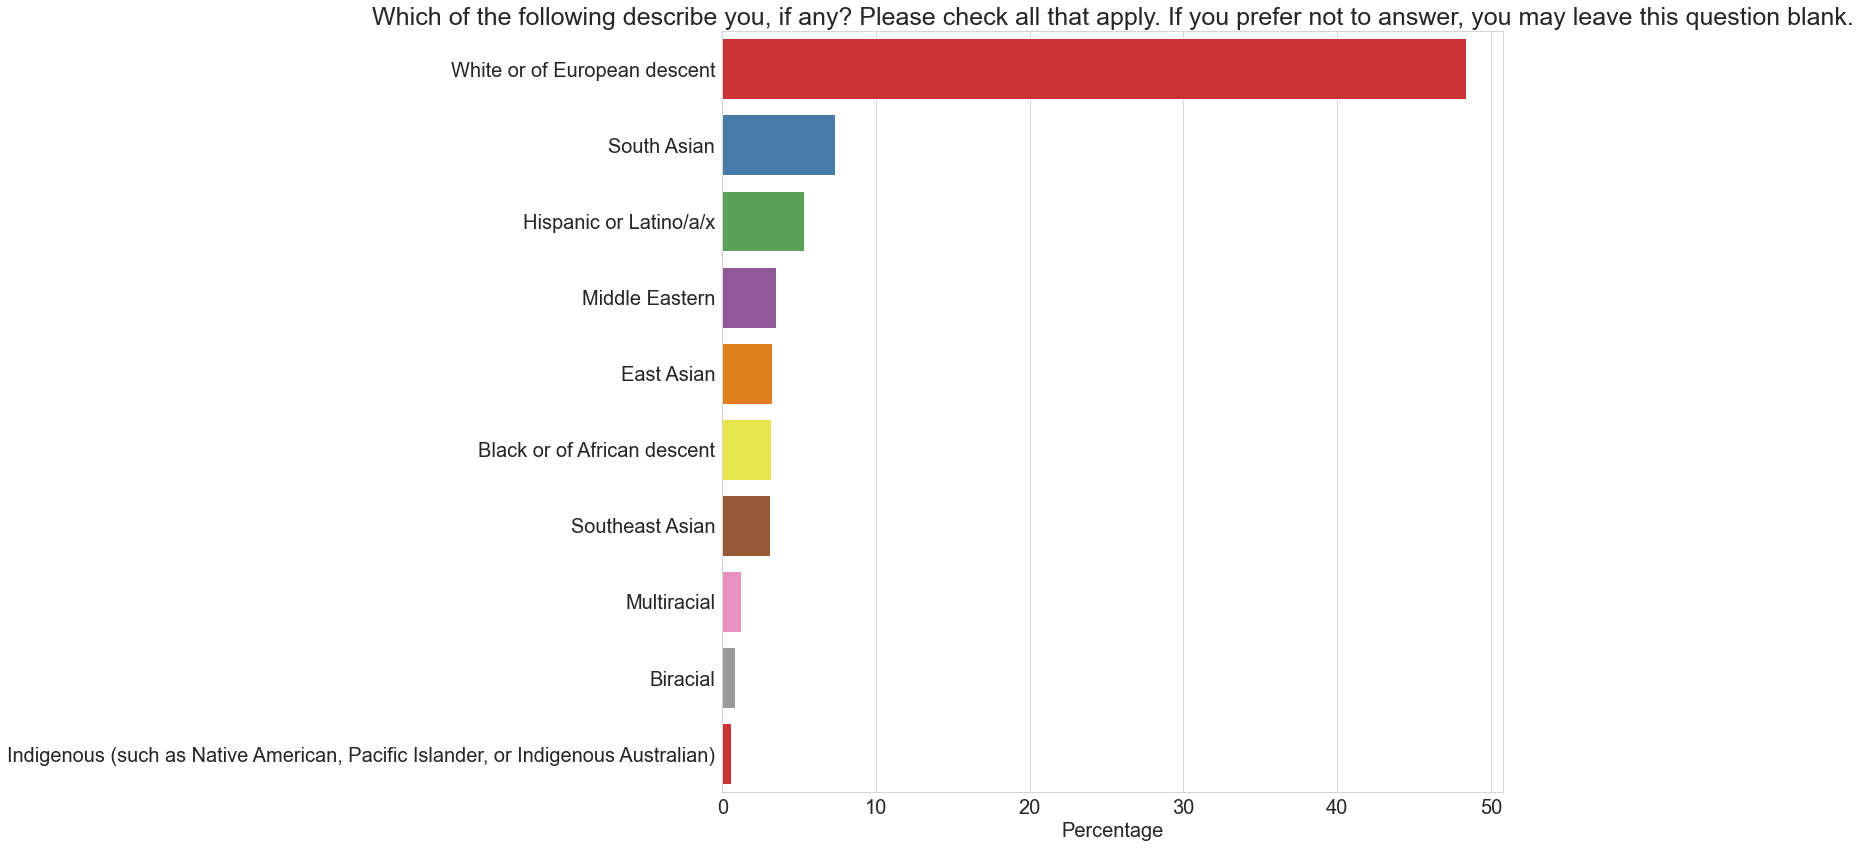

In [33]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=ethnicity_type_percentages, ci=None, palette='Set1',orient='h')
ax.set_title(schema['Ethnicity'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

### Gender

In [34]:
gender = split_multicolumn(update_survey_data.Gender)
gender

Man  Woman  Non-binary, genderqueer, or gender non-conforming
0       True  False                                              False
1      False  False                                              False
2      False  False                                              False
3       True  False                                              False
4       True  False                                              False
...      ...    ...                                                ...
64456  False  False                                              False
64457  False  False                                              False
64458  False  False                                              False
64459  False  False                                              False
64460  False  False                                              False

[64453 rows x 3 columns]

In [35]:
gender_percent = gender.mean().sort_values(ascending=False) * 100
gender_percent= gender_percent.to_frame(name='percentage').reset_index()
gender_percent

index  percentage
0                                                Man   71.382248
1                                              Woman    5.962484
2  Non-binary, genderqueer, or gender non-conforming    0.597334

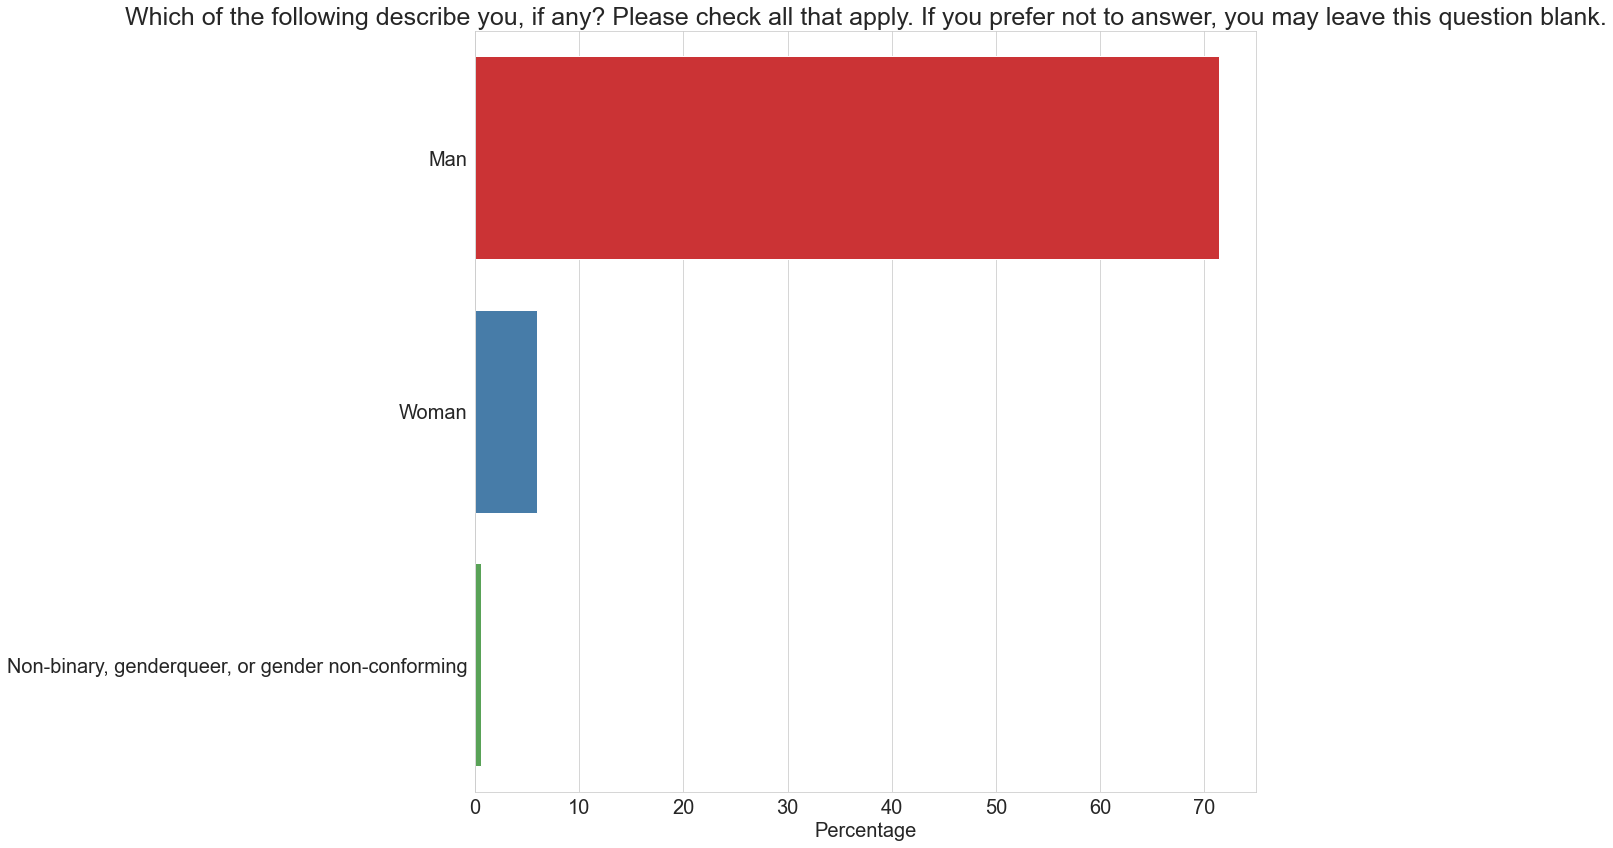

In [36]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=gender_percent, ci=None, palette='Set1',orient='h')
ax.set_title(schema['Gender'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [37]:
update_schema

Column
Respondent                      Randomized respondent ID number (not in order ...
MainBranch                      Which of the following options best describes ...
Hobbyist                                                  Do you code as a hobby?
Age                             What is your age (in years)? If you prefer not...
Age1stCode                      At what age did you write your first line of c...
Country                                                        Where do you live?
DatabaseDesireNextYear          Which database environments have you done exte...
DatabaseWorkedWith              Which database environments have you done exte...
DevType                         Which of the following describe you? Please se...
EdLevel                         Which of the following best describes the high...
Employment                      Which of the following best describes your cur...
Ethnicity                       Which of the following describe you, if any? P...
Gender   

### MainBranch

In [38]:
mainbranch = update_survey_data['MainBranch'].value_counts(normalize=True)*100
mainbranch = mainbranch.to_frame(name='percentage').reset_index()
mainbranch

index  percentage
0                     I am a developer by profession   73.588748
1             I am a student who is learning to code   12.397406
2  I am not primarily a developer, but I write co...    8.583422
3                        I code primarily as a hobby    3.594700
4  I used to be a developer by profession, but no...    1.835725

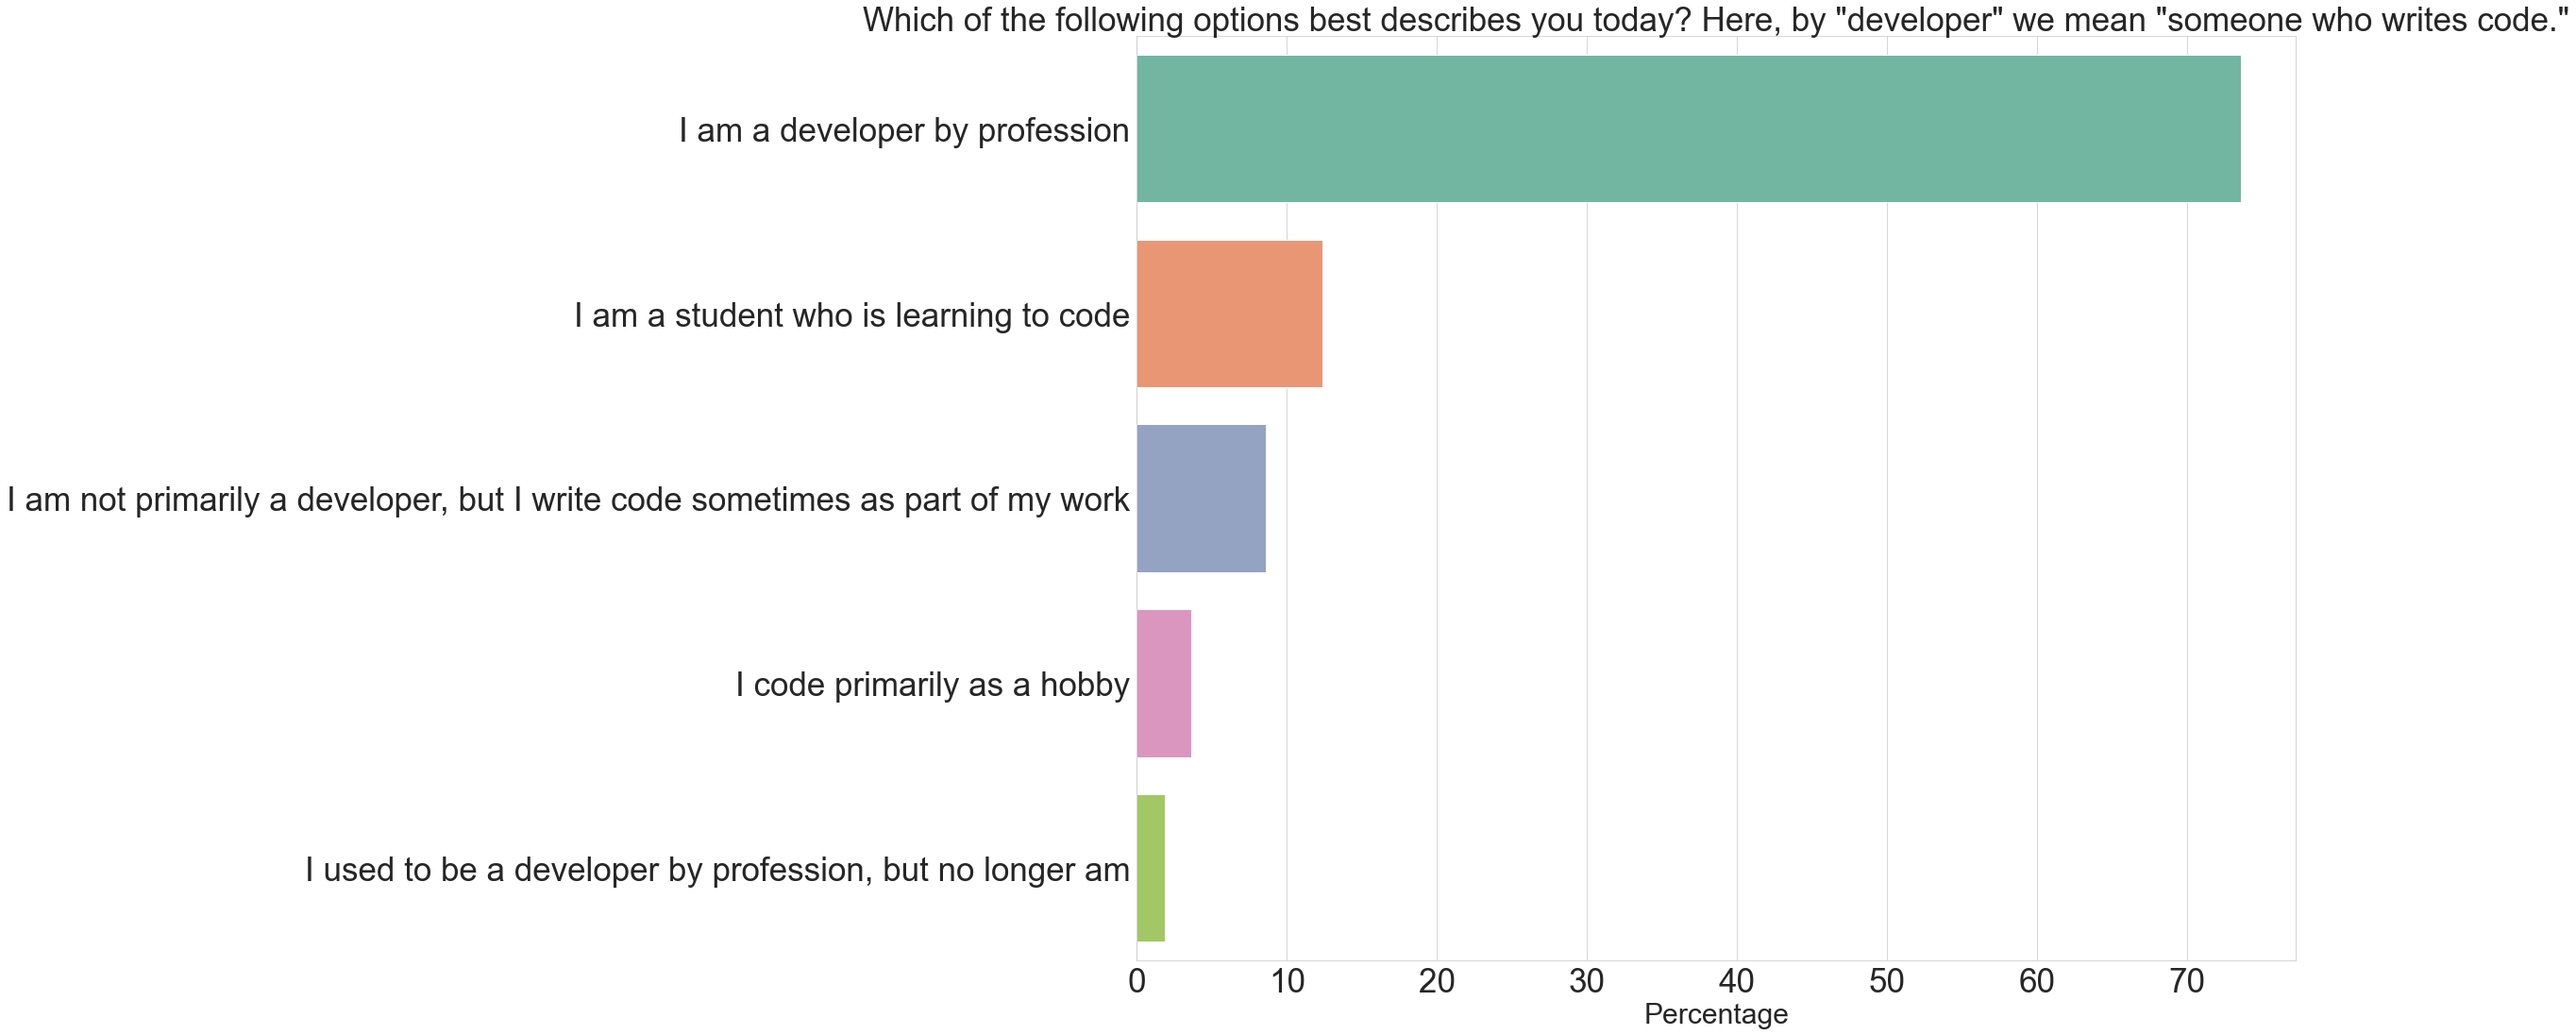

In [39]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=mainbranch, ci=None, palette='Set2',orient='h')
ax.set_title(schema['MainBranch'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)

## Developer Experience

### Hobbyist

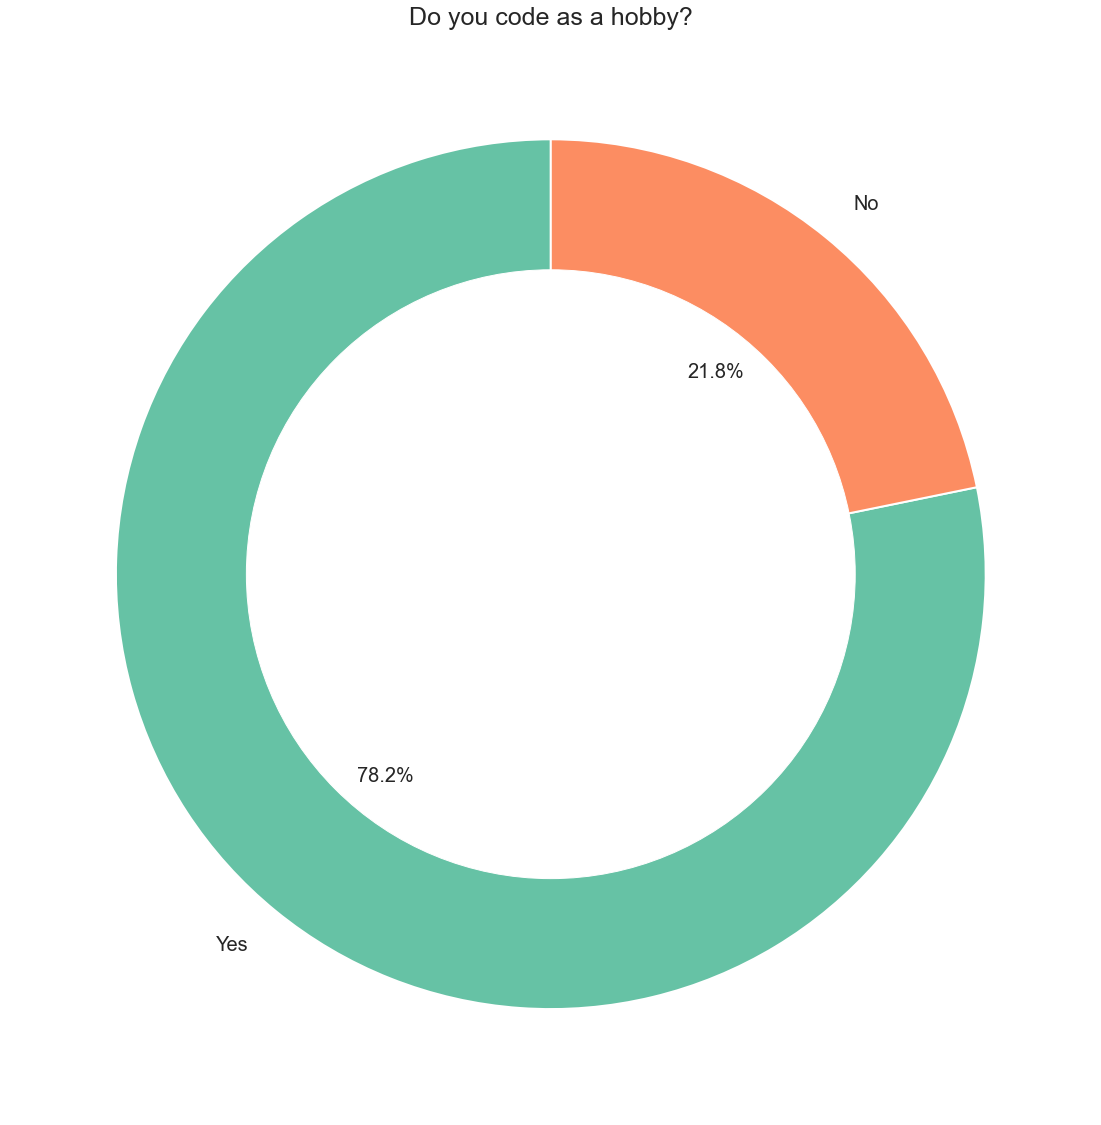

In [40]:
plt.subplots(figsize=(20,20))
data=update_survey_data["Hobbyist"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=20,colors=sns.color_palette('Set2',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title(schema['Hobbyist'], fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

### Type of Developer

In [41]:
devtype = split_multicolumn(update_survey_data.DevType)
devtype

Developer, desktop or enterprise applications  Developer, full-stack  \
0                                               True                   True   
1                                              False                   True   
2                                              False                  False   
3                                              False                  False   
4                                              False                  False   
...                                              ...                    ...   
64456                                          False                  False   
64457                                          False                  False   
64458                                          False                  False   
64459                                          False                  False   
64460                                          False                  False   

       Developer, mobile  Designer  Developer, front-end  Developer, back-end  \
0                  False     False                 False                False   
1                   True     False                 False                False   
2                  False     False                 False                False   
3                  False     False                 False                False   
4                  False     False                 False                False   
...                  ...       ...                   ...                  ...   
64456              False     False                 False                False   
64457              False     False                 False                False   
64458              False     False                 False                False   
64459              False     False                 False                False   
64460              False     False                 False                False   

       Developer, QA or test  DevOps specialist  Developer, game or graphics  \
0                      False              False                        False   
1                      False              False                        False   
2                      False              False                        False   
3                      False              False                        False   
4                      False              False                        False   
...                      ...                ...                          ...   
64456                  False              False                        False   
64457                  False              False                        False   
64458                  False              False                        False   
64459                  False              False                        False   
64460                  False              False                        False   

       Database administrator  ...  System administrator  Engineering manager  \
0                       False  ...                 False                False   
1                       False  ...                 False                False   
2                       False  ...                 False                False   
3                       False  ...                 False                False   
4                       False  ...                 False                False   
...                       ...  ...                   ...                  ...   
64456                   False  ...                 False                False   
64457                   False  ...                 False                False   
64458                   False  ...                 False                False   
64459                   False  ...                 False                False   
64460                   False  ...                 False                False   

       Product manager  Data or business analyst  Academic researcher  \
0                False                     False                False   
1    

In [42]:
devtype_percentage = devtype.mean().sort_values(ascending=False) * 100
devtype_percentage= devtype_percentage.to_frame(name='percentage').reset_index()
devtype_percentage

index  percentage
0                             Developer, back-end   42.018215
1                           Developer, full-stack   41.872372
2                            Developer, front-end   28.219012
3   Developer, desktop or enterprise applications   18.194653
4                               Developer, mobile   14.641677
5                               DevOps specialist    9.205157
6                          Database administrator    8.809520
7                                        Designer    8.182707
8                            System administrator    8.075652
9     Developer, embedded applications or devices    7.324717
10                       Data or business analyst    6.179697
11  Data scientist or machine learning specialist    6.130048
12                          Developer, QA or test    6.067988
13                                 Engineer, data    5.753029
14                            Academic researcher    5.456689
15                                       Educator    4.508712
16                    Developer, game or graphics    4.283742
17                            Engineering manager    4.201511
18                                Product manager    3.844662
19                                      Scientist    3.205437
20                     Engineer, site reliability    2.988224
21                            Senior executive/VP    2.013871
22                Marketing or sales professional    0.979008

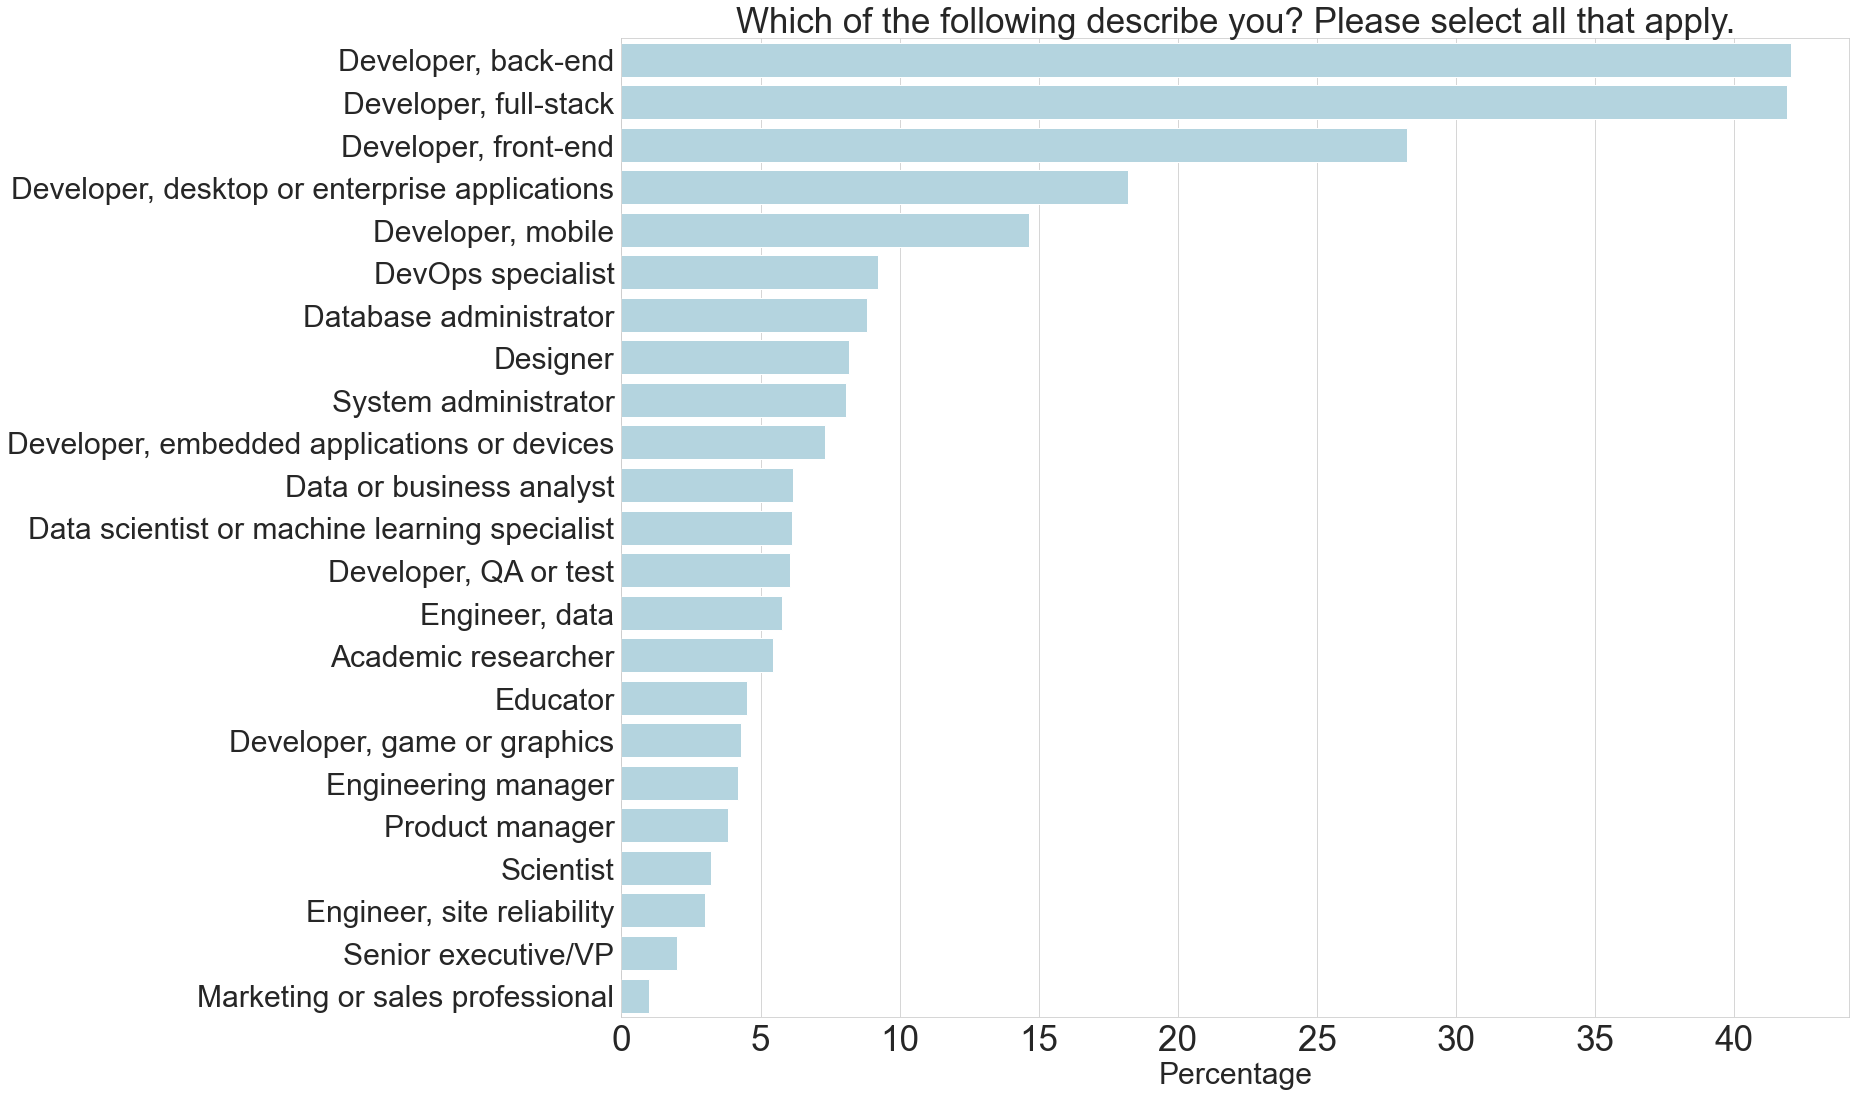

In [43]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=devtype_percentage, ci=None, color='lightblue',orient='h')
ax.set_title(schema['DevType'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

## Education

### Degree

In [44]:
education=update_survey_data['EdLevel'].value_counts(normalize=True)*100
education=education.to_frame(name='percentage').reset_index()
education

index  percentage
0       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   46.237877
1    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   22.870348
2  Some college/university study without earning ...   12.571339
3  Secondary school (e.g. American high school, G...    8.294528
4                Associate degree (A.A., A.S., etc.)    3.210672
5         Other doctoral degree (Ph.D., Ed.D., etc.)    2.946325
6                          Primary/elementary school    1.633346
7                 Professional degree (JD, MD, etc.)    1.390007
8             I never completed any formal education    0.845559

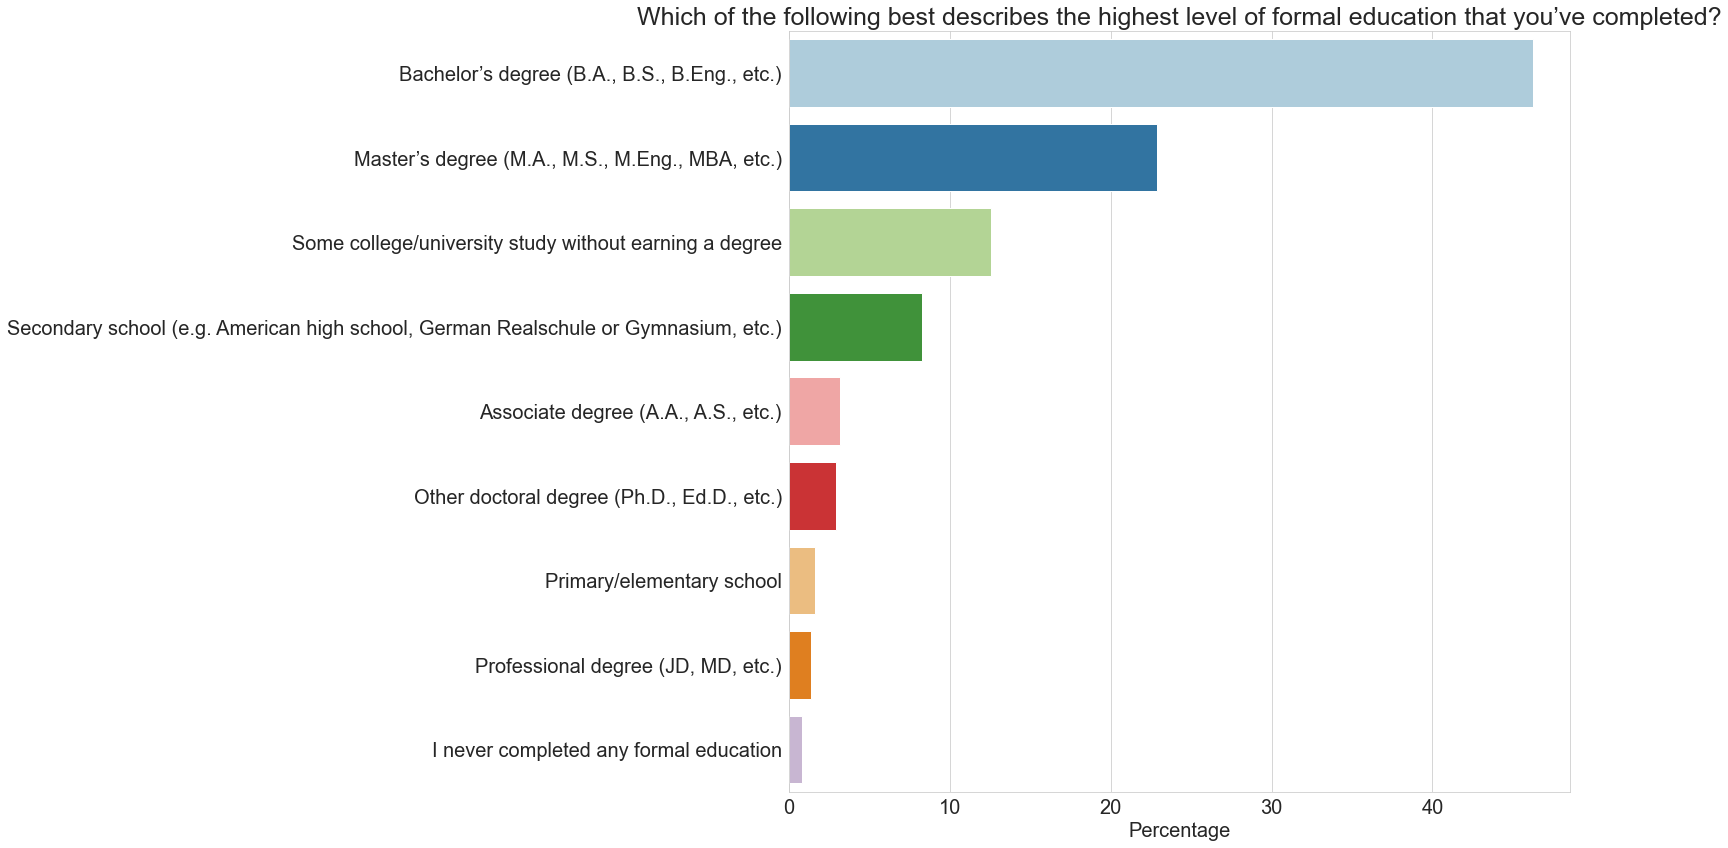

In [45]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=education, ci=None, palette='Paired',orient='h')
ax.set_title(schema['EdLevel'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

### Major

In [46]:
study=update_survey_data['UndergradMajor'].value_counts(normalize=True)*100
study=study.to_frame(name='percentage').reset_index()
study

index  percentage
0   Computer science, computer engineering, or sof...   61.950095
1   Another engineering discipline (such as civil,...    9.350363
2   Information systems, information technology, o...    7.994324
3   A natural science (such as biology, chemistry,...    4.316462
4                           Mathematics or statistics    3.620703
5                       Web development or web design    3.496531
6   A business discipline (such as accounting, fin...    2.704194
7   A humanities discipline (such as literature, h...    1.965074
8   A social science (such as anthropology, psycho...    1.819221
9   Fine arts or performing arts (such as graphic ...    1.409256
10                           I never declared a major    0.884973
11  A health science (such as nursing, pharmacy, r...    0.488805

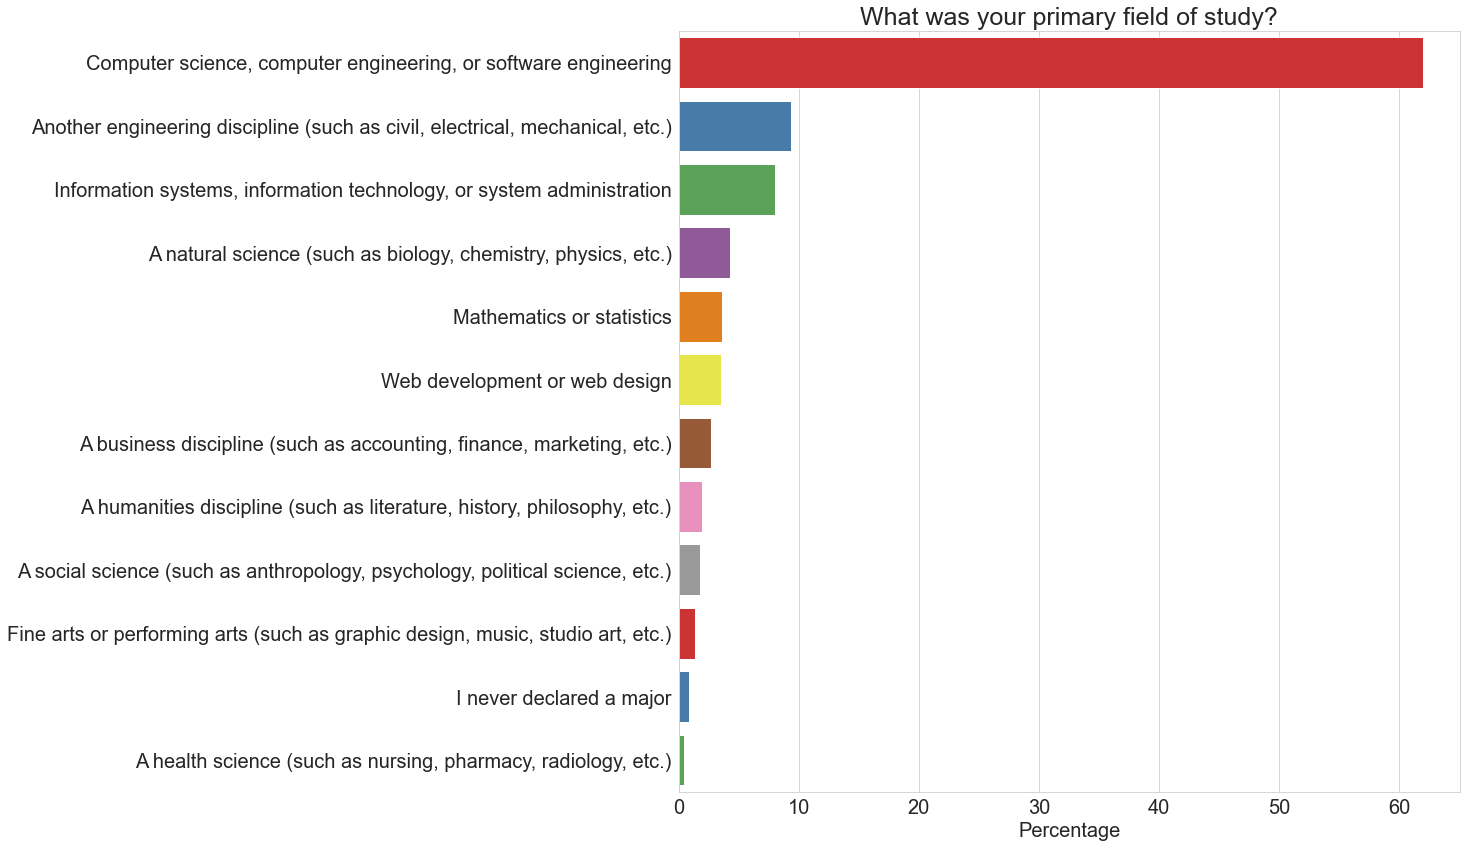

In [47]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=study, ci=None, palette='Set1',orient='h')
ax.set_title(schema['UndergradMajor'], fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

## Career

### Employment

In [48]:
employed = update_survey_data['Employment'].value_counts(normalize=True)*100
employed = employed.to_frame(name='percentage').reset_index()
employed

index  percentage
0                                 Employed full-time   70.948094
1                                            Student   12.173817
2  Independent contractor, freelancer, or self-em...    8.873430
3                 Not employed, but looking for work    3.657654
4                                 Employed part-time    3.467216
5             Not employed, and not looking for work    0.500488
6                                            Retired    0.379301

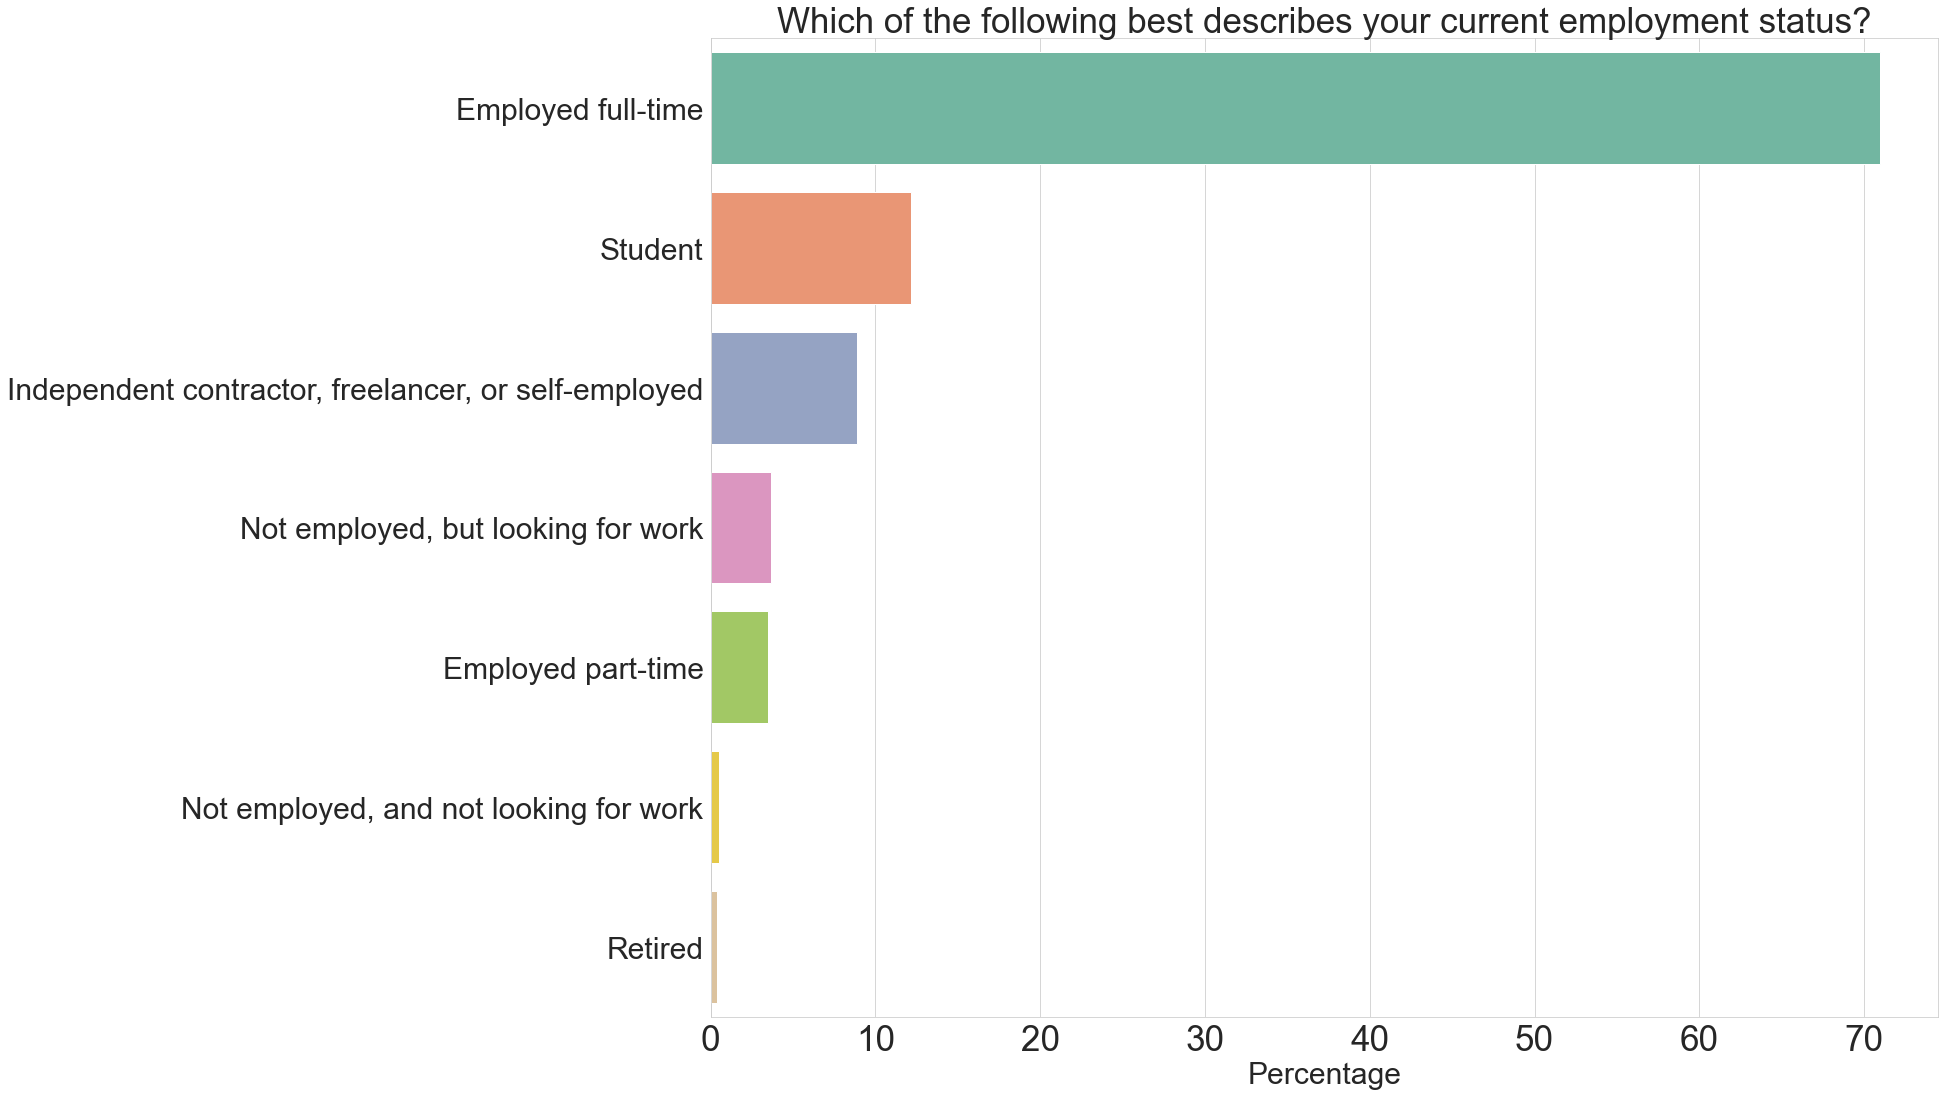

In [49]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=employed, ci=None, palette='Set2',orient='h')
ax.set_title(schema['Employment'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

### Career Satistfaction

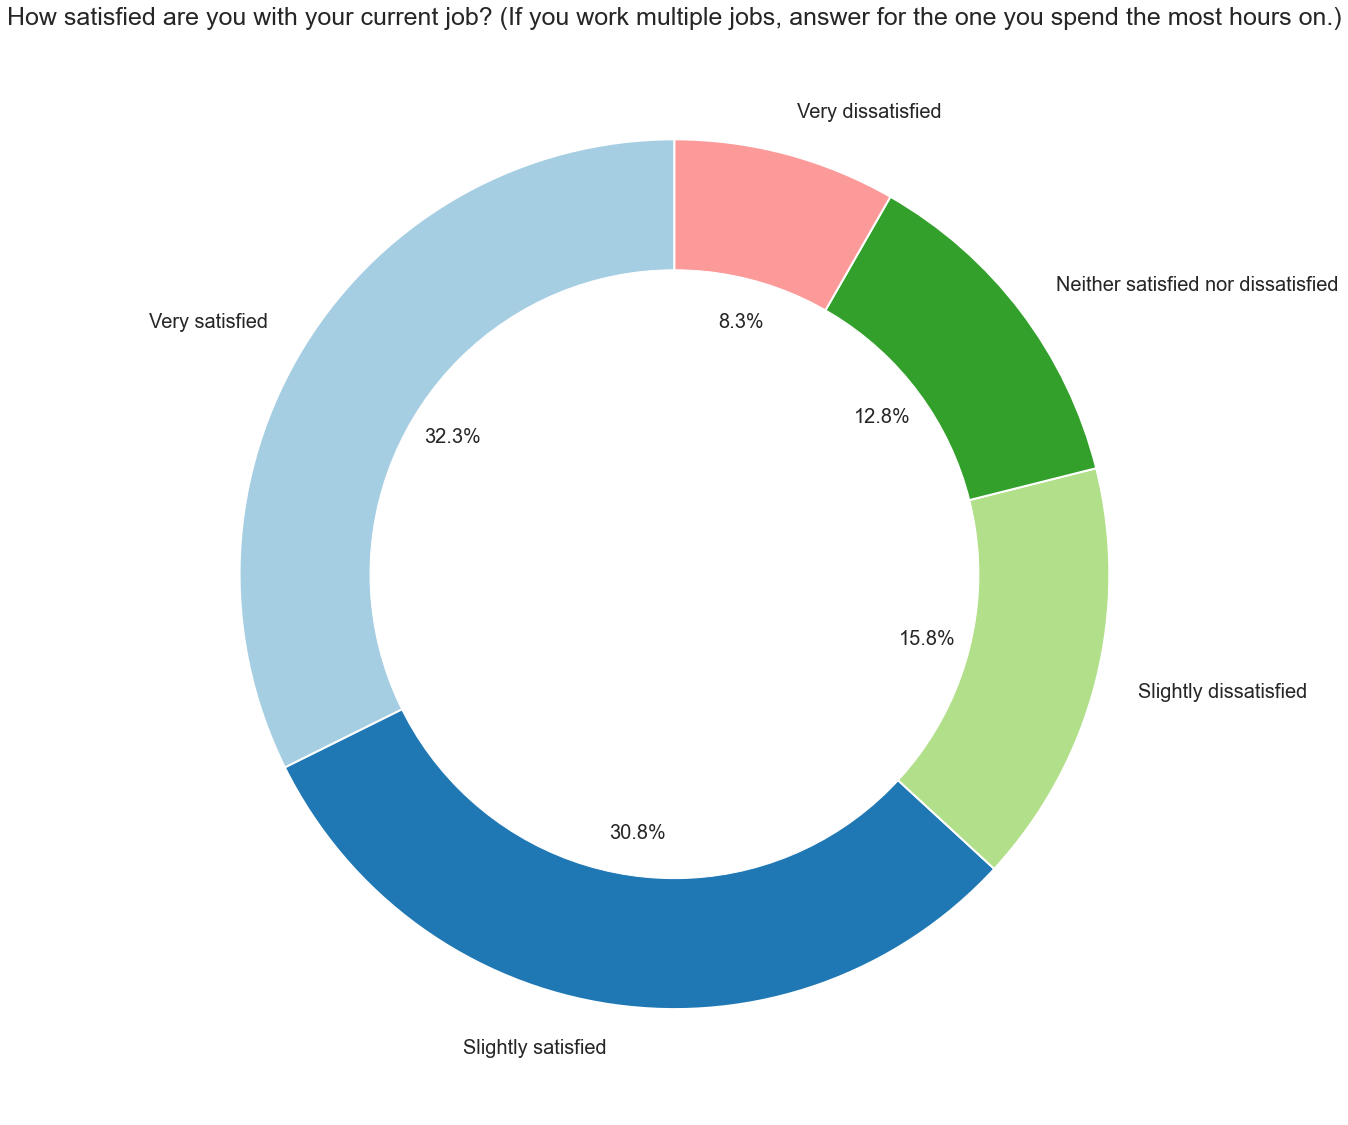

In [50]:
plt.subplots(figsize=(20,20))
data=update_survey_data["JobSat"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=20,colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title(schema['JobSat'], fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

### Jobseekers

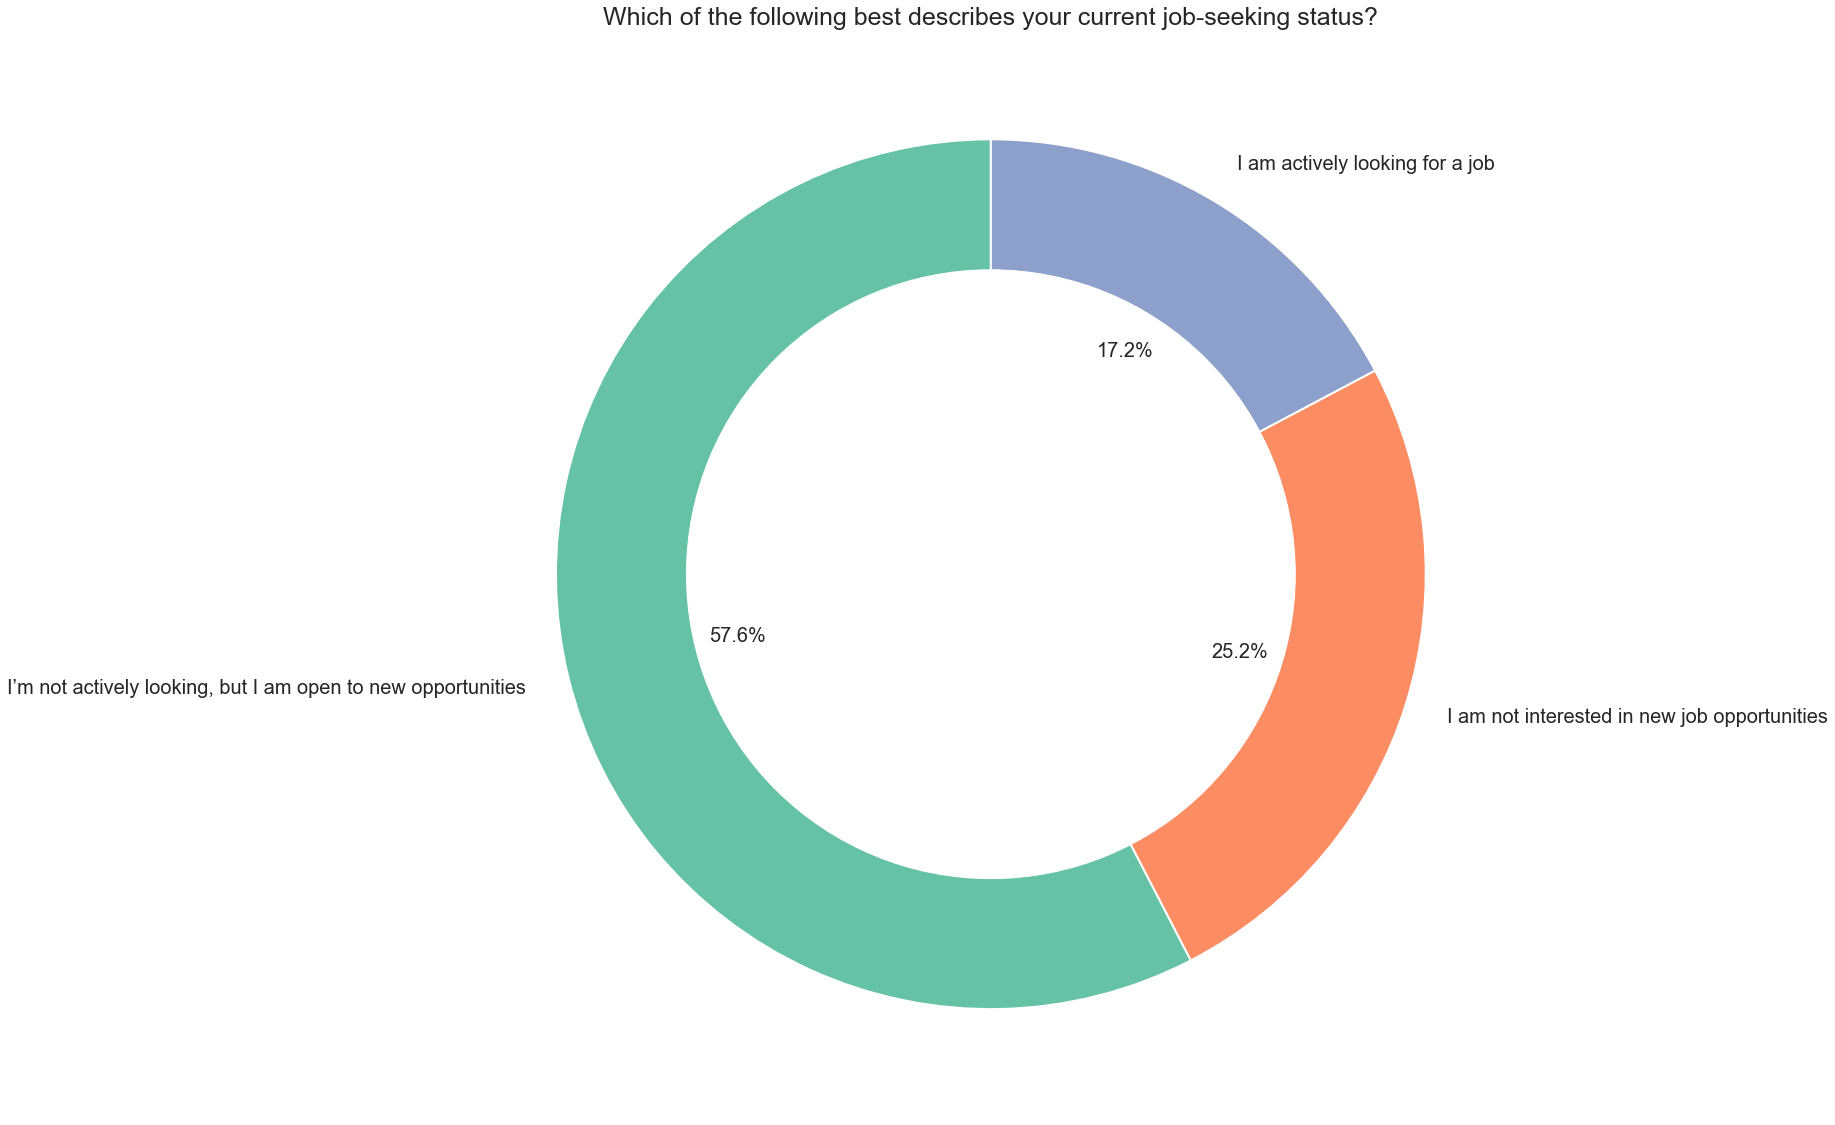

In [51]:
plt.subplots(figsize=(20,20))
data=update_survey_data["JobSeek"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=20,colors=sns.color_palette('Set2',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title(schema['JobSeek'], fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

## Open Source Softwares

### Language Worked with

In [52]:
#define function to split multi columns
languages_worked = split_multicolumn(update_survey_data.LanguageWorkedWith)
languages_worked

C#  HTML/CSS  JavaScript  Swift  Objective-C  Python   Ruby    SQL  \
0       True      True        True  False        False   False  False  False   
1      False     False        True   True        False   False  False  False   
2      False     False       False   True         True    True  False  False   
3      False     False       False  False        False   False  False  False   
4      False      True       False  False        False   False   True   True   
...      ...       ...         ...    ...          ...     ...    ...    ...   
64456  False     False       False  False        False   False  False  False   
64457   True      True        True   True         True    True   True   True   
64458  False     False       False  False        False   False  False  False   
64459  False      True       False  False        False   False  False  False   
64460   True      True        True  False        False   False  False   True   

        Java    PHP  ...    VBA   Perl  Scala    C++     Go  Haskell   Rust  \
0      False  False  ...  False  False  False  False  False    False  False   
1      False  False  ...  False  False  False  False  False    False  False   
2      False  False  ...  False  False  False  False  False    False  False   
3      False  False  ...  False  False  False  False  False    False  False   
4      False  False  ...  False  False  False  False  False    False  False   
...      ...    ...  ...    ...    ...    ...    ...    ...      ...    ...   
64456  False  False  ...  False  False  False  False  False    False  False   
64457   True   True  ...   True   True   True   True   True     True   True   
64458  False  False  ...  False  False  False  False  False    False  False   
64459  False  False  ...  False  False  False  False  False    False  False   
64460   True  False  ...  False  False  False  False  False    False  False   

        Dart  Julia  Assembly  
0      False  False     False  
1      False  False     False  
2      False  False     False  
3      False  False     False  
4      False  False     False  
...      ...    ...       ...  
64456  False  False     False  
64457   True   True      True  
64458  False  False     False  
64459  False  False     False  
64460  False  False     False  

[64453 rows x 25 columns]

In [53]:
languages_worked_percent = languages_worked.mean().sort_values(ascending=False) * 100
languages_worked_percent= languages_worked_percent.to_frame(name='percentage').reset_index()
languages_worked_percent

index  percentage
0              JavaScript   59.891704
1                HTML/CSS   55.803454
2                     SQL   48.453912
3                  Python   38.986548
4                    Java   35.621305
5   Bash/Shell/PowerShell   29.238360
6                      C#   27.812515
7                     PHP   23.139342
8              TypeScript   22.476844
9                     C++   21.108405
10                      C   19.234171
11                     Go    7.756039
12                 Kotlin    6.885638
13                   Ruby    6.224691
14               Assembly    5.450483
15                    VBA    5.397732
16                  Swift    5.223962
17                      R    5.065707
18                   Rust    4.491645
19            Objective-C    3.602625
20                   Dart    3.517292
21                  Scala    3.154236
22                   Perl    2.758599
23                Haskell    1.860270
24                  Julia    0.783517

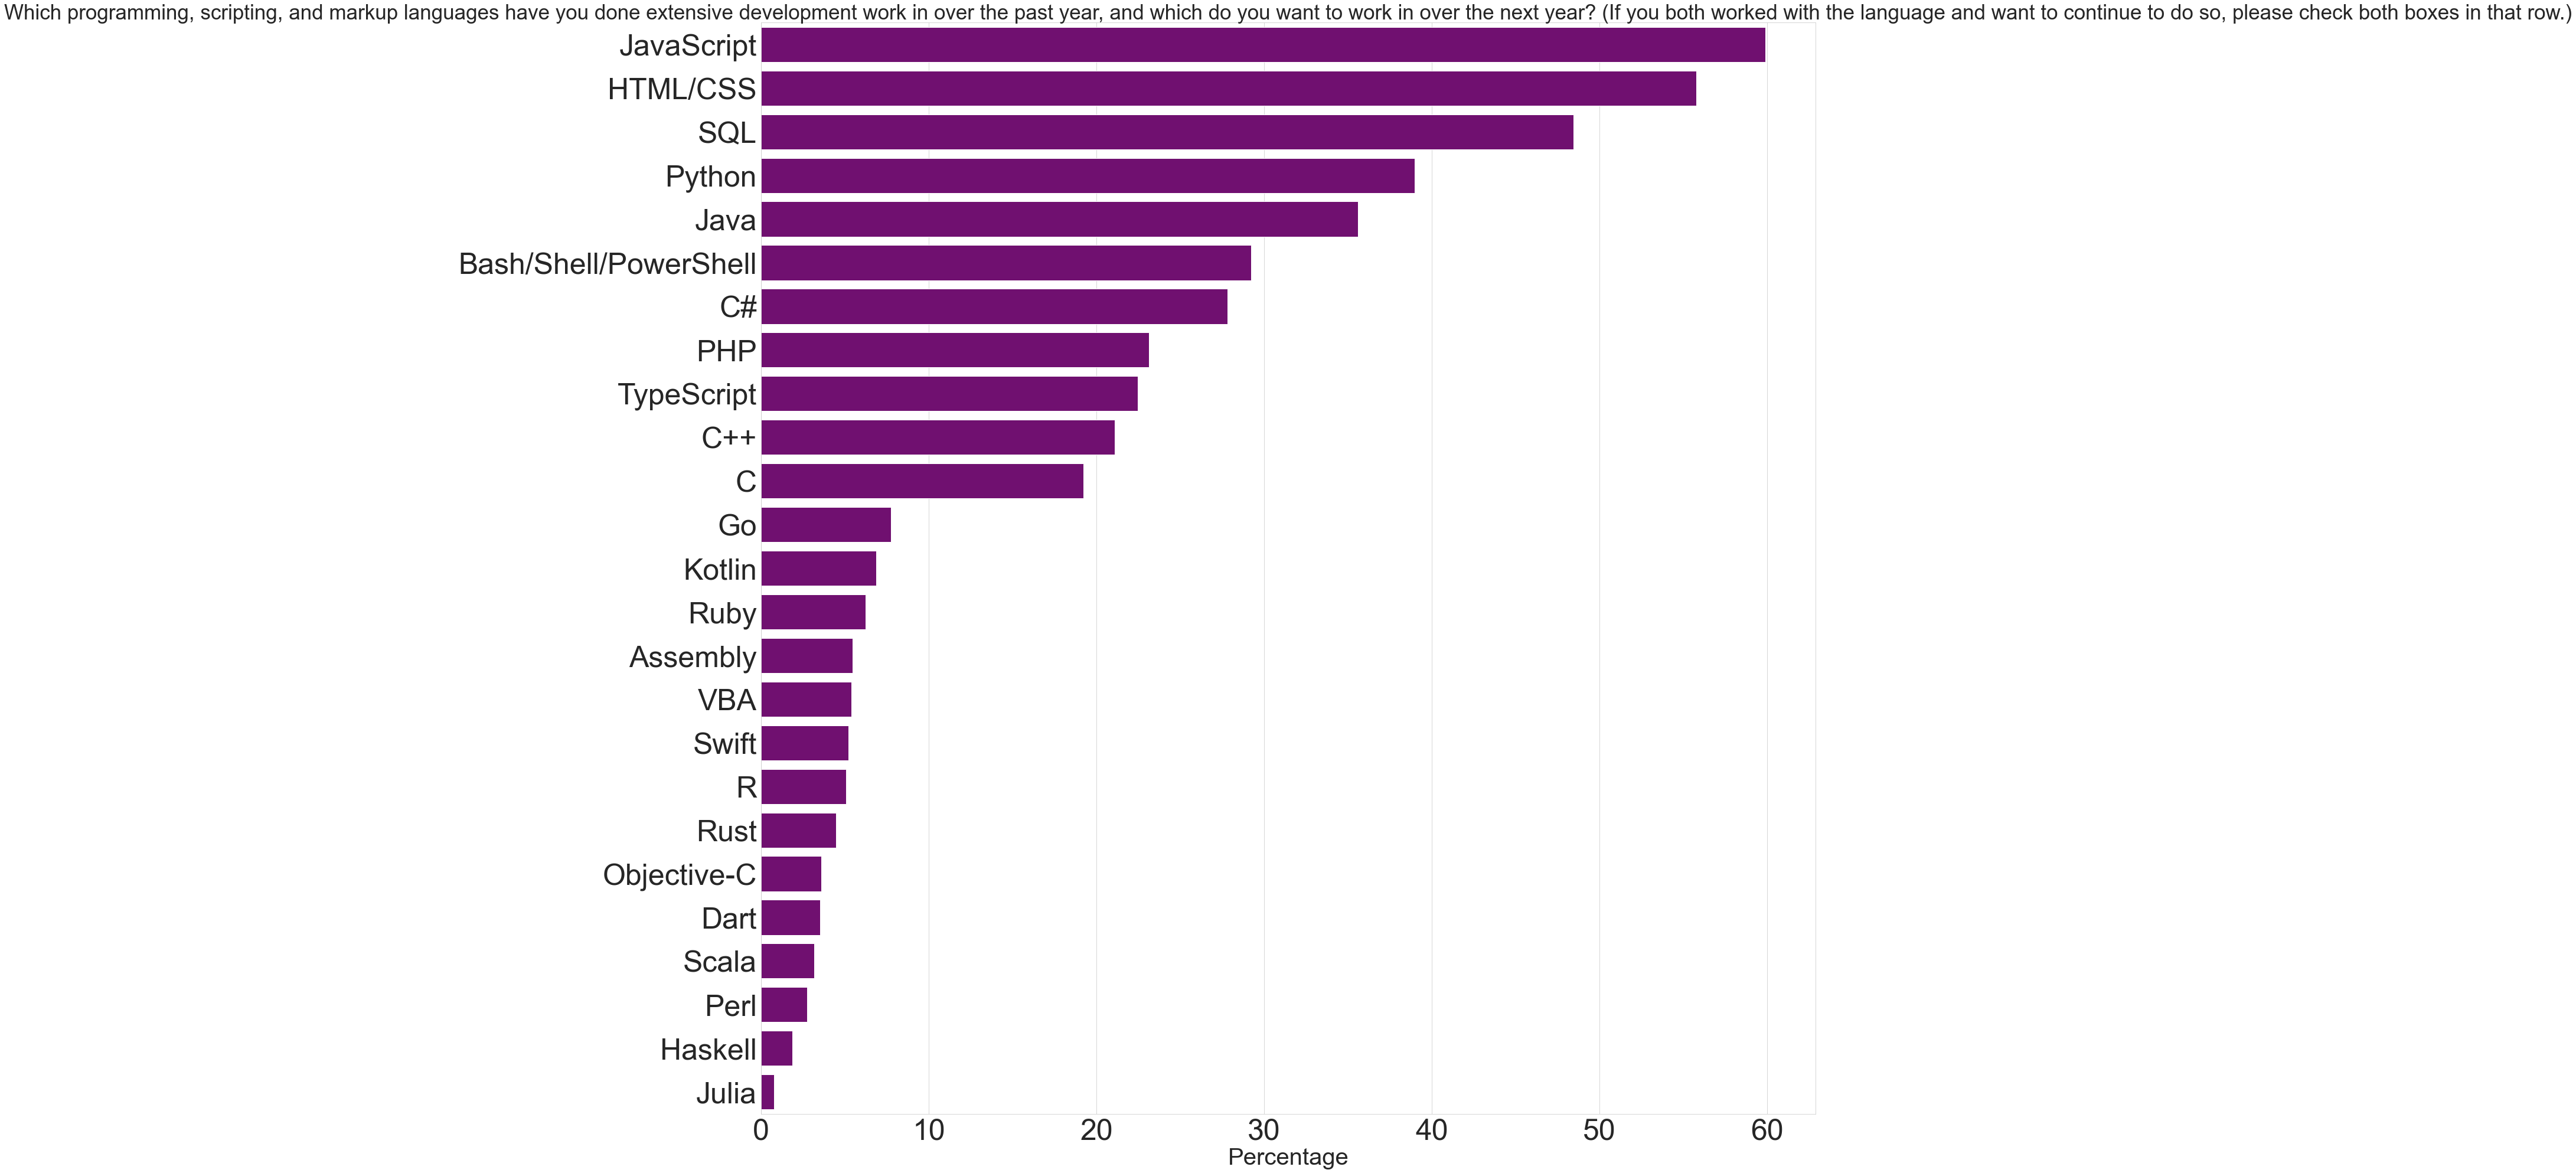

In [54]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=languages_worked_percent, ci=None, color='purple',orient='h')
ax.set_title(schema['LanguageWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Language Desire

In [55]:
#define function to split multi columns
languages_learn = split_multicolumn(update_survey_data.LanguageDesireNextYear)
languages_learn

C#  HTML/CSS  JavaScript  Python  Swift  Objective-C   Java   Ruby  \
0       True      True        True   False  False        False  False  False   
1      False     False       False    True   True        False  False  False   
2      False     False       False    True   True         True  False  False   
3      False     False       False   False  False        False  False  False   
4      False     False       False   False  False        False   True   True   
...      ...       ...         ...     ...    ...          ...    ...    ...   
64456  False     False       False   False  False        False  False  False   
64457   True      True        True    True   True         True   True   True   
64458  False     False       False   False  False        False  False  False   
64459  False      True        True   False  False        False   True  False   
64460   True      True        True   False  False        False   True  False   

       Scala    PHP  ...  Assembly  Bash/Shell/PowerShell      C  Haskell  \
0      False  False  ...     False                  False  False    False   
1      False  False  ...     False                  False  False    False   
2      False  False  ...     False                  False  False    False   
3      False  False  ...     False                  False  False    False   
4       True  False  ...     False                  False  False    False   
...      ...    ...  ...       ...                    ...    ...      ...   
64456  False  False  ...     False                  False  False    False   
64457   True   True  ...      True                   True   True     True   
64458  False  False  ...     False                  False  False    False   
64459  False  False  ...     False                  False  False    False   
64460  False  False  ...     False                  False  False    False   

        Perl    C++  Julia  Kotlin   Dart    VBA  
0      False  False  False   False  False  False  
1      False  False  False   False  False  False  
2      False  False  False   False  False  False  
3      False  False  False   False  False  False  
4      False  False  False   False  False  False  
...      ...    ...    ...     ...    ...    ...  
64456  False  False  False   False  False  False  
64457   True   True   True    True   True   True  
64458  False  False  False   False  False  False  
64459  False  False  False   False  False  False  
64460  False  False  False   False  False  False  

[64453 rows x 25 columns]

In [56]:
languages_learn_percent = languages_learn.mean().sort_values(ascending=False) * 100
languages_learn_percent= languages_learn_percent.to_frame(name='percentage').reset_index()
languages_learn_percent

index  percentage
0                  Python   41.135401
1              JavaScript   40.413945
2                HTML/CSS   32.038850
3                     SQL   30.794532
4              TypeScript   26.461142
5                      C#   21.072720
6                    Java   20.467628
7                      Go   19.437420
8   Bash/Shell/PowerShell   18.065877
9                    Rust   16.255256
10                    C++   15.017144
11                 Kotlin   14.768901
12                    PHP   10.949064
13                      C    9.364964
14                  Swift    8.693156
15                   Dart    7.309202
16                      R    6.567576
17                   Ruby    6.421734
18                  Scala    5.331016
19                Haskell    4.590942
20               Assembly    3.770189
21                  Julia    2.542938
22            Objective-C    2.339689
23                   Perl    1.760973
24                    VBA    1.612027

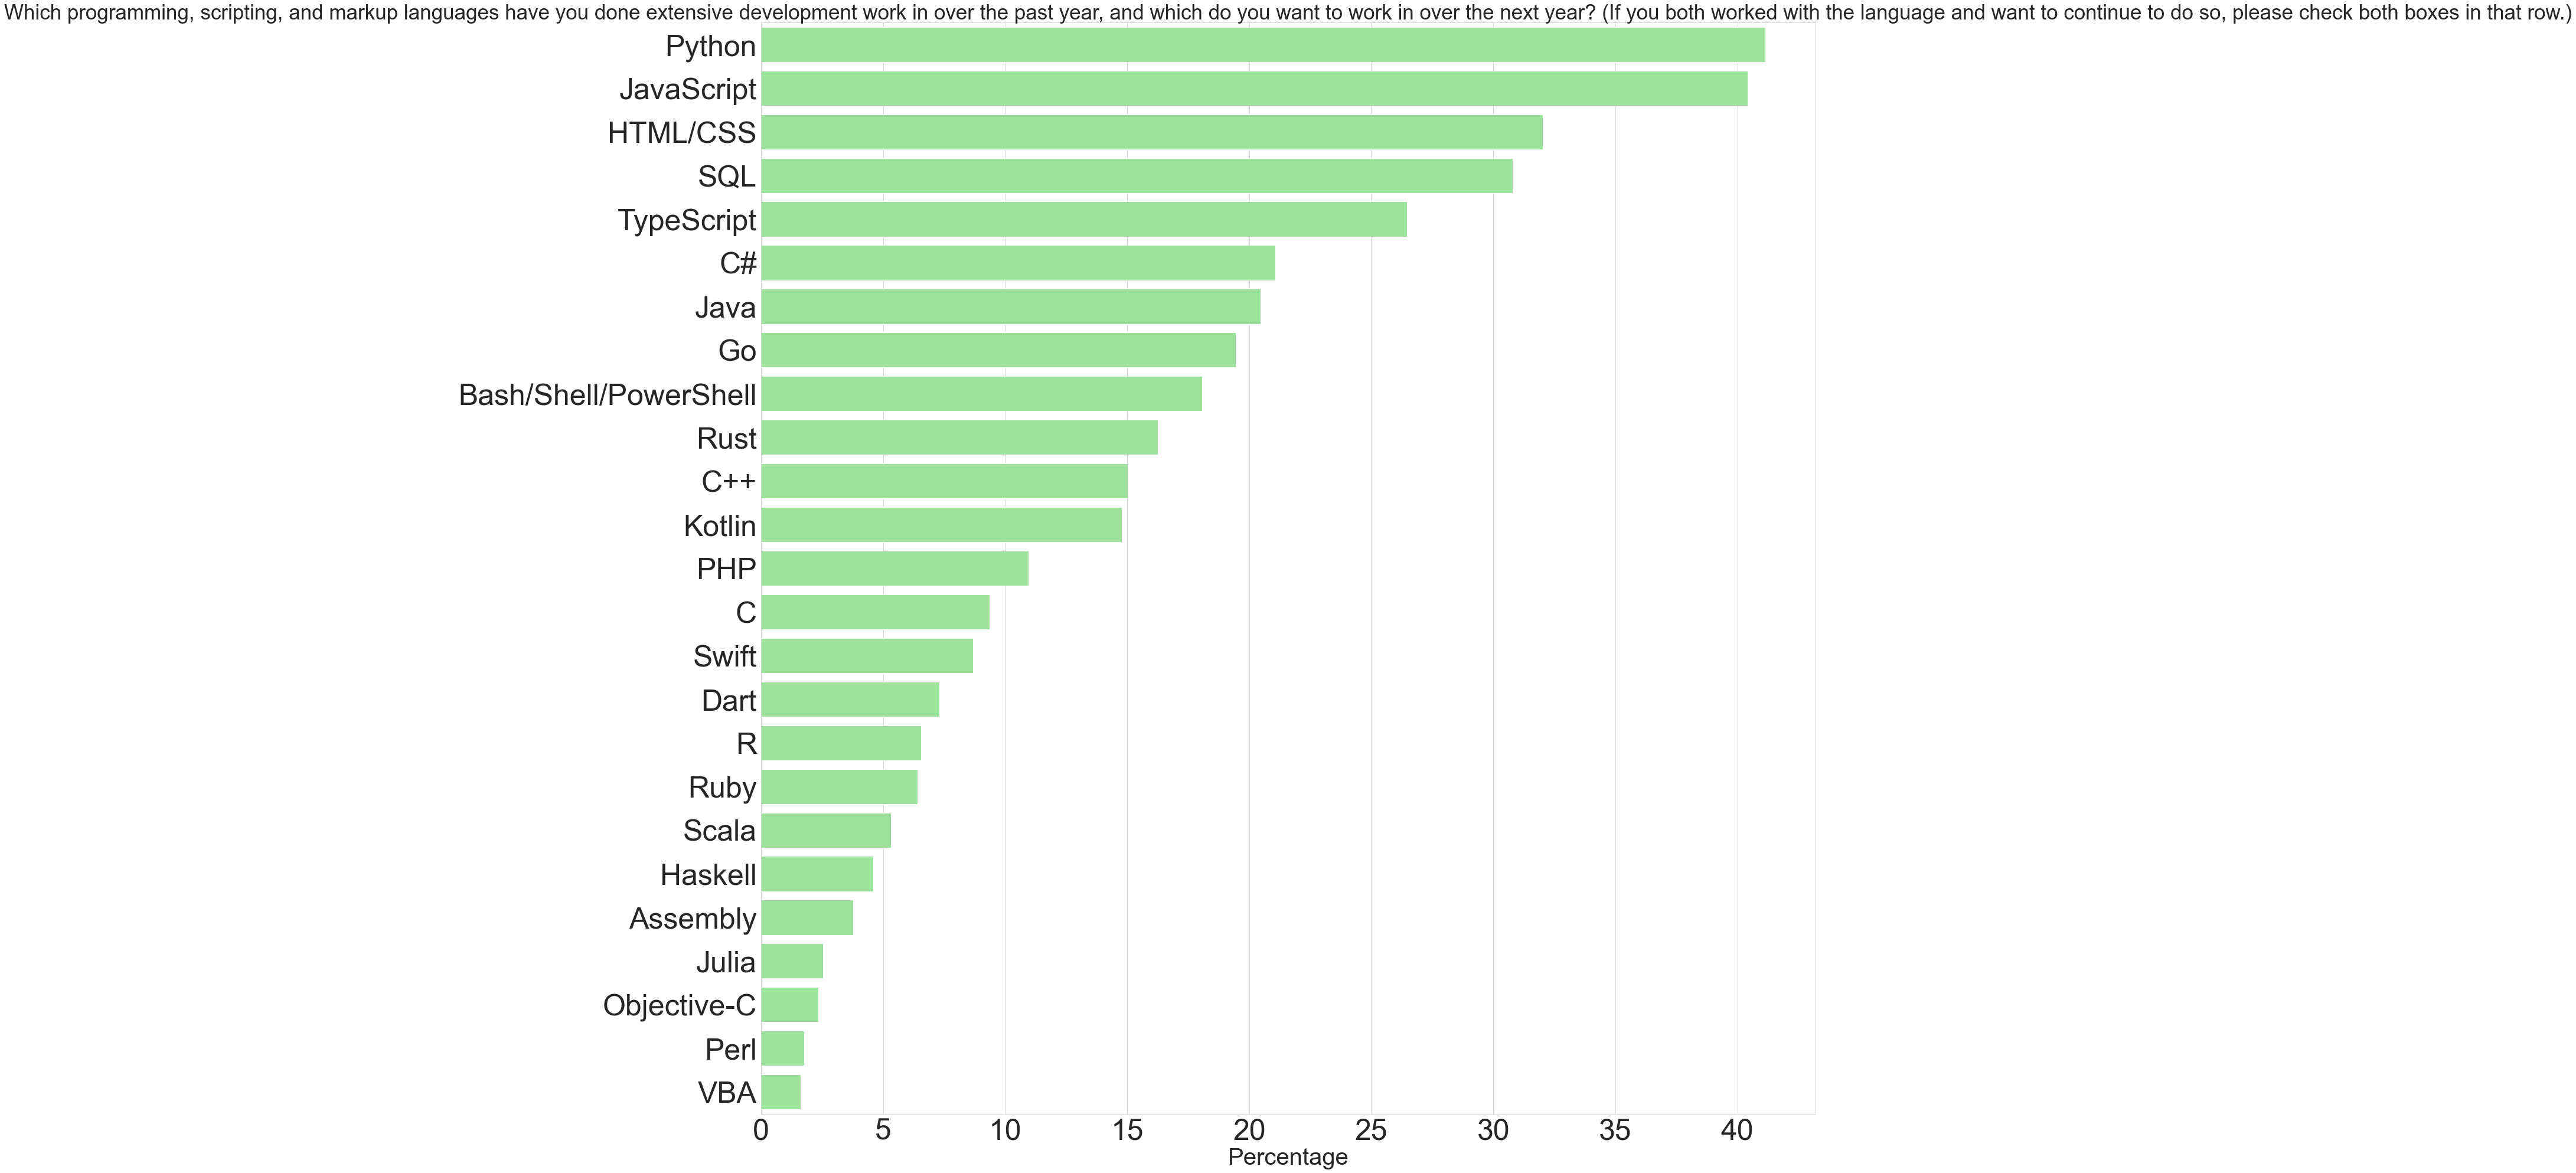

In [57]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=languages_learn_percent, ci=None, color='lightgreen',orient='h')
ax.set_title(schema['LanguageDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Frameworks, Libraries, Tools worked  with


In [58]:
#define function to split multi columns
frame_worked = split_multicolumn(update_survey_data.MiscTechWorkedWith)
frame_worked

.NET  .NET Core  React Native  Ansible  Pandas  Node.js  Unity 3D  \
0       True       True         False    False   False    False     False   
1      False      False          True    False   False    False     False   
2      False      False         False    False   False    False     False   
3      False      False         False    False   False    False     False   
4      False      False         False     True   False    False     False   
...      ...        ...           ...      ...     ...      ...       ...   
64456  False      False         False    False   False    False     False   
64457  False      False         False    False   False    False     False   
64458  False      False         False    False   False    False     False   
64459  False      False         False    False   False    False     False   
64460   True       True         False    False   False    False     False   

       TensorFlow  Torch/PyTorch  Teraform  Unreal Engine  Hadoop  Flutter  \
0           False          False     False          False   False    False   
1           False          False     False          False   False    False   
2           False          False     False          False   False    False   
3           False          False     False          False   False    False   
4           False          False     False          False   False    False   
...           ...            ...       ...            ...     ...      ...   
64456       False          False     False          False   False    False   
64457       False          False     False          False   False    False   
64458       False          False     False          False   False    False   
64459       False          False     False          False   False    False   
64460       False          False     False          False   False    False   

       Cordova  Xamarin  Keras   Chef  Apache Spark  Puppet  
0        False    False  False  False         False   False  
1        False    False  False  False         False   False  
2        False    False  False  False         False   False  
3        False    False  False  False         False   False  
4        False    False  False  False         False   False  
...        ...      ...    ...    ...           ...     ...  
64456    False    False  False  False         False   False  
64457    False    False  False  False         False   False  
64458    False    False  False  False         False   False  
64459    False    False  False  False         False   False  
64460    False    False  False  False         False   False  

[64453 rows x 19 columns]

In [59]:
frame_worked_percent = frame_worked.mean().sort_values(ascending=False) * 100
frame_worked_percent= frame_worked_percent.to_frame(name='percentage').reset_index()
frame_worked_percent

index  percentage
0         Node.js   31.989201
1            .NET   21.795727
2       .NET Core   16.565559
3          Pandas    9.639582
4      TensorFlow    7.168014
5    React Native    7.132329
6        Unity 3D    6.794098
7         Ansible    4.553706
8         Flutter    4.471475
9        Teraform    3.878795
10          Keras    3.853971
11        Cordova    3.726747
12        Xamarin    3.630552
13   Apache Spark    3.208540
14  Torch/PyTorch    2.882721
15         Hadoop    2.763254
16  Unreal Engine    2.020077
17         Puppet    1.442912
18           Chef    1.121748

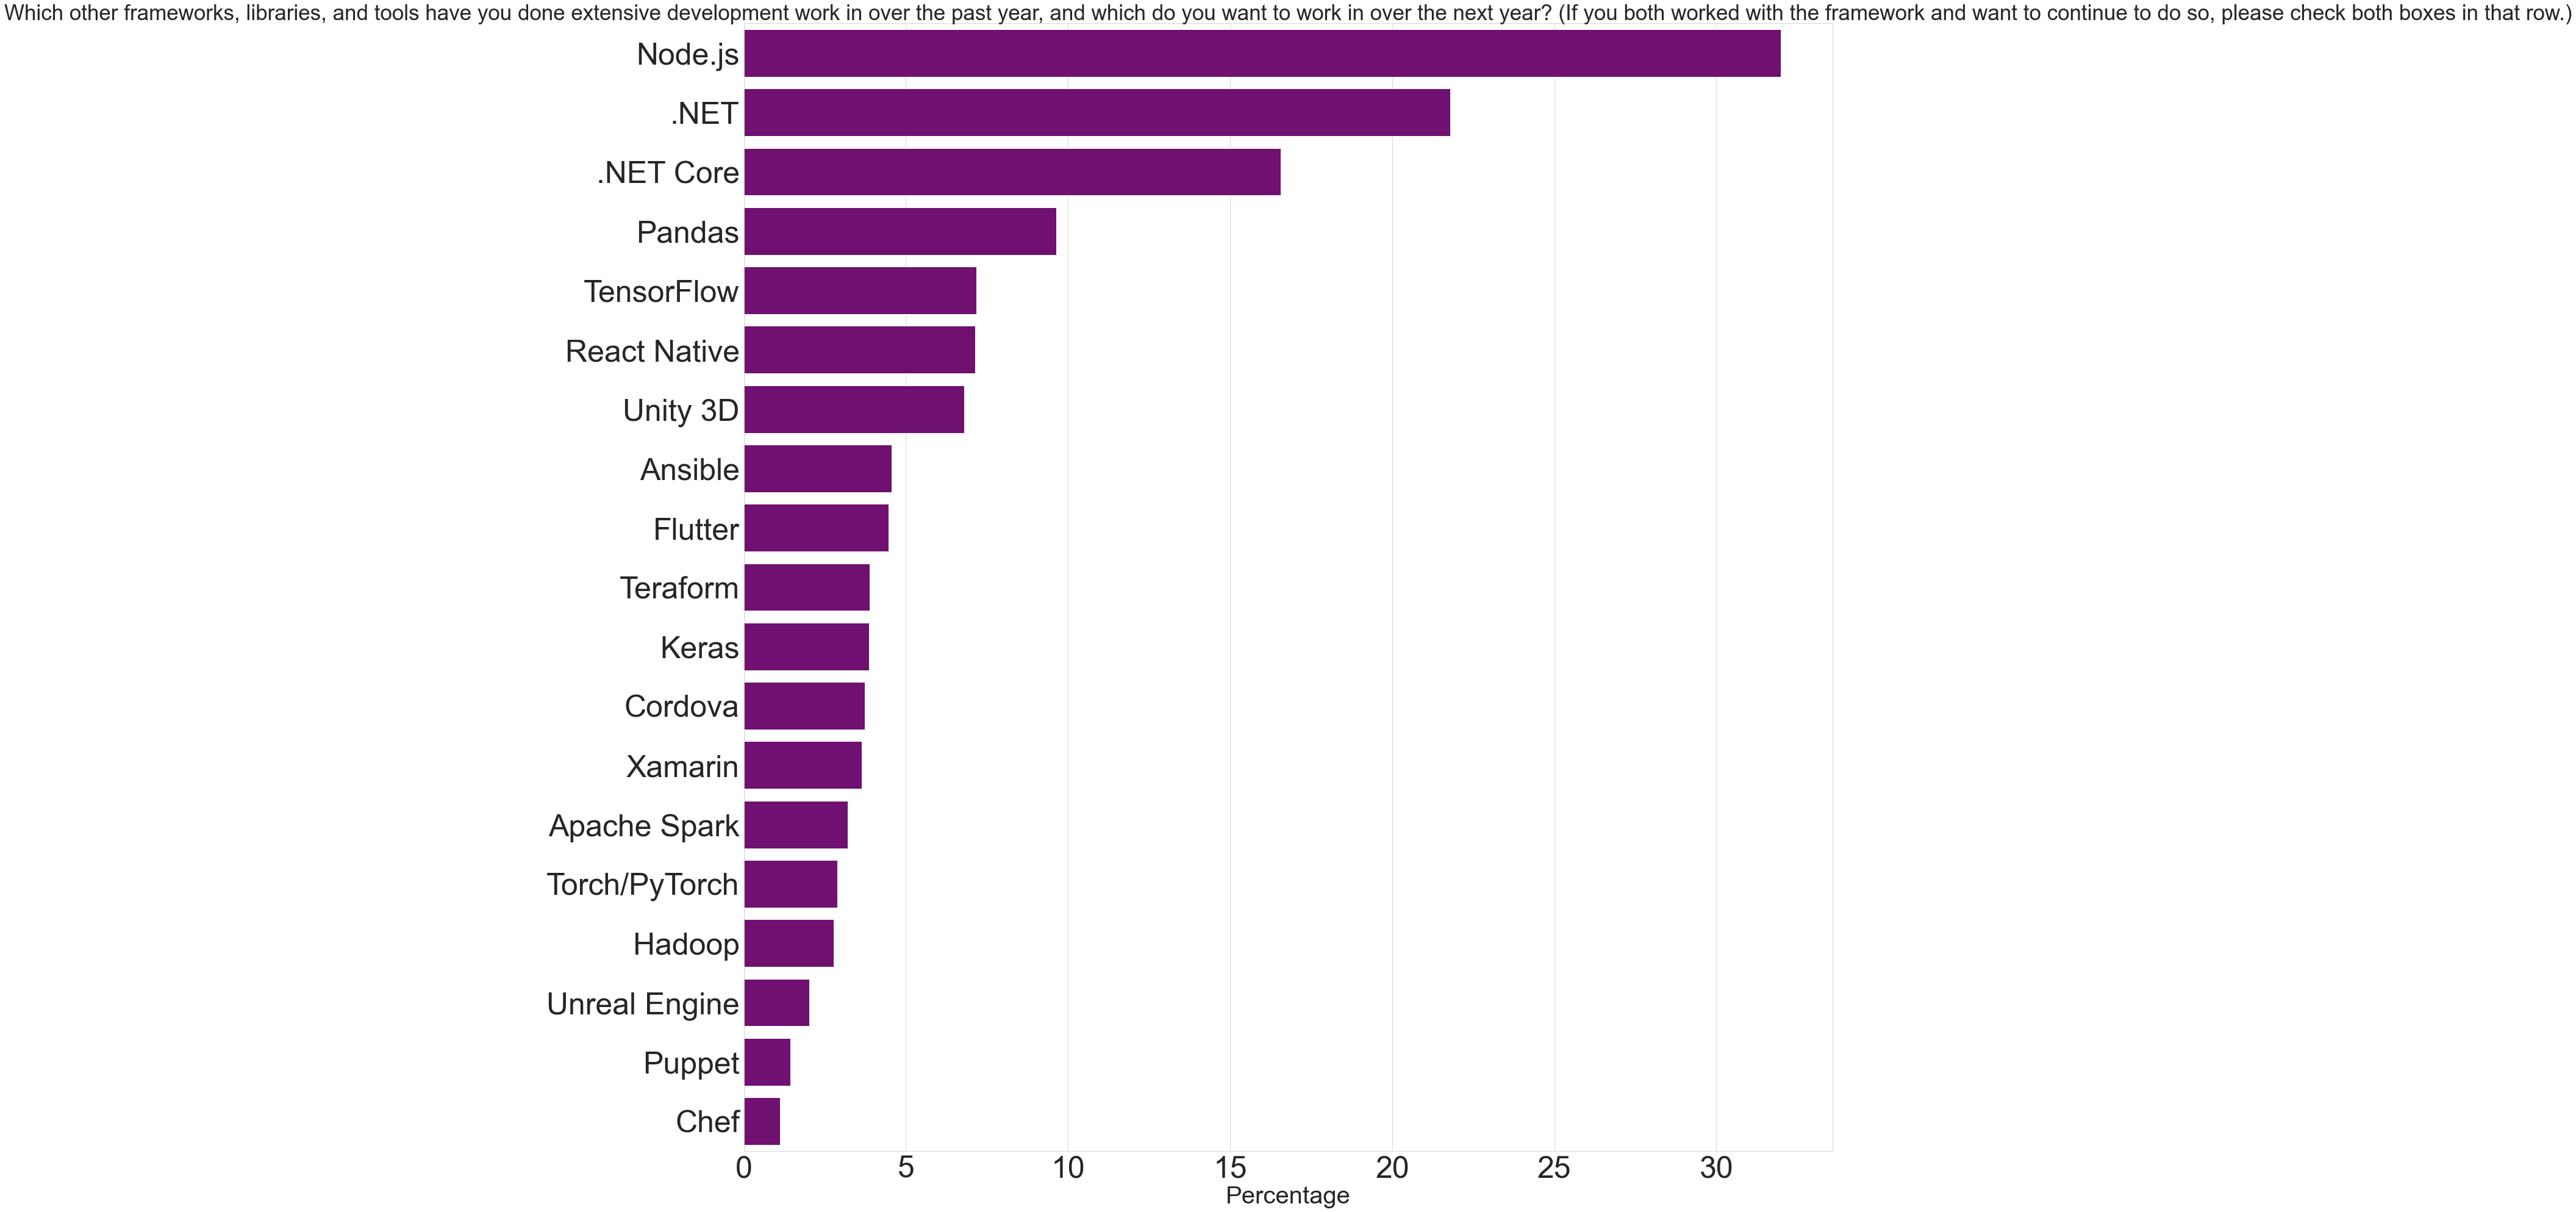

In [60]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=frame_worked_percent, ci=None, color='purple',orient='h')
ax.set_title(schema['MiscTechWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Frameworks, Libraries, Tools desire

In [61]:
#define function to split multi columns
frame_desire = split_multicolumn(update_survey_data.MiscTechDesireNextYear)
frame_desire

.NET Core  Xamarin  React Native  TensorFlow  Unity 3D  Ansible   Chef  \
0           True     True         False       False     False    False  False   
1          False    False          True        True      True    False  False   
2          False    False         False       False     False    False  False   
3          False    False         False       False     False    False  False   
4          False    False         False       False     False     True   True   
...          ...      ...           ...         ...       ...      ...    ...   
64456      False    False         False       False     False    False  False   
64457      False    False         False       False     False    False  False   
64458      False    False         False       False     False    False  False   
64459      False    False         False       False     False    False  False   
64460       True     True         False       False     False    False  False   

       Pandas  Node.js   .NET  Teraform  Unreal Engine  Flutter  Keras  \
0       False    False  False     False          False    False  False   
1       False    False  False     False          False    False  False   
2       False    False  False     False          False    False  False   
3       False    False  False     False          False    False  False   
4       False    False  False     False          False    False  False   
...       ...      ...    ...       ...            ...      ...    ...   
64456   False    False  False     False          False    False  False   
64457   False    False  False     False          False    False  False   
64458   False    False  False     False          False    False  False   
64459   False     True  False     False          False    False  False   
64460   False    False  False     False          False    False  False   

       Torch/PyTorch  Apache Spark  Hadoop  Cordova  Puppet  
0              False         False   False    False   False  
1              False         False   False    False   False  
2              False         False   False    False   False  
3              False         False   False    False   False  
4              False         False   False    False   False  
...              ...           ...     ...      ...     ...  
64456          False         False   False    False   False  
64457          False         False   False    False   False  
64458          False         False   False    False   False  
64459          False         False   False    False   False  
64460          False         False   False    False   False  

[64453 rows x 19 columns]

In [62]:
frame_desire_percent = frame_desire.mean().sort_values(ascending=False) * 100
frame_desire_percent= frame_desire_percent.to_frame(name='percentage').reset_index()
frame_desire_percent

index  percentage
0         Node.js   31.796813
1      TensorFlow   18.832327
2       .NET Core   17.881247
3    React Native   15.702915
4            .NET   12.933455
5         Flutter   12.157696
6        Unity 3D   11.397452
7          Pandas   10.407584
8   Torch/PyTorch    7.850682
9   Unreal Engine    6.521031
10       Teraform    6.331746
11   Apache Spark    6.201418
12         Hadoop    6.116085
13          Keras    5.768545
14        Xamarin    5.531162
15        Ansible    5.442726
16        Cordova    2.358308
17         Puppet    2.066622
18           Chef    1.720634

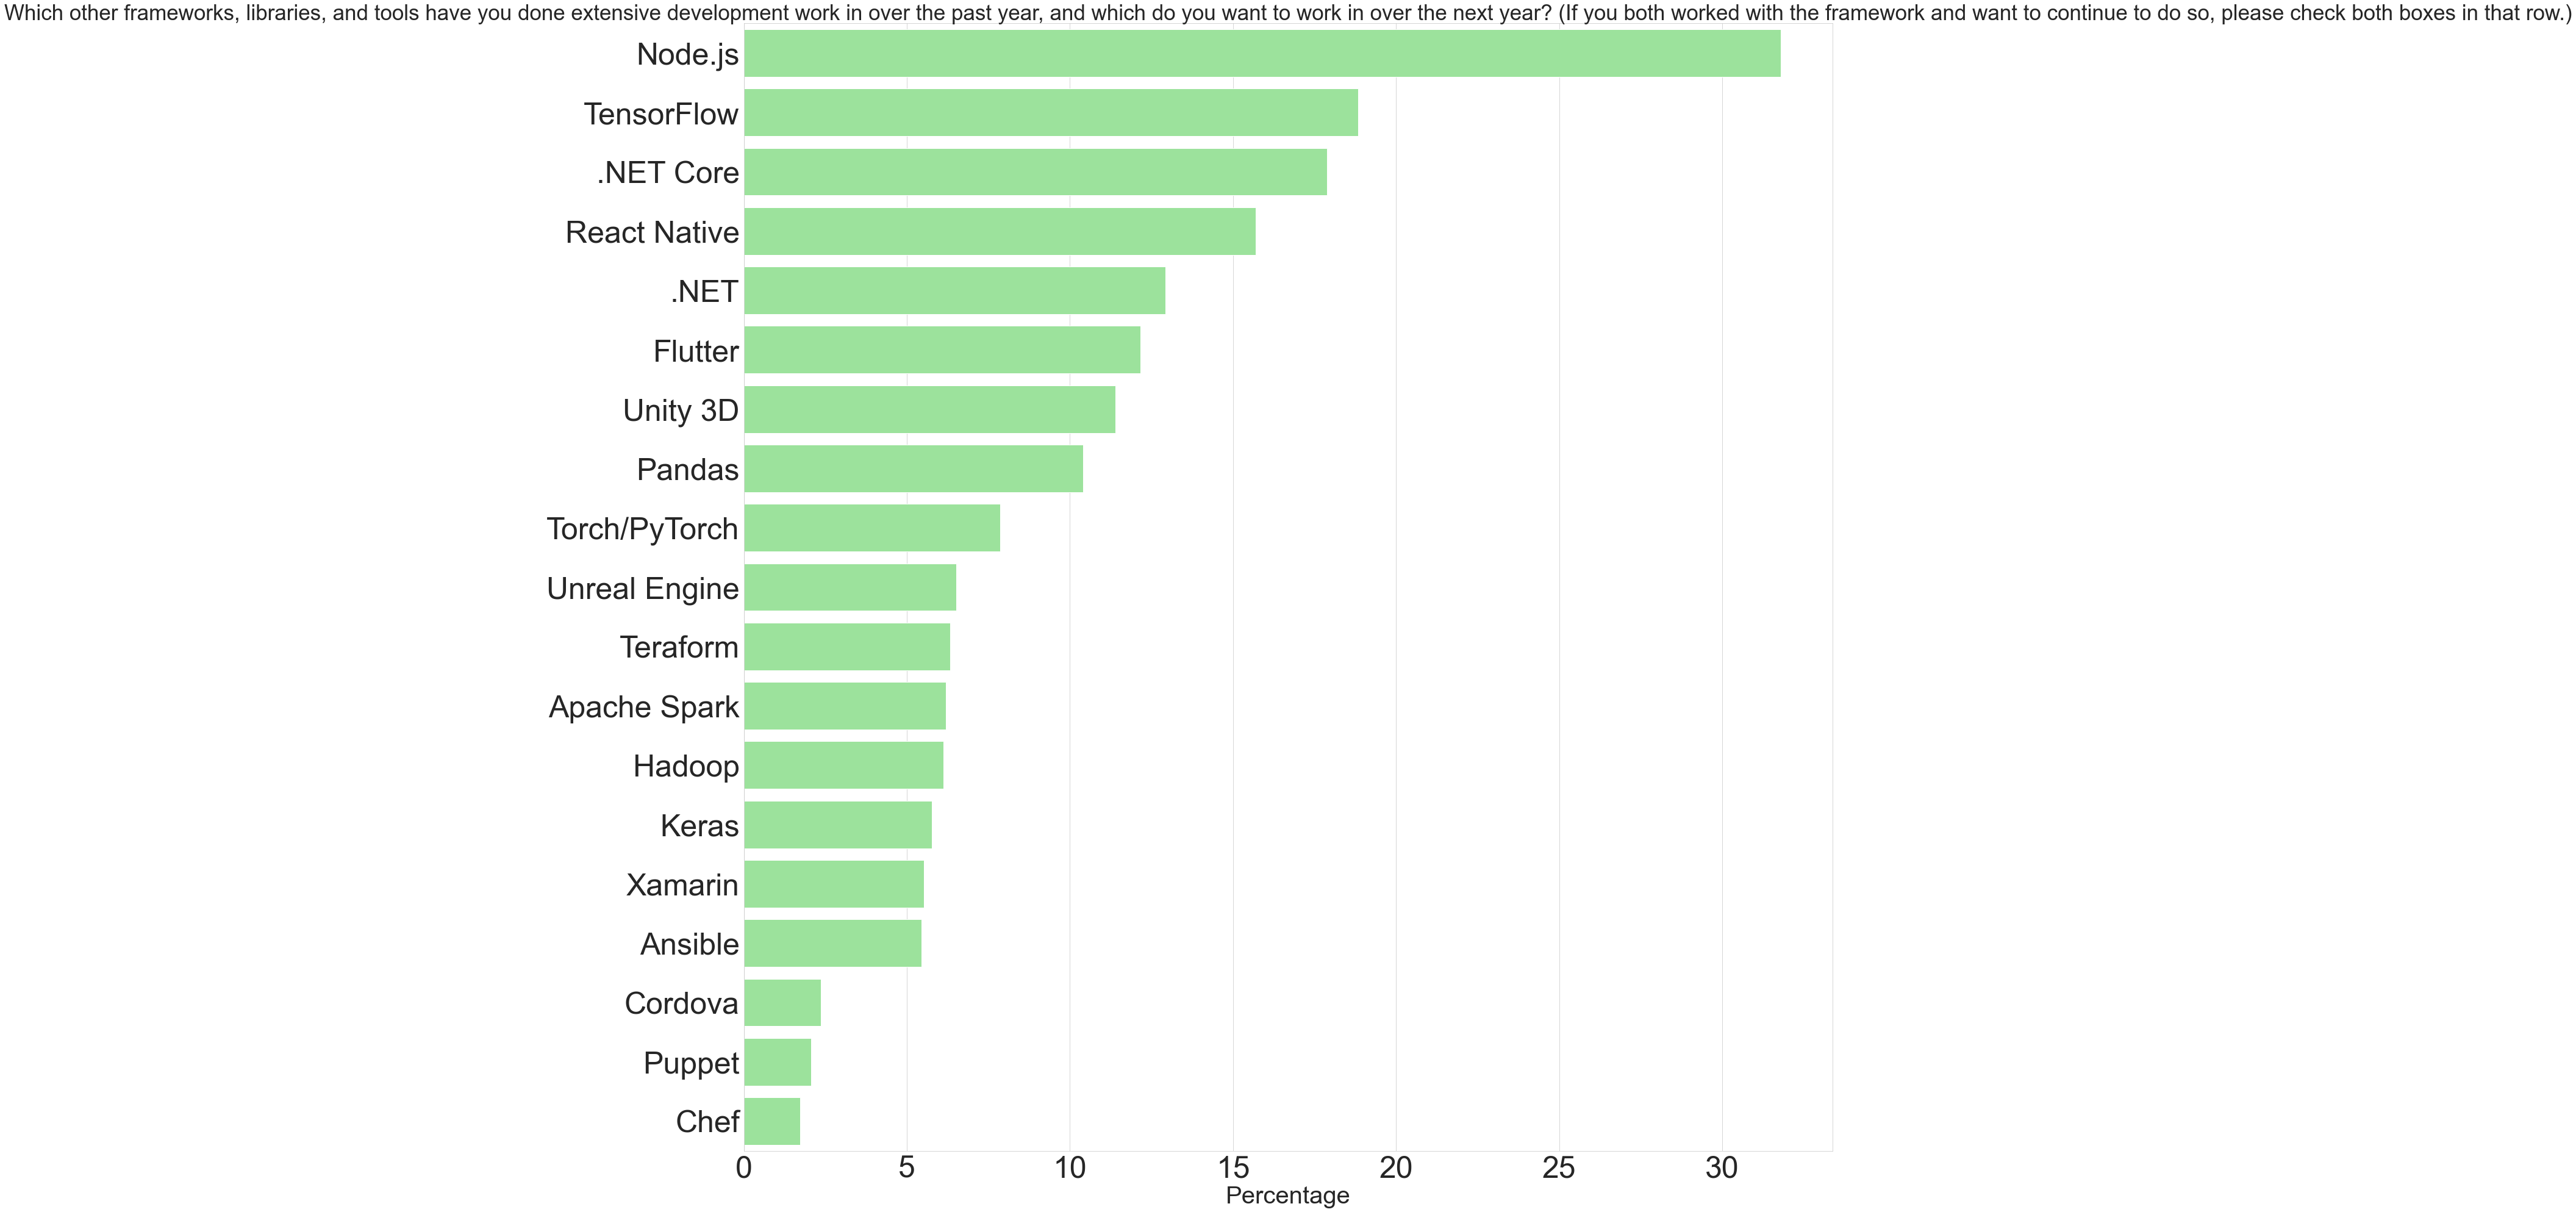

In [63]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=frame_desire_percent, ci=None, color='lightgreen',orient='h')
ax.set_title(schema['MiscTechDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Frameworks, Libraries, Tools desire

In [64]:
#define function to split multi columns
frame_desire = split_multicolumn(update_survey_data.MiscTechDesireNextYear)
frame_desire

.NET Core  Xamarin  React Native  TensorFlow  Unity 3D  Ansible   Chef  \
0           True     True         False       False     False    False  False   
1          False    False          True        True      True    False  False   
2          False    False         False       False     False    False  False   
3          False    False         False       False     False    False  False   
4          False    False         False       False     False     True   True   
...          ...      ...           ...         ...       ...      ...    ...   
64456      False    False         False       False     False    False  False   
64457      False    False         False       False     False    False  False   
64458      False    False         False       False     False    False  False   
64459      False    False         False       False     False    False  False   
64460       True     True         False       False     False    False  False   

       Pandas  Node.js   .NET  Teraform  Unreal Engine  Flutter  Keras  \
0       False    False  False     False          False    False  False   
1       False    False  False     False          False    False  False   
2       False    False  False     False          False    False  False   
3       False    False  False     False          False    False  False   
4       False    False  False     False          False    False  False   
...       ...      ...    ...       ...            ...      ...    ...   
64456   False    False  False     False          False    False  False   
64457   False    False  False     False          False    False  False   
64458   False    False  False     False          False    False  False   
64459   False     True  False     False          False    False  False   
64460   False    False  False     False          False    False  False   

       Torch/PyTorch  Apache Spark  Hadoop  Cordova  Puppet  
0              False         False   False    False   False  
1              False         False   False    False   False  
2              False         False   False    False   False  
3              False         False   False    False   False  
4              False         False   False    False   False  
...              ...           ...     ...      ...     ...  
64456          False         False   False    False   False  
64457          False         False   False    False   False  
64458          False         False   False    False   False  
64459          False         False   False    False   False  
64460          False         False   False    False   False  

[64453 rows x 19 columns]

In [65]:
frame_desire_percent = frame_desire.mean().sort_values(ascending=False) * 100
frame_desire_percent= frame_desire_percent.to_frame(name='percentage').reset_index()
frame_desire_percent

index  percentage
0         Node.js   31.796813
1      TensorFlow   18.832327
2       .NET Core   17.881247
3    React Native   15.702915
4            .NET   12.933455
5         Flutter   12.157696
6        Unity 3D   11.397452
7          Pandas   10.407584
8   Torch/PyTorch    7.850682
9   Unreal Engine    6.521031
10       Teraform    6.331746
11   Apache Spark    6.201418
12         Hadoop    6.116085
13          Keras    5.768545
14        Xamarin    5.531162
15        Ansible    5.442726
16        Cordova    2.358308
17         Puppet    2.066622
18           Chef    1.720634

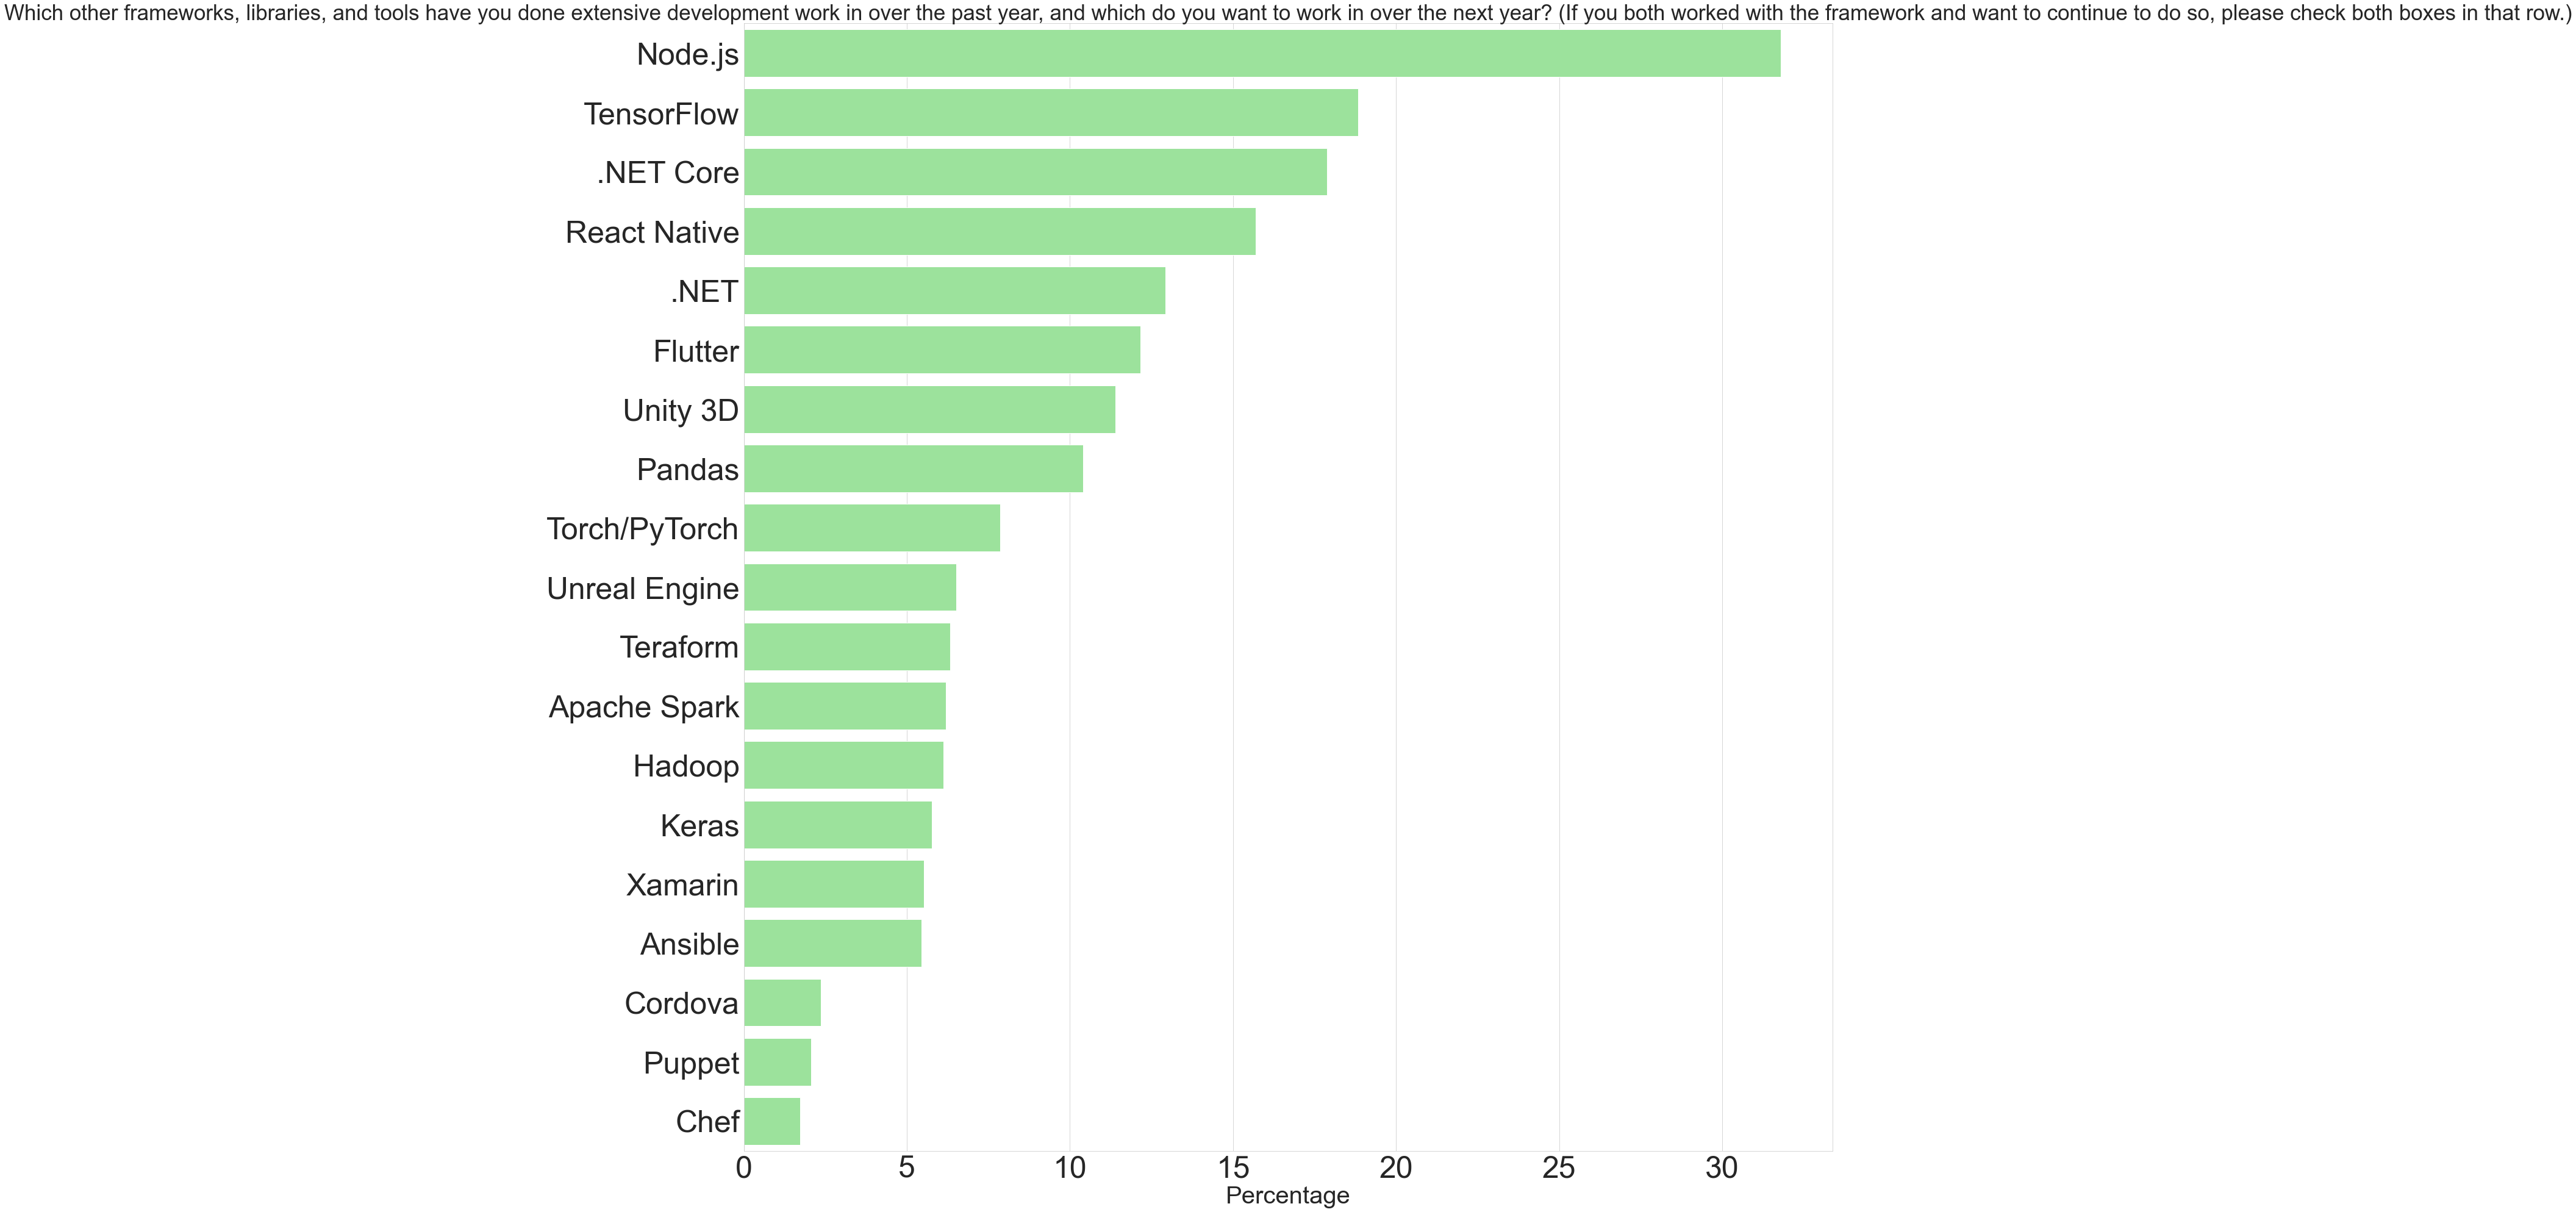

In [66]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=frame_desire_percent, ci=None, color='lightgreen',orient='h')
ax.set_title(schema['MiscTechDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### New Collab tools worked with

In [67]:
#define function to split multi columns
collab_worked = split_multicolumn(update_survey_data.NEWCollabToolsWorkedWith)
collab_worked

Confluence   Jira  Slack  Microsoft Azure  Trello  Github  Gitlab  \
0            True   True   True             True    True   False   False   
1            True   True   True            False   False    True    True   
2           False  False  False            False   False   False   False   
3           False  False  False            False   False   False   False   
4            True   True   True            False   False    True   False   
...           ...    ...    ...              ...     ...     ...     ...   
64456       False  False  False            False   False   False   False   
64457       False  False  False            False   False   False   False   
64458       False  False  False            False   False   False   False   
64459        True   True   True            False   False   False   False   
64460       False  False  False            False   False    True   False   

       Google Suite (Docs, Meet, etc)  Microsoft Teams  \
0                               False            False   
1                               False            False   
2                               False            False   
3                               False            False   
4                                True            False   
...                               ...              ...   
64456                           False            False   
64457                           False            False   
64458                           False            False   
64459                           False             True   
64460                           False            False   

       Stack Overflow for Teams  Facebook Workplace  
0                         False               False  
1                         False               False  
2                         False               False  
3                         False               False  
4                         False               False  
...                         ...                 ...  
64456                     False               False  
64457                     False               False  
64458                     False               False  
64459                     False               False  
64460                     False               False  

[64453 rows x 11 columns]

In [68]:
collab_worked_percent = collab_worked.mean().sort_values(ascending=False) * 100
collab_worked_percent= collab_worked_percent.to_frame(name='percentage').reset_index()
collab_worked_percent


index  percentage
0                           Github   67.543792
1                            Slack   43.233054
2                             Jira   38.930694
3   Google Suite (Docs, Meet, etc)   33.830853
4                           Gitlab   30.161513
5                       Confluence   26.416148
6                           Trello   24.140071
7                  Microsoft Teams   20.860162
8                  Microsoft Azure   12.092533
9         Stack Overflow for Teams    4.694894
10              Facebook Workplace    2.415714

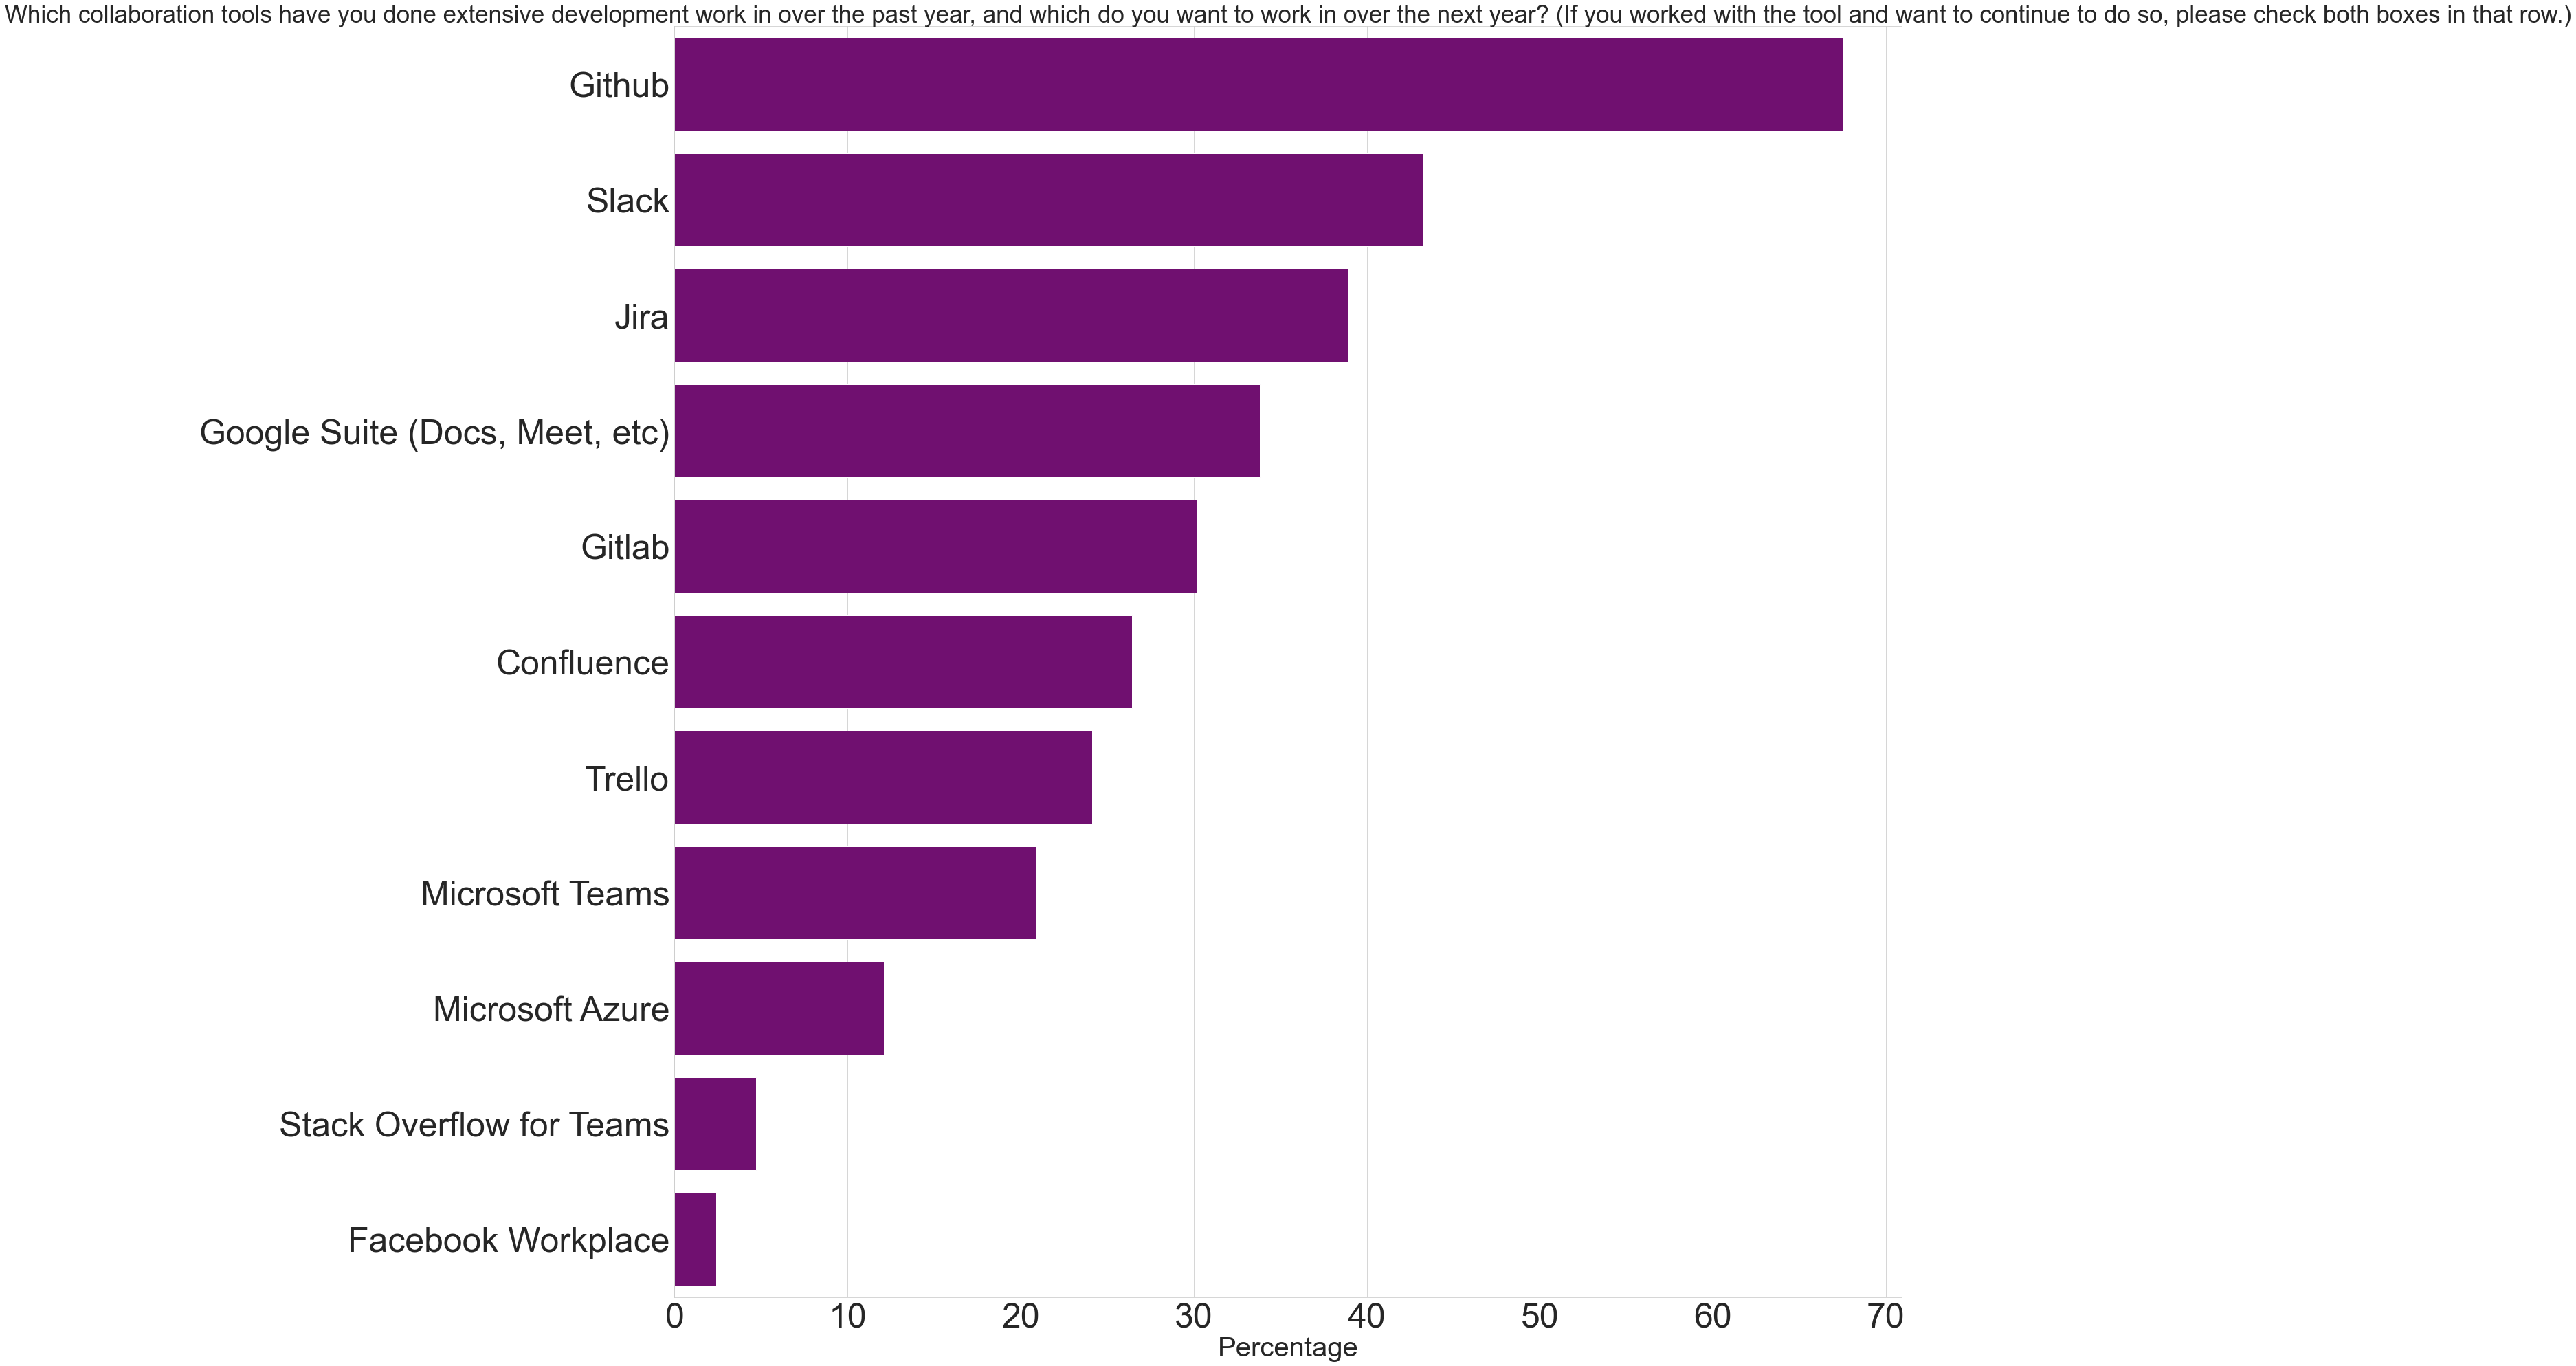

In [69]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=collab_worked_percent, ci=None, color='purple',orient='h')
ax.set_title(schema['NEWCollabToolsWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Collab Tools desire

In [70]:
#define function to split multi columns
collab_desire = split_multicolumn(update_survey_data.NEWCollabToolsDesireNextYear)
collab_desire

Microsoft Teams  Microsoft Azure  Trello  Github  Slack  \
0                 True             True    True   False  False   
1                False            False   False    True   True   
2                False            False   False   False  False   
3                False            False   False   False  False   
4                False            False   False    True  False   
...                ...              ...     ...     ...    ...   
64456            False            False   False   False  False   
64457            False            False   False   False  False   
64458            False            False   False   False  False   
64459            False            False   False    True  False   
64460             True            False   False    True  False   

       Google Suite (Docs, Meet, etc)   Jira  Confluence  Gitlab  \
0                               False  False       False   False   
1                               False  False       False   False   
2                               False  False       False   False   
3                               False  False       False   False   
4                                True  False       False   False   
...                               ...    ...         ...     ...   
64456                           False  False       False   False   
64457                           False  False       False   False   
64458                           False  False       False   False   
64459                           False  False       False    True   
64460                           False  False       False   False   

       Stack Overflow for Teams  Facebook Workplace  
0                         False               False  
1                         False               False  
2                         False               False  
3                         False               False  
4                         False               False  
...                         ...                 ...  
64456                     False               False  
64457                     False               False  
64458                     False               False  
64459                     False               False  
64460                     False               False  

[64453 rows x 11 columns]

In [71]:
collab_desire_percent = collab_desire.mean().sort_values(ascending=False) * 100
collab_desire_percent= collab_desire_percent.to_frame(name='percentage').reset_index()
collab_desire_percent


index  percentage
0                           Github   57.094317
1                            Slack   32.584984
2                           Gitlab   26.192730
3   Google Suite (Docs, Meet, etc)   24.515538
4                             Jira   24.382108
5                           Trello   15.003181
6                       Confluence   14.120367
7                  Microsoft Teams   12.919492
8                  Microsoft Azure   12.145284
9         Stack Overflow for Teams   10.098832
10              Facebook Workplace    2.401750

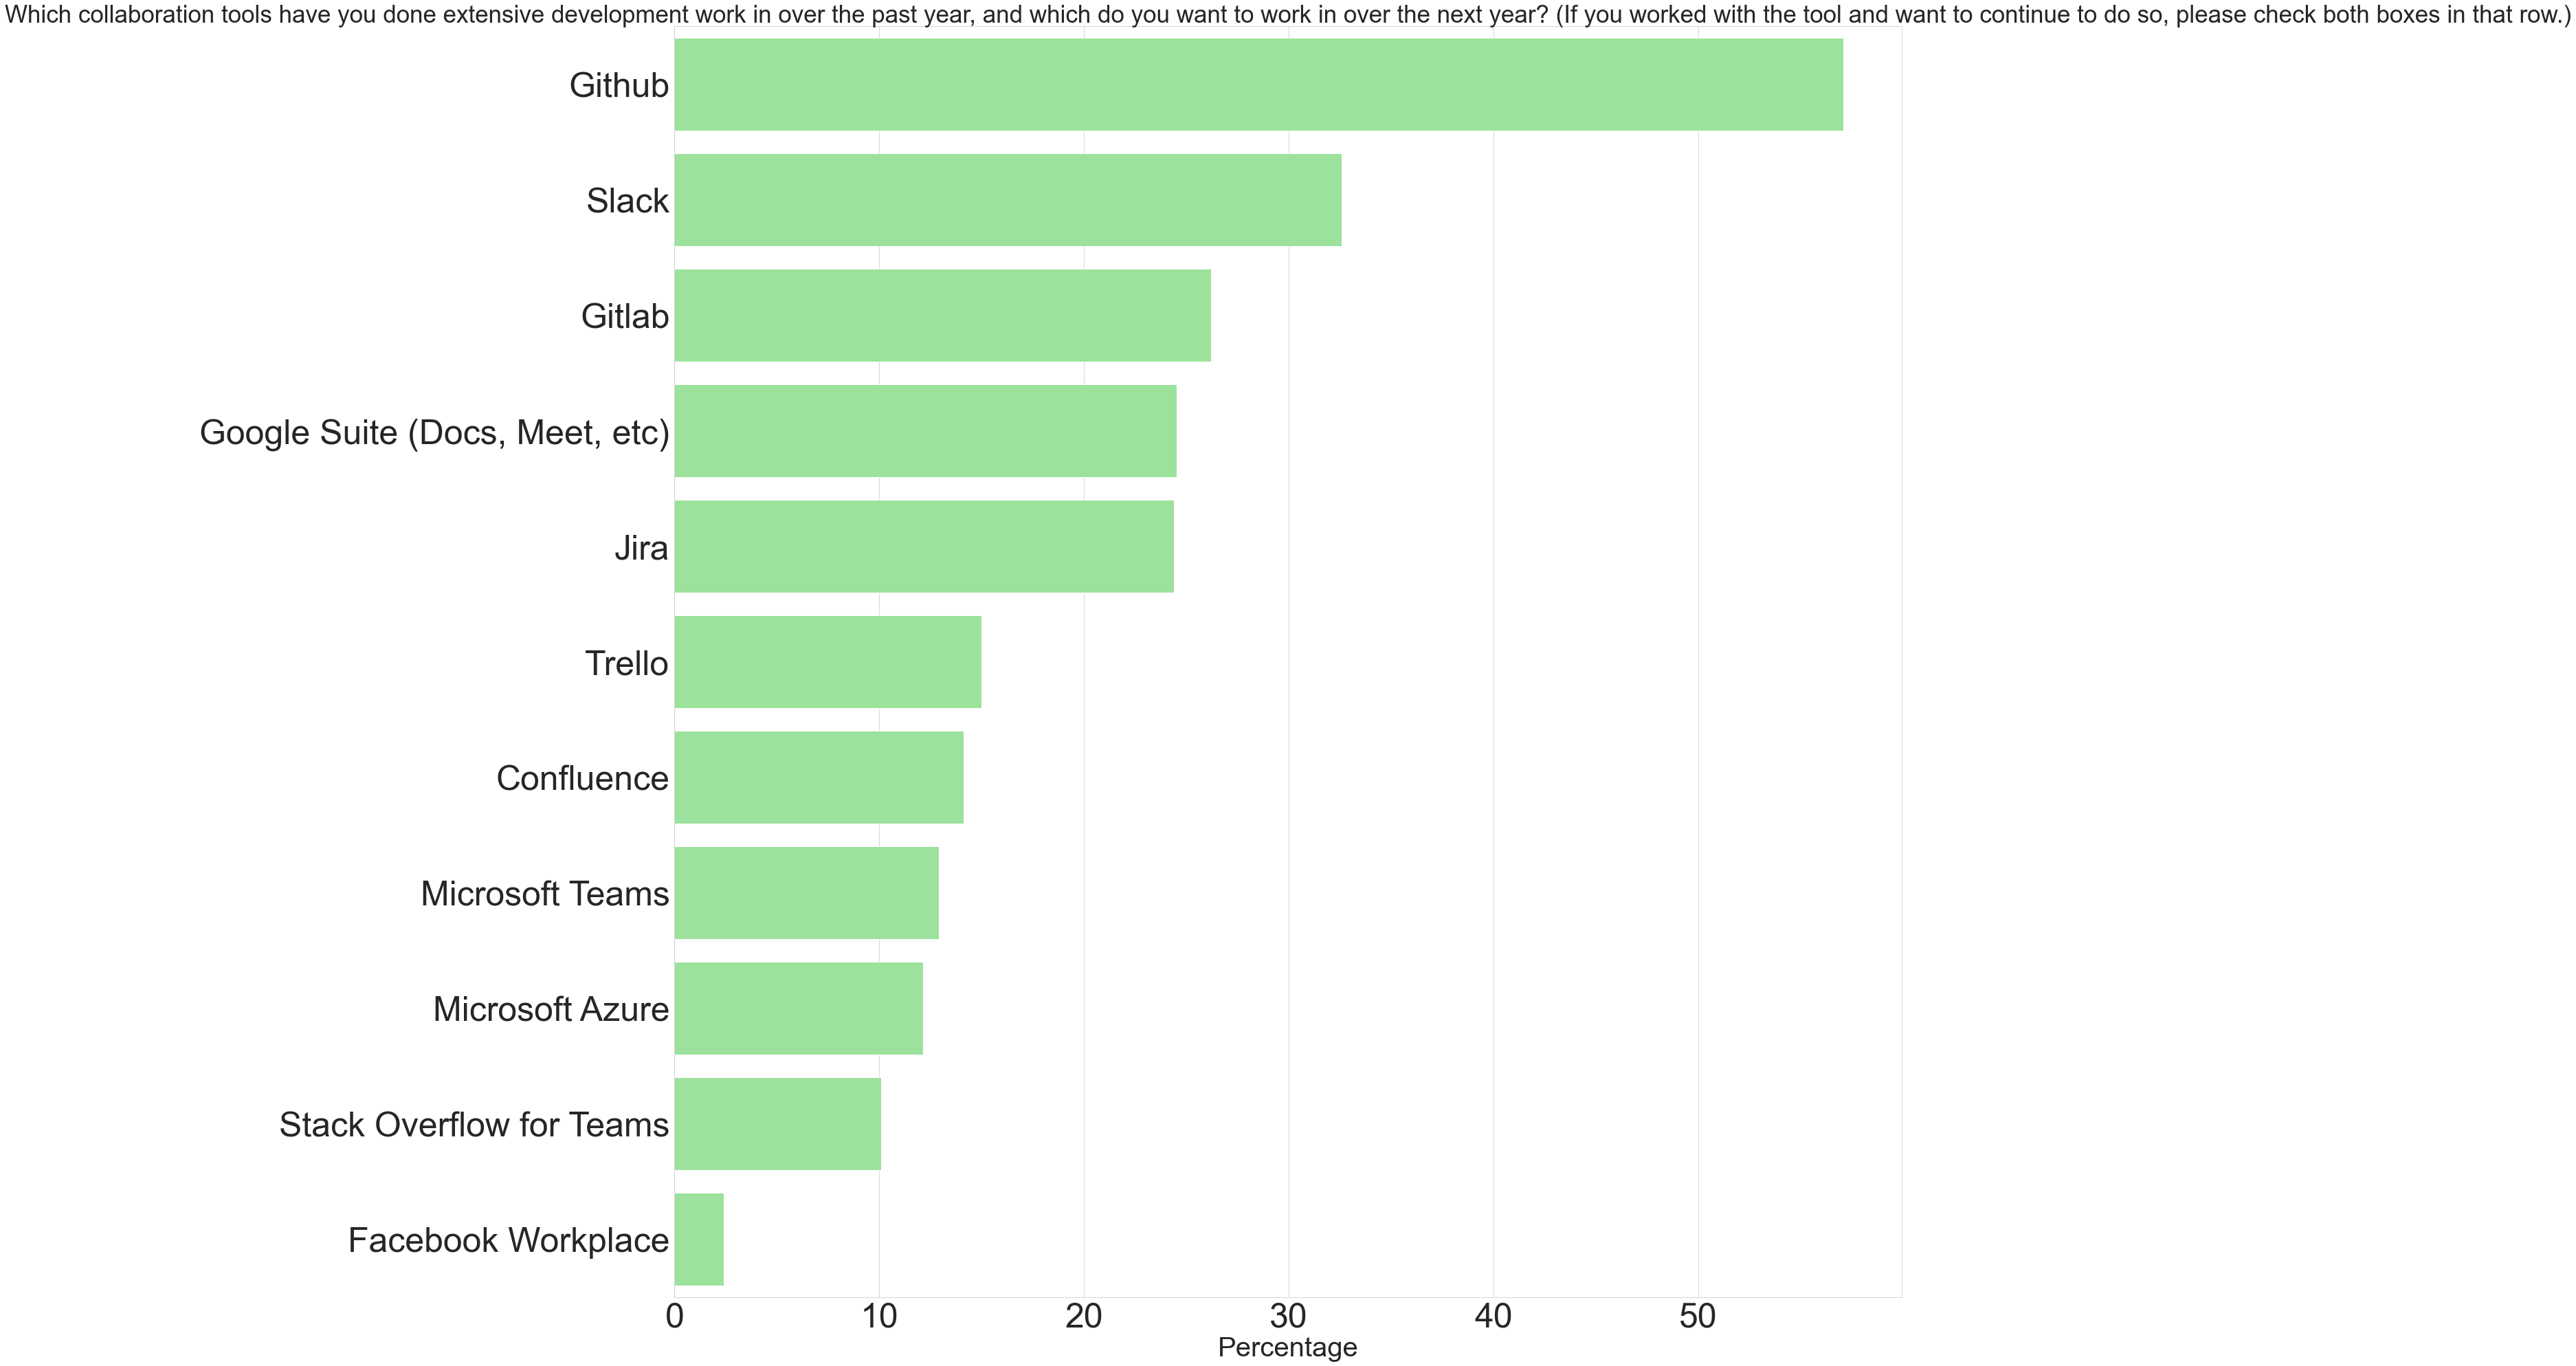

In [72]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=collab_desire_percent, ci=None, color='lightgreen',orient='h')
ax.set_title(schema['NEWCollabToolsDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Platfrom worked with

In [73]:
#define function to split multi columns
platform_worked = split_multicolumn(update_survey_data.PlatformWorkedWith)
platform_worked

Windows    iOS    AWS  Docker  Linux  MacOS  Android  WordPress  \
0         True  False  False   False  False  False    False      False   
1        False   True  False   False  False  False    False      False   
2        False  False  False   False  False  False    False      False   
3        False  False  False   False  False  False    False      False   
4         True  False   True    True   True   True    False      False   
...        ...    ...    ...     ...    ...    ...      ...        ...   
64456    False  False  False   False  False  False    False      False   
64457    False  False  False   False  False  False    False      False   
64458    False  False  False   False  False  False    False      False   
64459     True  False  False   False   True  False    False      False   
64460     True  False  False   False   True  False     True      False   

       Raspberry Pi  Heroku  Google Cloud Platform  Kubernetes  Arduino  \
0             False   False                  False       False    False   
1             False   False                  False       False    False   
2             False   False                  False       False    False   
3             False   False                  False       False    False   
4             False   False                  False       False    False   
...             ...     ...                    ...         ...      ...   
64456         False   False                  False       False    False   
64457         False   False                  False       False    False   
64458         False   False                  False       False    False   
64459         False   False                  False       False    False   
64460          True   False                  False       False     True   

       Slack Apps and Integrations  Microsoft Azure  IBM Cloud or Watson  
0                            False            False                False  
1                            False            False                False  
2                            False            False                False  
3                            False            False                False  
4                            False            False                False  
...                            ...              ...                  ...  
64456                        False            False                False  
64457                        False            False                False  
64458                        False            False                False  
64459                        False            False                False  
64460                        False            False                False  

[64453 rows x 16 columns]

In [74]:

platform_worked_percent = platform_worked.mean().sort_values(ascending=False) * 100
platform_worked_percent= platform_worked_percent.to_frame(name='percentage').reset_index()
platform_worked_percent


index  percentage
0                         Linux   45.662731
1                       Windows   44.117419
2                        Docker   29.089414
3                           AWS   22.208431
4                       Android   21.758491
5                         MacOS   19.898220
6                  Raspberry Pi   12.345430
7               Microsoft Azure   12.069260
8                     WordPress   11.777574
9         Google Cloud Platform   11.670520
10                          iOS   10.111244
11                   Kubernetes    9.509255
12                       Heroku    9.198951
13                      Arduino    8.800211
14  Slack Apps and Integrations    6.043163
15          IBM Cloud or Watson    1.334306

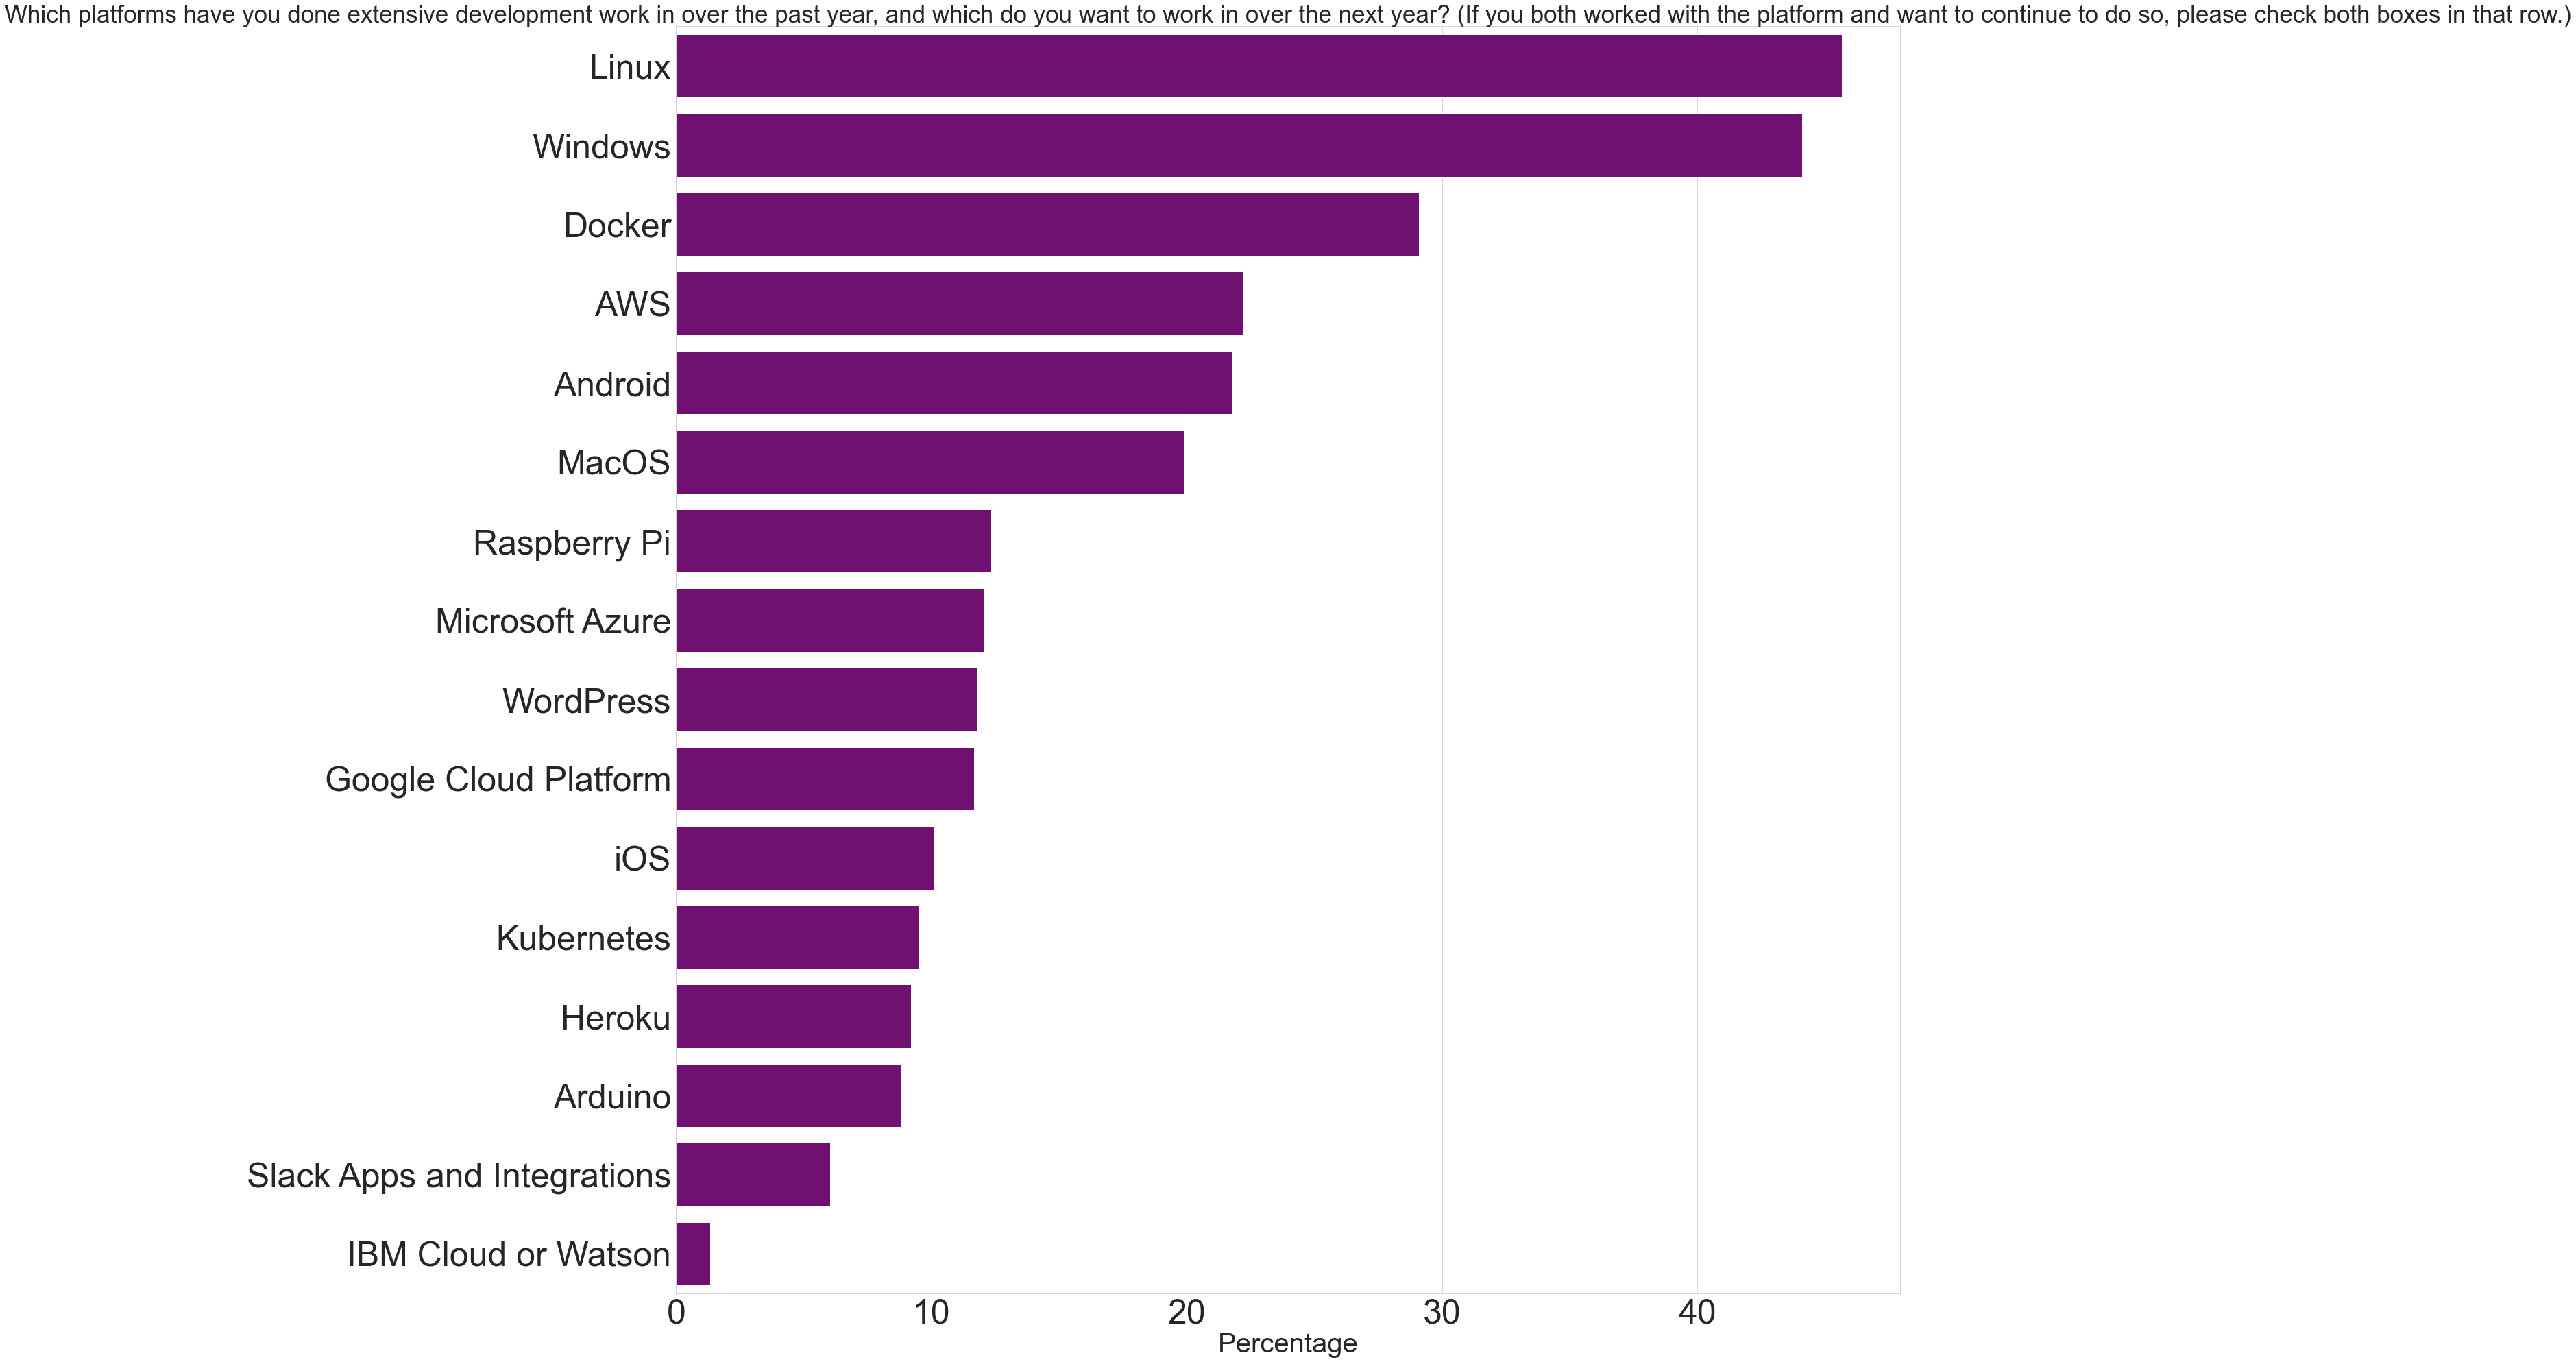

In [75]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=platform_worked_percent, ci=None, color='purple',orient='h')
ax.set_title(schema['PlatformWorkedWith'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Platfrom desire

In [76]:
#define function to split multi columns
platform_desire = split_multicolumn(update_survey_data.PlatformDesireNextYear)
platform_desire

Android    iOS  Kubernetes  Microsoft Azure  Windows  Linux  MacOS  \
0         True   True        True             True     True  False  False   
1        False   True        True            False    False   True   True   
2        False  False       False            False    False  False  False   
3        False  False       False            False    False  False  False   
4        False  False       False            False     True   True  False   
...        ...    ...         ...              ...      ...    ...    ...   
64456    False  False       False            False    False  False  False   
64457    False  False       False            False    False  False  False   
64458    False  False       False            False    False  False  False   
64459    False  False       False            False    False  False  False   
64460    False  False       False            False     True   True  False   

       Docker  Google Cloud Platform  Heroku  Slack Apps and Integrations  \
0       False                  False   False                        False   
1       False                  False   False                        False   
2       False                  False   False                        False   
3       False                  False   False                        False   
4        True                   True    True                        False   
...       ...                    ...     ...                          ...   
64456   False                  False   False                        False   
64457   False                  False   False                        False   
64458   False                  False   False                        False   
64459   False                  False   False                        False   
64460   False                  False   False                        False   

       Raspberry Pi    AWS  WordPress  Arduino  IBM Cloud or Watson  
0             False  False      False    False                False  
1             False  False      False    False                False  
2             False  False      False    False                False  
3             False  False      False    False                False  
4             False  False      False    False                False  
...             ...    ...        ...      ...                  ...  
64456         False  False      False    False                False  
64457         False  False      False    False                False  
64458         False  False      False    False                False  
64459         False  False      False    False                False  
64460          True  False      False     True                False  

[64453 rows x 16 columns]

In [77]:
platform_desire_percent = platform_desire.mean().sort_values(ascending=False) * 100
platform_desire_percent= platform_desire_percent.to_frame(name='percentage').reset_index()
platform_desire_percent

index  percentage
0                         Linux   42.371961
1                        Docker   36.221743
2                           AWS   28.380370
3                       Windows   27.474284
4                       Android   23.261912
5                    Kubernetes   21.637472
6                         MacOS   18.194653
7         Google Cloud Platform   17.969683
8                  Raspberry Pi   17.893659
9               Microsoft Azure   15.149023
10                          iOS   14.427567
11                      Arduino   10.610833
12                       Heroku    7.825858
13                    WordPress    5.919042
14  Slack Apps and Integrations    5.839914
15          IBM Cloud or Watson    2.778769

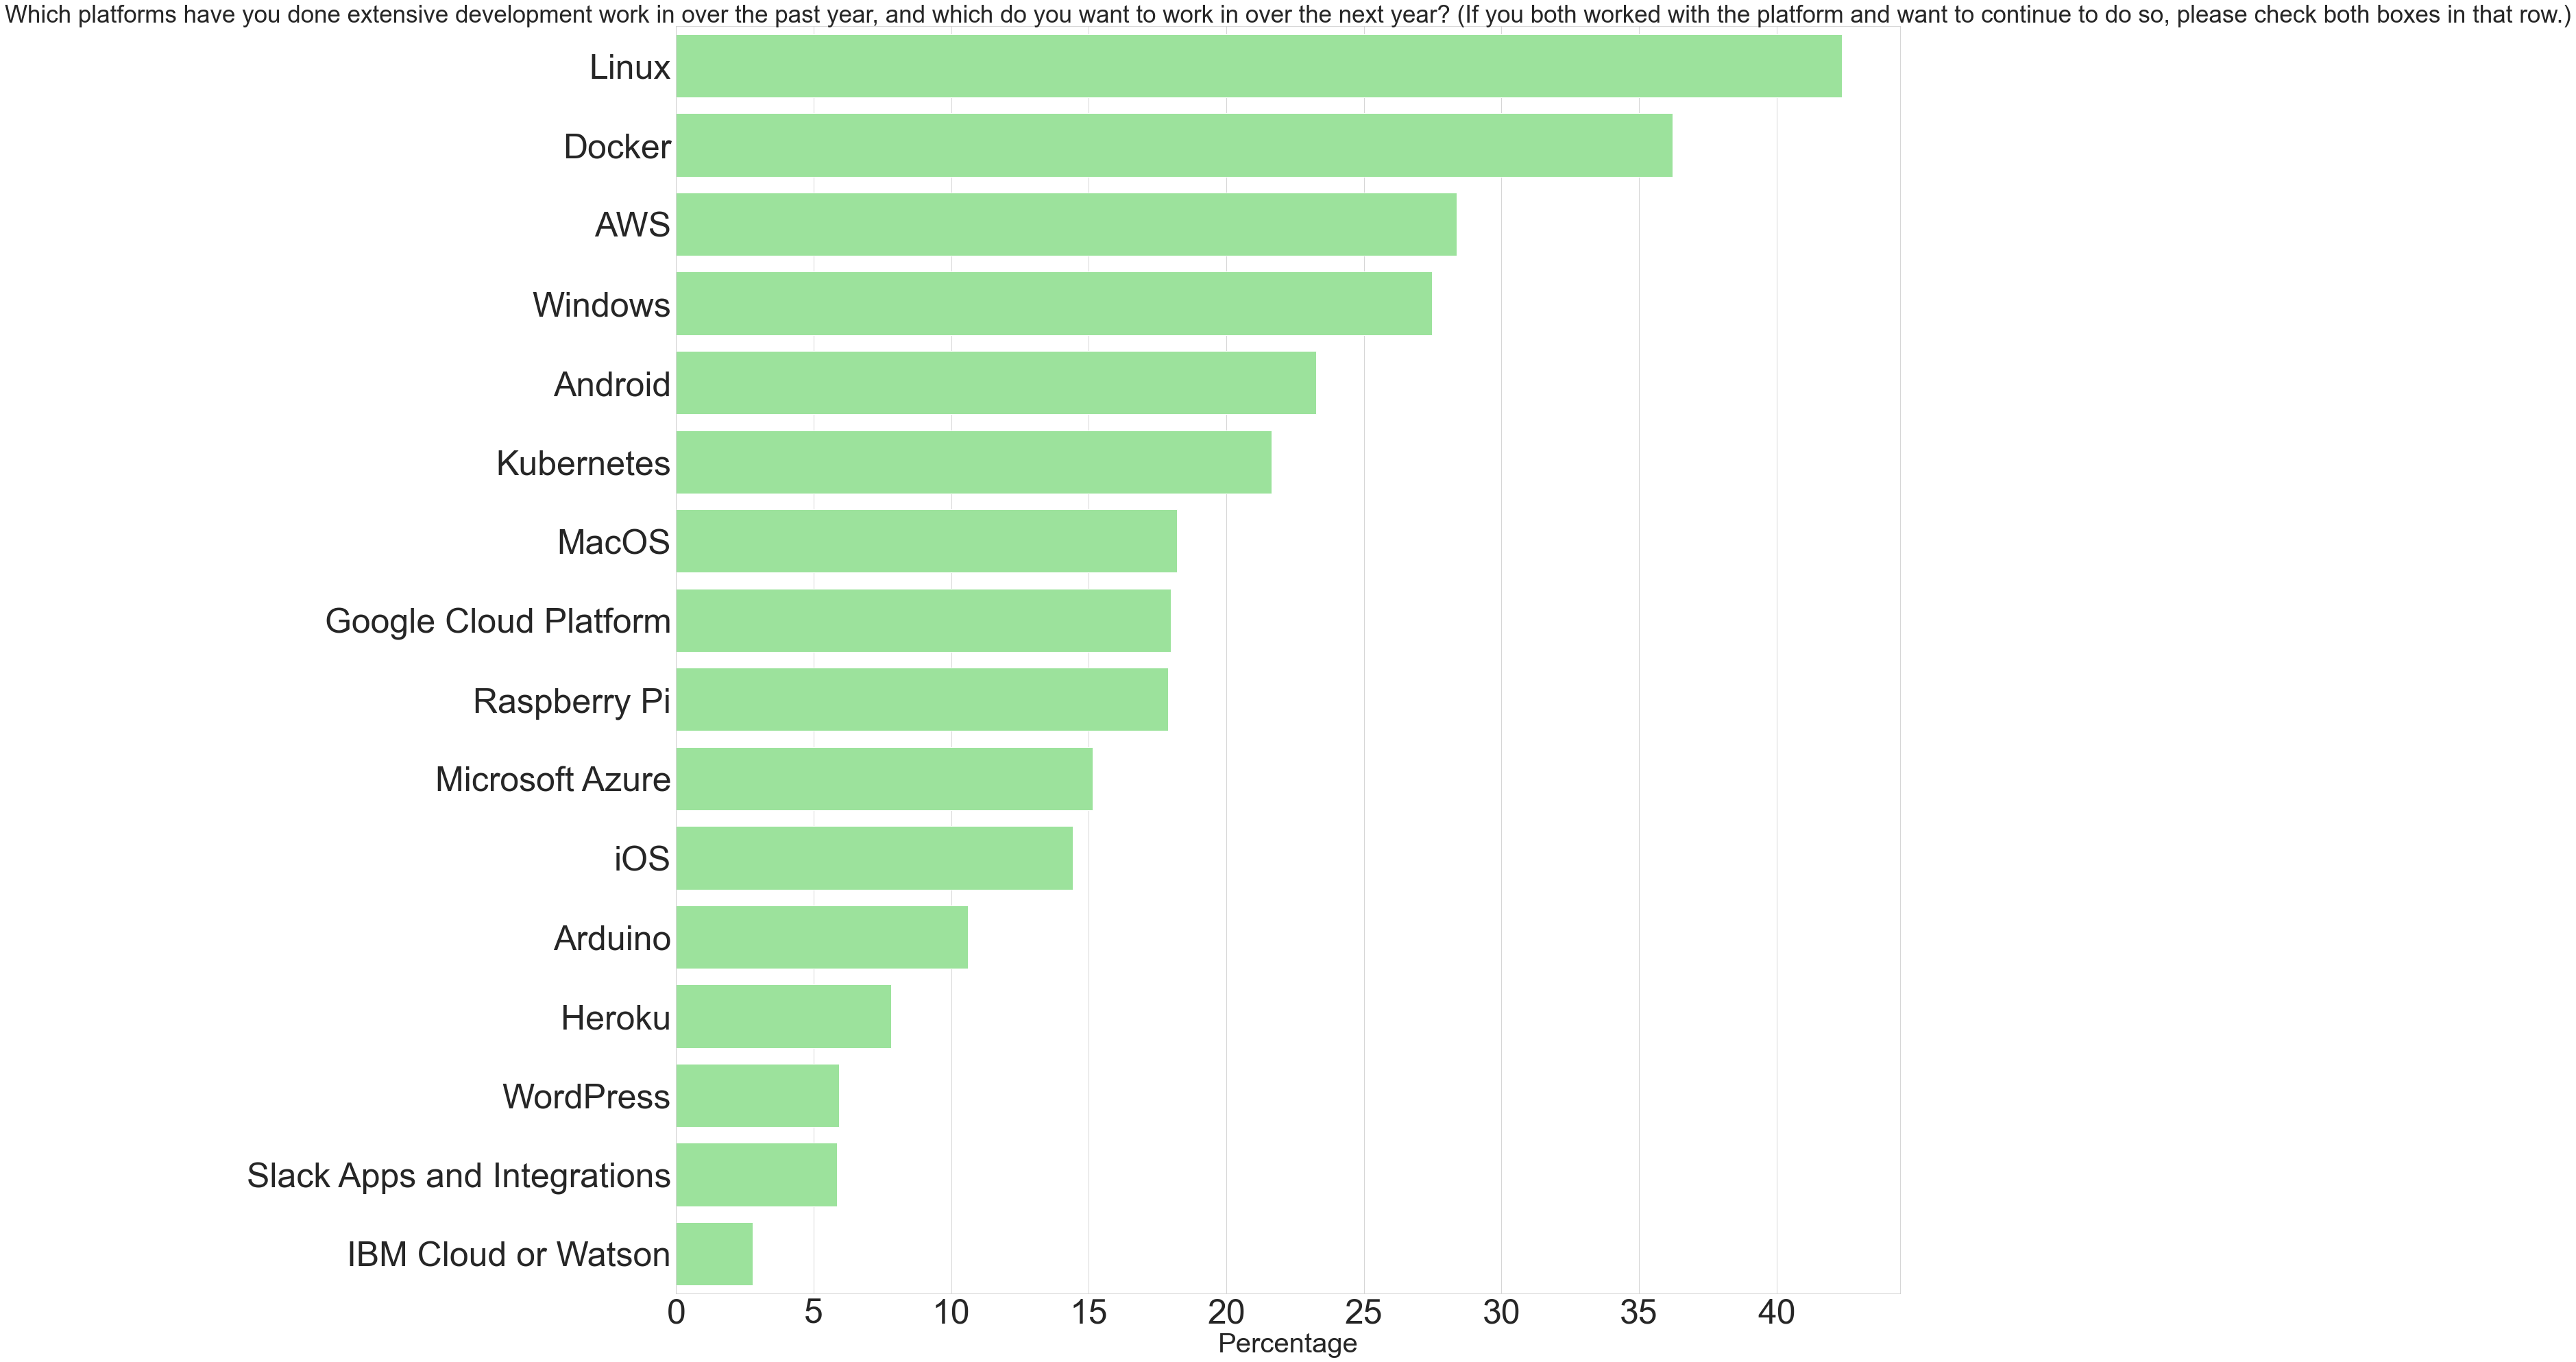

In [78]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=platform_desire_percent, ci=None, color='lightgreen',orient='h')
ax.set_title(schema['PlatformDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Webframe Worked With

In [79]:
webframe = split_multicolumn(update_survey_data.WebframeWorkedWith)
webframe

ASP.NET  ASP.NET Core  Ruby on Rails  Flask  jQuery  Angular  \
0         True          True          False  False   False    False   
1        False         False          False  False   False    False   
2        False         False          False  False   False    False   
3        False         False          False  False   False    False   
4        False         False           True  False   False    False   
...        ...           ...            ...    ...     ...      ...   
64456    False         False          False  False   False    False   
64457    False         False          False  False   False    False   
64458    False         False          False  False   False    False   
64459    False         False          False  False   False    False   
64460    False          True          False  False    True     True   

       Angular.js  Django  React.js  Vue.js  Gatsby  Spring  Express  Symfony  \
0           False   False     False   False   False   False    False    False   
1           False   False     False   False   False   False    False    False   
2           False   False     False   False   False   False    False    False   
3           False   False     False   False   False   False    False    False   
4           False   False     False   False   False   False    False    False   
...           ...     ...       ...     ...     ...     ...      ...      ...   
64456       False   False     False   False   False   False    False    False   
64457       False   False     False   False   False   False    False    False   
64458       False   False     False   False   False   False    False    False   
64459       False   False     False   False   False   False    False    False   
64460        True   False     False   False   False   False    False    False   

       Laravel  Drupal  
0        False   False  
1        False   False  
2        False   False  
3        False   False  
4        False   False  
...        ...     ...  
64456    False   False  
64457    False   False  
64458    False   False  
64459    False   False  
64460    False   False  

[64453 rows x 16 columns]

In [80]:
webframe_percent = webframe.mean().sort_values(ascending=False) * 100
webframe_percent= webframe_percent.to_frame(name='percentage').reset_index()
webframe_percent

index  percentage
0          jQuery   28.237631
1        React.js   23.389136
2         Angular   16.374723
3         ASP.NET   14.263106
4         Express   13.828681
5    ASP.NET Core   12.454036
6          Vue.js   11.291949
7          Spring   10.714784
8      Angular.js   10.503778
9          Django    9.248600
10          Flask    9.231533
11        Laravel    7.220766
12  Ruby on Rails    4.527330
13        Symfony    2.854793
14         Gatsby    2.612757
15         Drupal    2.097653

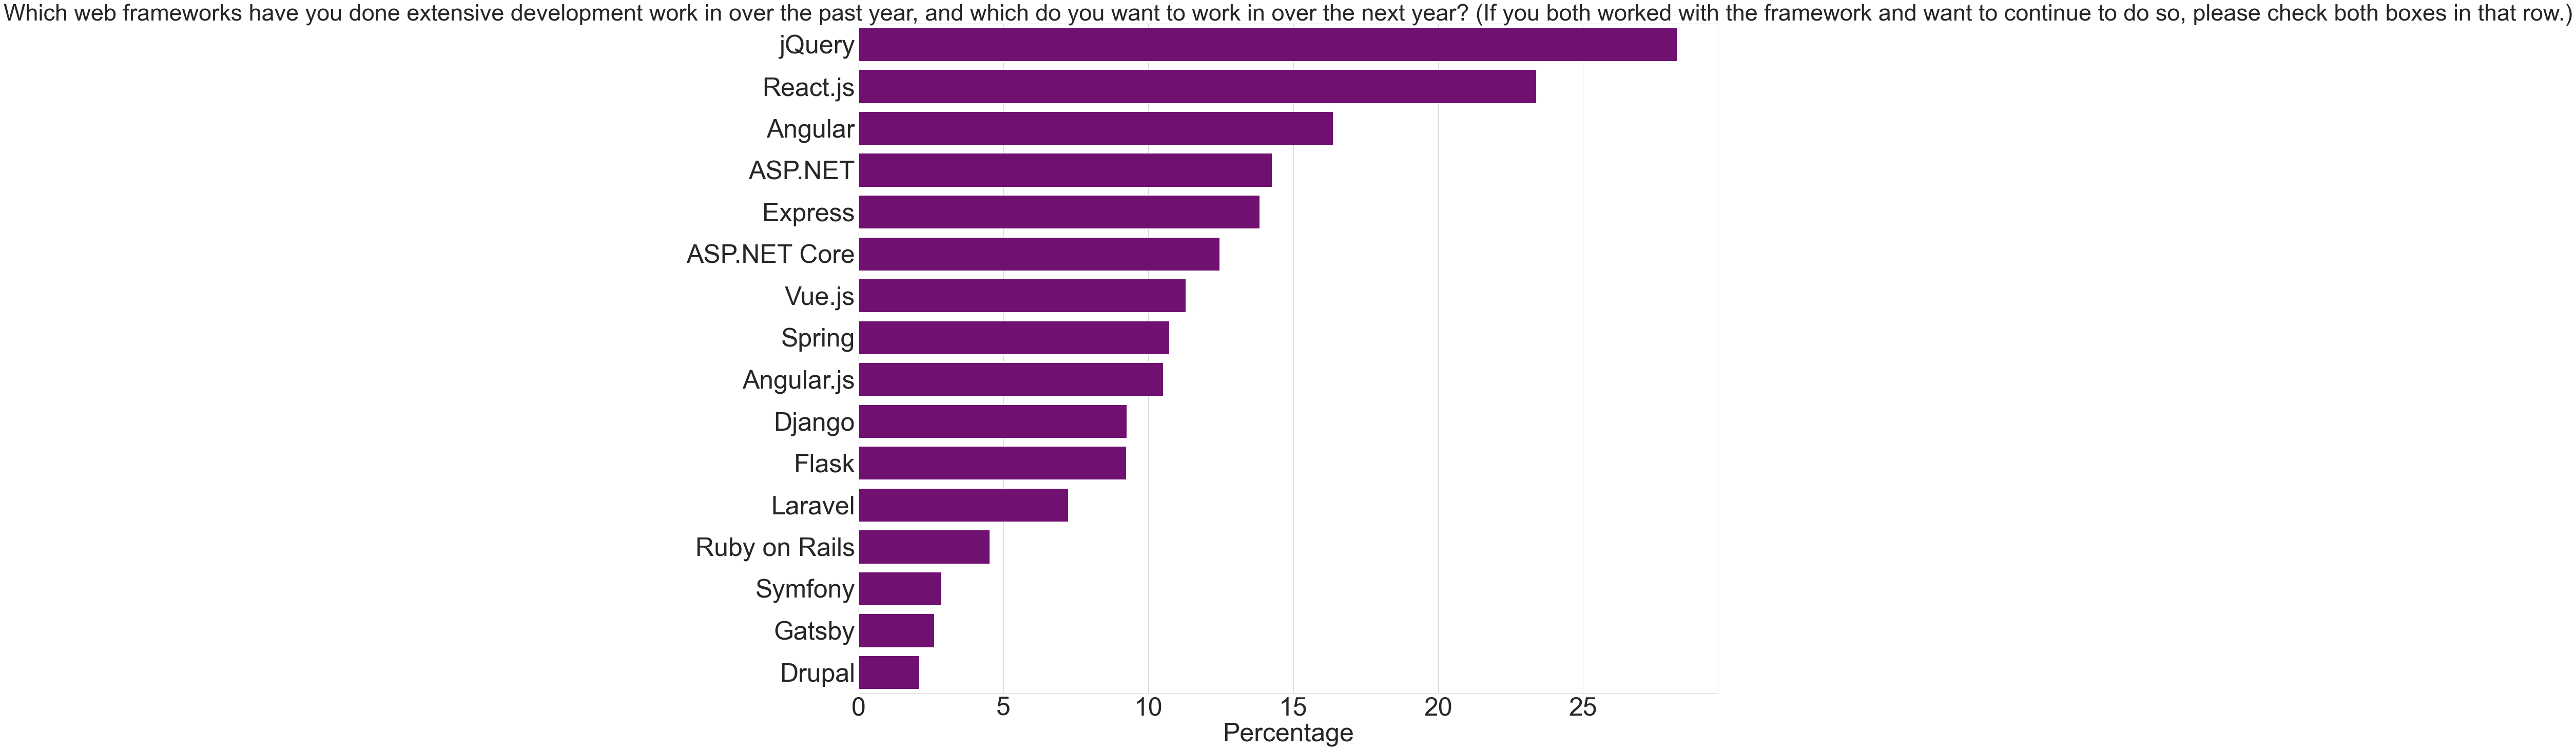

In [81]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x='percentage', y='index', data=webframe_percent, ci=None, color='purple',orient='h')
ax.set_title(schema['WebframeWorkedWith'], fontsize=45)
ax.set_xlabel ("Percentage", fontsize=50)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

### Webframe Desire

In [82]:
#define function to split multi columns
webframe_desire = split_multicolumn(update_survey_data.WebframeDesireNextYear)
webframe_desire

ASP.NET Core  Django  Ruby on Rails  React.js  Vue.js  Angular.js  \
0              True   False          False     False   False       False   
1             False   False          False     False   False       False   
2             False   False          False     False   False       False   
3             False   False          False     False   False       False   
4             False    True           True     False   False       False   
...             ...     ...            ...       ...     ...         ...   
64456         False   False          False     False   False       False   
64457         False   False          False     False   False       False   
64458         False   False          False     False   False       False   
64459         False   False          False      True   False        True   
64460          True   False          False     False   False       False   

       Flask  jQuery  Angular  ASP.NET  Gatsby  Express  Spring  Laravel  \
0      False   False    False    False   False    False   False    False   
1      False   False    False    False   False    False   False    False   
2      False   False    False    False   False    False   False    False   
3      False   False    False    False   False    False   False    False   
4      False   False    False    False   False    False   False    False   
...      ...     ...      ...      ...     ...      ...     ...      ...   
64456  False   False    False    False   False    False   False    False   
64457  False   False    False    False   False    False   False    False   
64458  False   False    False    False   False    False   False    False   
64459  False   False     True    False   False    False   False    False   
64460  False    True    False    False   False    False   False    False   

       Symfony  Drupal  
0        False   False  
1        False   False  
2        False   False  
3        False   False  
4        False   False  
...        ...     ...  
64456    False   False  
64457    False   False  
64458    False   False  
64459    False   False  
64460    False   False  

[64453 rows x 16 columns]

In [83]:
webframe_desire_percent = webframe_desire.mean().sort_values(ascending=False) * 100
webframe_desire_percent= webframe_desire_percent.to_frame(name='percentage').reset_index()
webframe_desire_percent

index  percentage
0        React.js   30.980715
1          Vue.js   20.281445
2         Angular   16.591935
3    ASP.NET Core   13.895397
4          jQuery   12.930352
5          Django   12.680558
6         Express   12.550230
7          Spring    9.636479
8           Flask    9.377376
9      Angular.js    8.626441
10        ASP.NET    7.406948
11        Laravel    6.561370
12  Ruby on Rails    5.914387
13         Gatsby    4.612663
14        Symfony    2.603447
15         Drupal    1.363784

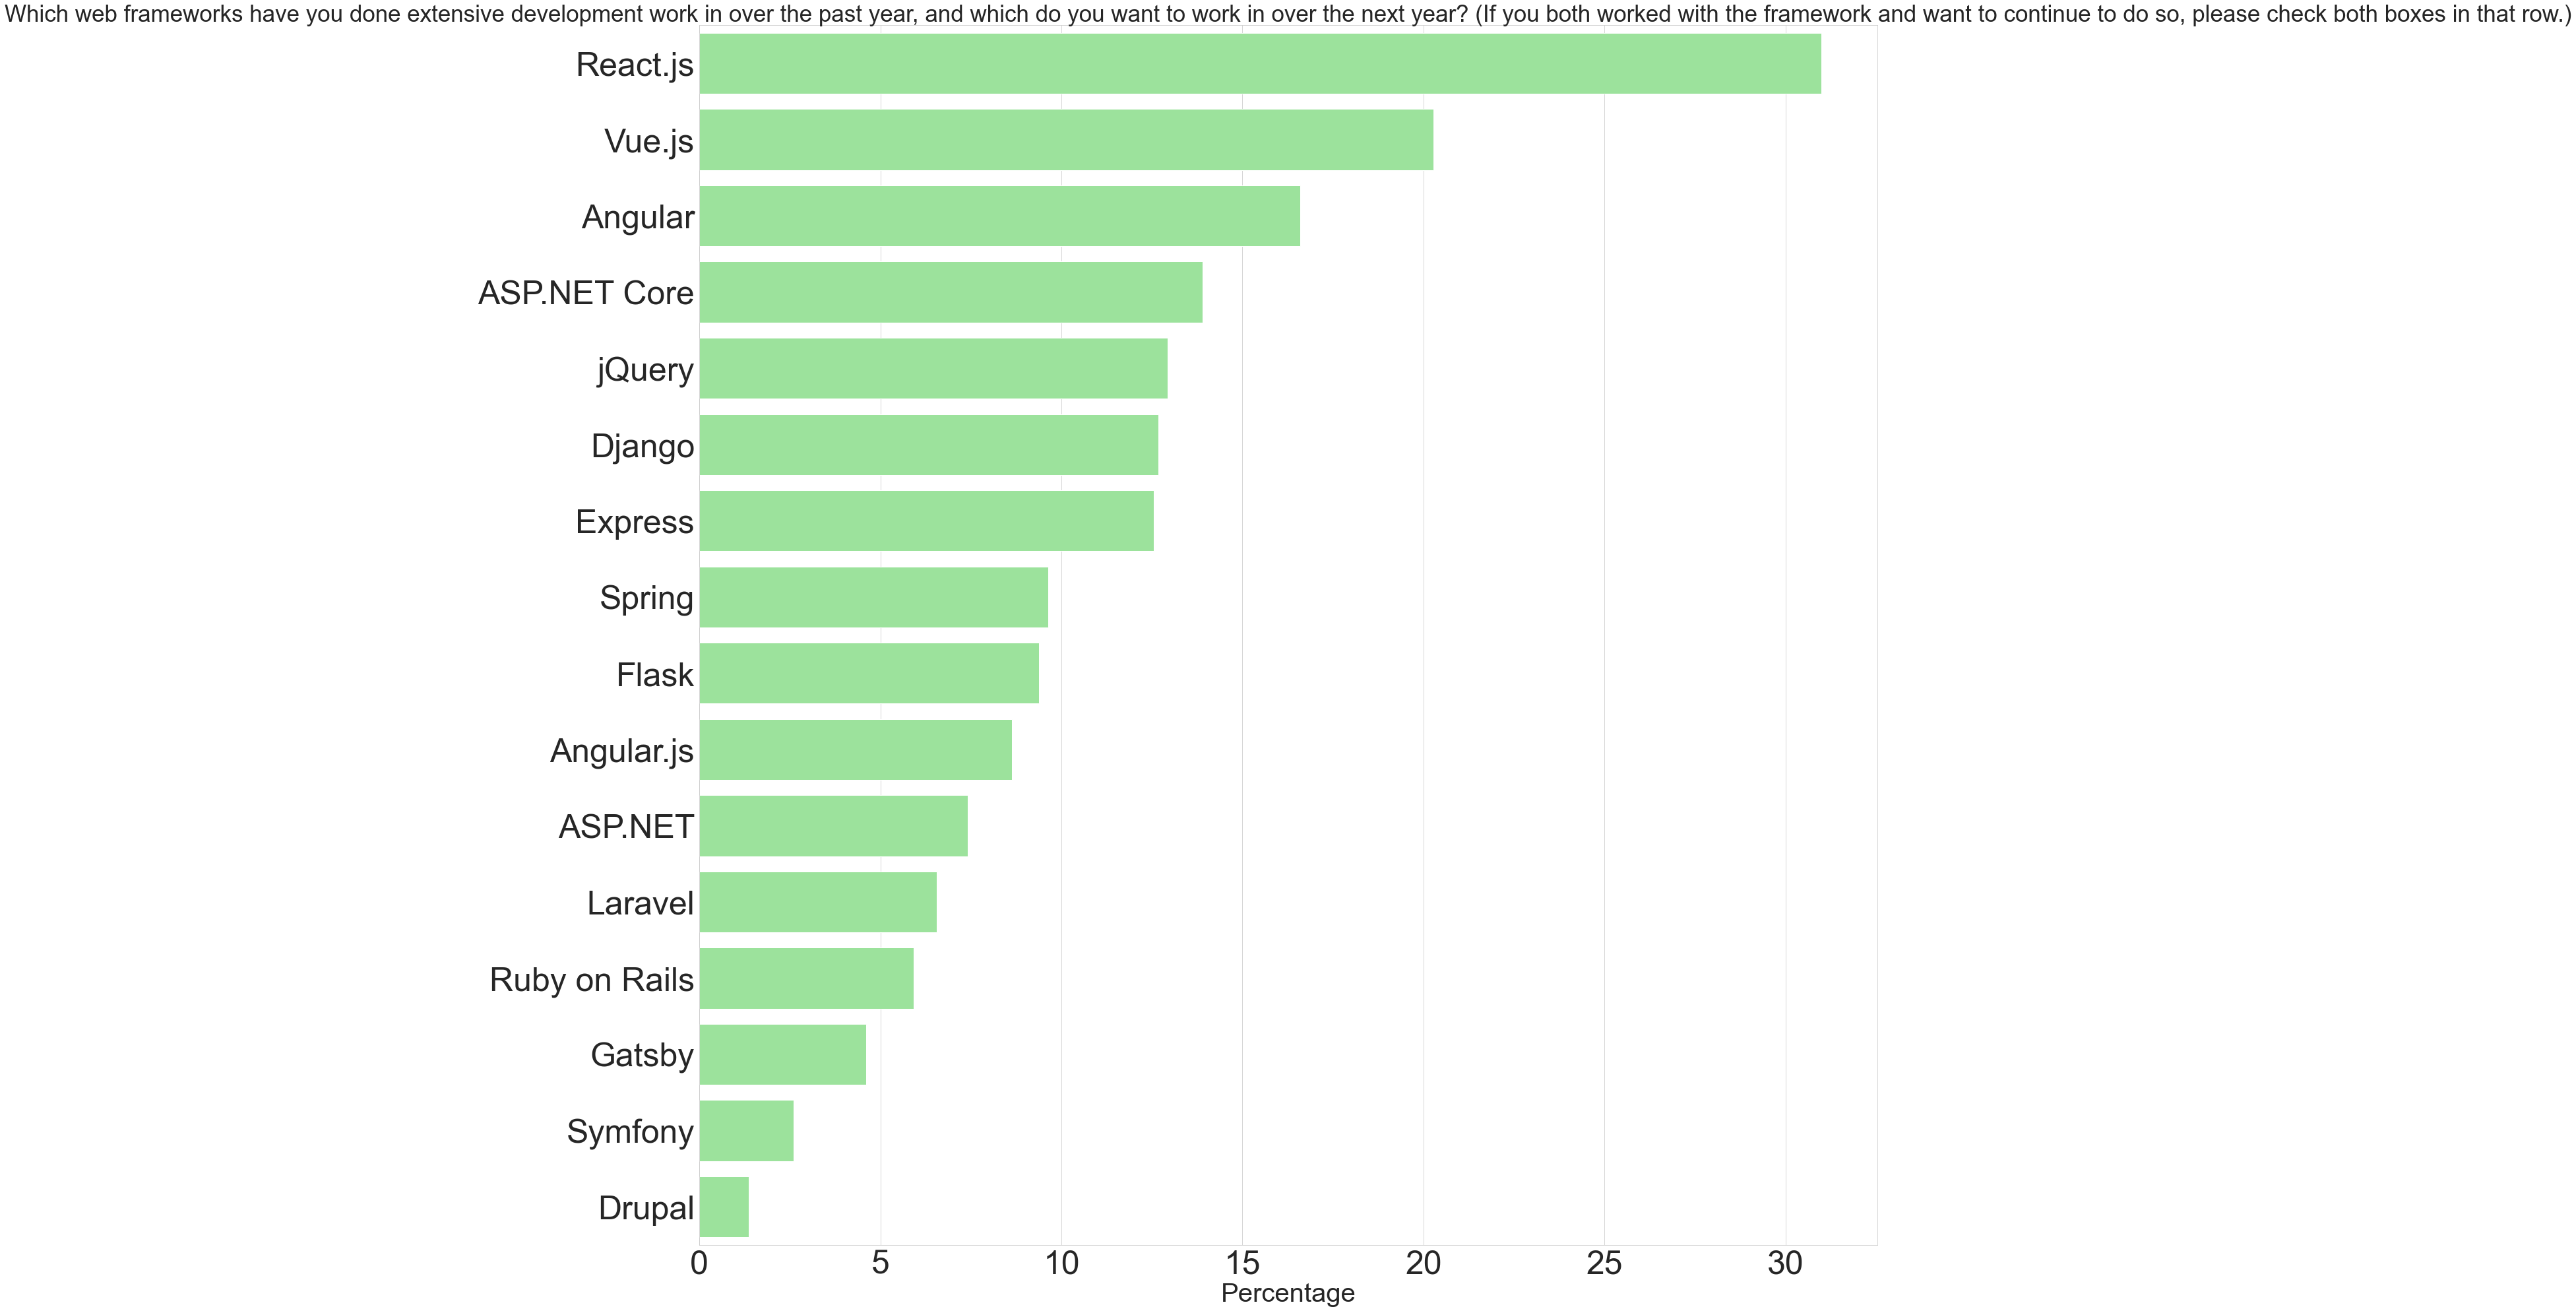

In [84]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(32,34))
ax = sns.barplot(x='percentage', y='index', data=webframe_desire_percent, ci=None, color='lightgreen',orient='h')
ax.set_title(schema['WebframeDesireNextYear'], fontsize=35)
ax.set_xlabel ("Percentage", fontsize=40)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)

## Correlation

### Age, Age1st Code, Years Code, Years Professional Code

<AxesSubplot:xlabel='YearsCode', ylabel='Age'>

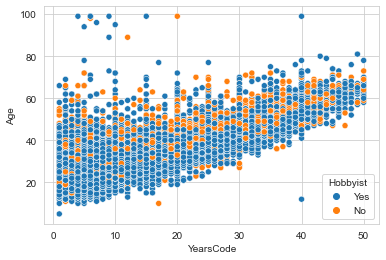

In [85]:
#age and years code
sns.scatterplot(data=update_survey_data, x="YearsCode", y="Age", hue='Hobbyist')

<AxesSubplot:xlabel='YearsCodePro', ylabel='Age'>

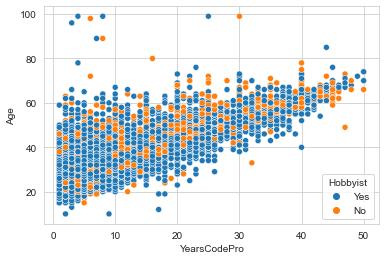

In [86]:
#age and years code pro
sns.scatterplot(data=update_survey_data, x="YearsCodePro", y="Age", hue='Hobbyist')

<AxesSubplot:xlabel='Age1stCode', ylabel='Age'>

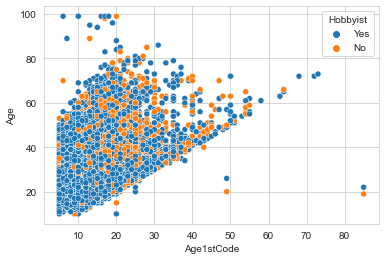

In [87]:
#age and age first code
sns.scatterplot(data=update_survey_data, x="Age1stCode", y="Age", hue='Hobbyist')

<AxesSubplot:xlabel='Age1stCode', ylabel='YearsCode'>

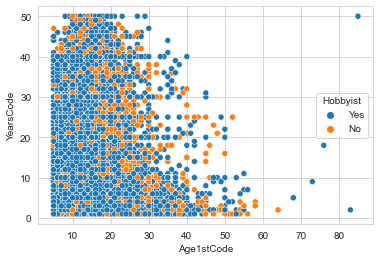

In [88]:
#age1stcode and years code
sns.scatterplot(data=update_survey_data, x="Age1stCode", y="YearsCode", hue='Hobbyist')

<AxesSubplot:xlabel='Age1stCode', ylabel='YearsCodePro'>

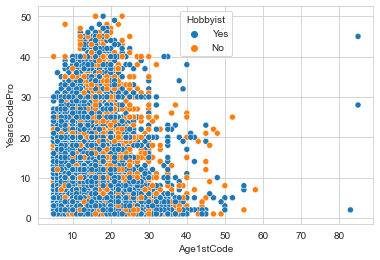

In [89]:
#age1stcode and years code pro
sns.scatterplot(data=update_survey_data, x="Age1stCode", y="YearsCodePro", hue='Hobbyist')

<AxesSubplot:xlabel='YearsCode', ylabel='YearsCodePro'>

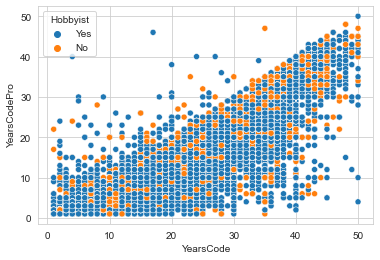

In [90]:
#years code and years code pro
sns.scatterplot(data=update_survey_data, x="YearsCode", y="YearsCodePro", hue='Hobbyist')

### Using Years Code and Years Code pro as legend

In [91]:
x=update_survey_data['Age']
y=update_survey_data['Age1stCode']
colors=update_survey_data['YearsCode']

x1=update_survey_data['Age']
y1=update_survey_data['Age1stCode']
colors1=update_survey_data['YearsCodePro']


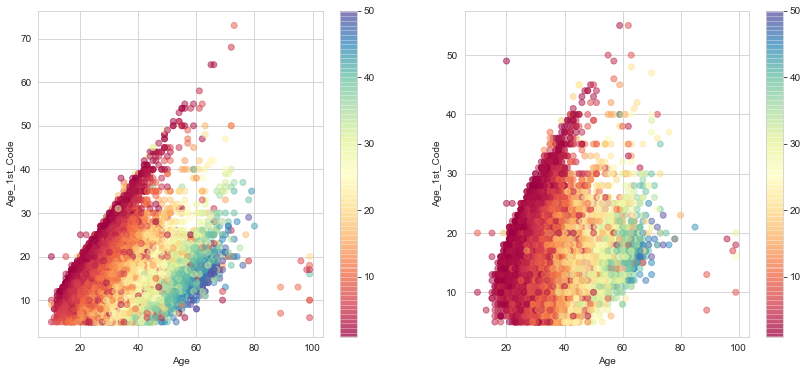

In [92]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, c=colors, alpha=0.5, cmap='Spectral')
plt.xlabel('Age')
plt.ylabel('Age_1st_Code')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x1, y1, c=colors1, alpha=0.5, cmap='Spectral')
plt.xlabel('Age')
plt.ylabel('Age_1st_Code')
plt.colorbar()

plt.show()

<AxesSubplot:>

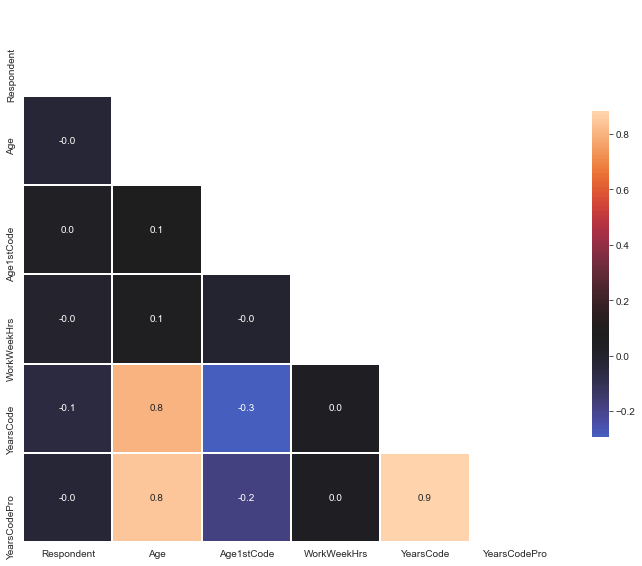

In [93]:
corr = update_survey_data.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(corr)



# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt=".1f", center=0.08,cbar_kws={"shrink":0.5})
